# DTI Analysis
* [Preprocessing](#Preprocessing)
* [TBSS](#TBSS)
* [Modeling](#Modeling)
* [Analysis](#Analysis)
* [Plots](#Plots)
* [TFCE](#TFCE)
* [BMI Correlations](#BMI-Correlations)

## Preprocessing

1. Run main.sh
2. Inspect all subjects for model fit

## TBSS
We performed all analyses separately for older adults and young adults. These analyses were therefore conducted independently in separate directories, tbss_oa and tbss_ya.

1. Move all FA and MD files from DTI preprocessing directory to a new tbss directory
2. We will later rename all the MD files as FA for future TBSS steps. Do not get these mixed up with the actual FA data!

In [2]:
%%bash

dtifit_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep
tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa

ls -d ${dtifit_dir}/sub-3*/

/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30004/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30008/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30009/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30012/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30015/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30019/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30020/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30023/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30040/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30057/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30064/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30066/
/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30069/
/Volumes/sch

In [3]:
%%bash

dtifit_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep
work_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives

mkdir ${work_dir}/tbss_ya
mkdir ${work_dir}/tbss_oa

for sub_dir in `ls -d ${dtifit_dir}/sub-3*/`; do
    subj=`echo "$sub_dir" | cut -d '-' -f 2 | rev | cut -c 2- | rev`
    echo $subj
    cp "$sub_dir"*FA.nii.gz ${work_dir}/tbss_ya/
done

for sub_dir in `ls -d ${dtifit_dir}/sub-4*/`; do
    subj=`echo "$sub_dir" | cut -d '-' -f 2 | rev | cut -c 2- | rev`
    echo $subj
    cp "$sub_dir"*FA.nii.gz ${work_dir}/tbss_oa/
done

30004
30008
30009
30012
30015
30019
30020
30023
30040
30057
30064
30066
30069
30074
30085
30088
30090
30091
30095
30096
30116
30118
30119
30128
30181
30217
30227
30236
30242
30255
30274
30295
30330
30346
30376
30395
30400
30403
30412
30426
30432
30466
30469
30476
30478
30568
30570
30581
30584
30588
40160
40170
40175
40288
40351
40490
40496
40512
40515
40516
40519
40520
40522
40524
40547
40550
40564
40601
40608
40615
40619
40623
40624
40629
40638
40649
40650
40653
40655
40656
40658
40664
40665
40668
40672
40685
40694
40720
40728
40738
40743
40750
40758
40767
40768
40769
40773
40775
40777
40778
40779
40782
40784
40796
40803
40811
40855
40861
40876
40878


mkdir: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya: File exists
mkdir: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa: File exists
cp: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30570/*FA.nii.gz: No such file or directory
cp: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-40855/*FA.nii.gz: No such file or directory


### TBSS 1 Preprocessing
Erodes FA images and zeroes the end slices to remove likely outliers from the diffusion tensor fitting. Generates a report called slicesdir to allow for quick scanning to detect any major issues.

In [9]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya
tbss_1_preproc *FA.nii.gz

processing sub-30004_dti_FA
processing sub-30008_dti_FA
processing sub-30009_dti_FA
processing sub-30012_dti_FA
processing sub-30015_dti_FA
processing sub-30019_dti_FA
processing sub-30020_dti_FA
processing sub-30023_dti_FA
processing sub-30040_dti_FA
processing sub-30057_dti_FA
processing sub-30064_dti_FA
processing sub-30066_dti_FA
processing sub-30069_dti_FA
processing sub-30074_dti_FA
processing sub-30085_dti_FA
processing sub-30088_dti_FA
processing sub-30090_dti_FA
processing sub-30091_dti_FA
processing sub-30095_dti_FA
processing sub-30096_dti_FA
processing sub-30116_dti_FA
processing sub-30118_dti_FA
processing sub-30119_dti_FA
processing sub-30128_dti_FA
processing sub-30181_dti_FA
processing sub-30217_dti_FA
processing sub-30227_dti_FA
processing sub-30236_dti_FA
processing sub-30242_dti_FA
processing sub-30255_dti_FA
processing sub-30274_dti_FA
processing sub-30295_dti_FA
processing sub-30330_dti_FA
processing sub-30346_dti_FA
processing sub-30376_dti_FA
processing sub-30395

In [10]:
%%bash

open -a "Google Chrome" /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya/FA/slicesdir/index.html

In [7]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa
ls | head -5

tbss_1_preproc *FA.nii.gz

sub-40160_dti_FA.nii.gz
sub-40170_dti_FA.nii.gz
sub-40175_dti_FA.nii.gz
sub-40288_dti_FA.nii.gz
sub-40351_dti_FA.nii.gz
processing sub-40160_dti_FA
processing sub-40170_dti_FA
processing sub-40175_dti_FA
processing sub-40288_dti_FA
processing sub-40351_dti_FA
processing sub-40490_dti_FA
processing sub-40496_dti_FA
processing sub-40512_dti_FA
processing sub-40515_dti_FA
processing sub-40516_dti_FA
processing sub-40519_dti_FA
processing sub-40520_dti_FA
processing sub-40522_dti_FA
processing sub-40524_dti_FA
processing sub-40547_dti_FA
processing sub-40550_dti_FA
processing sub-40564_dti_FA
processing sub-40601_dti_FA
processing sub-40608_dti_FA
processing sub-40615_dti_FA
processing sub-40619_dti_FA
processing sub-40623_dti_FA
processing sub-40624_dti_FA
processing sub-40629_dti_FA
processing sub-40638_dti_FA
processing sub-40649_dti_FA
processing sub-40650_dti_FA
processing sub-40653_dti_FA
processing sub-40655_dti_FA
processing sub-40656_dti_FA
processing sub-40658_dti_FA
processing s

In [8]:
%%bash

open -a "Google Chrome" /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/FA/slicesdir/index.html

### Note 02-20-2020
I removed subjects 30330, 30476, 30227, 40515, and 40516 from analysis due to artifact.

FLIRT version 6.0

### TBSS 2 Registration
Runs the nonlinear registration, aligning all FA images to a 1x1x1mm standard space. We will use the -n option, which aligns every FA image to every other one. In the next step, we will identify the "most representative" one, and use this as the target image. This target image is then affine-aligned into MNI152 standard space, and every image is transformed into 1x1x1mm MNI152 space by combining the nonlinear transform to the target FA image with the affine transform from that target to MNI152 space.

This is highly computationally intensive, so we will run this on TACC to speed things up.

From your local machine, enter this command to move the TBSS directories to TACC. You will need to enter your TACC password and verification code to complete the file transfer.

`scp -r /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya username@stampede2.tacc.utexas.edu:/path/to/destination/`

`scp -r /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa username@stampede2.tacc.utexas.edu:/path/to/destination/`

Log into TACC using `ssh username@stampede2.tacc.utexas.edu`.

`cd path/to/destination/tbss_ya`

From a login node, run the tbss_2_reg command: <br>
`tbss_2_reg -n`. 

Do the same for older adults: <br>
`cd path/to/destination/tbss_oa`

From a login node, run the tbss_2_reg command: <br>
`tbss_2_reg -n`

This will submit 2 jobs to the queue. You can check the status of the jobs with `squeue -u username`. Wait for them to complete before moving forward.

A quick check to make sure it ran properly is: <br>
`ls tbss_ya/sub-30020* | wc -l`

For one subject, there should be (N subjects * 4) + 2 (FA and FA mask) files. In this case, we have 49 subjects, and 198 files.


### TBSS 3 Post-registration
Applies the nonlinear transforms found in the previous stage to all subjects to bring them into standard space.
This will first make the decision about which of the FA images is the most "typical", for selection as the target image to apply all nonlinear transformations into the space of. This happens by taking each FA image in turn, and estimating the average amount of warping that was necessary to align all other images to it, then finding the one that had the smallest amount of average warping when used as a target.

From the login node on TACC:

`cd /path/to/destination/tbss_ya` <br>
`tbss_3_postreg -S`

`cd /path/to/destination/tbss_oa` <br>
`tbss_3_postreg -S`

We will get a message about what the best target subject is for each group. In this case, that was: <br>

```bash

best target is sub-40782_dti_FA_FA - now registering this to standard space

best target is sub-30255_dti_FA_FA - now registering this to standard space
```

When that finishes up, we will need to transfer the results back to the local machine for inspection and to continue with analysis.

From your local machine, this can be done with:

`scp -r username@stampede2.tacc.utexas.edu:/path/to/destination/tbss_ya /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/`

`scp -r username@stampede2.tacc.utexas.edu:/path/to/destination/tbss_oa /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/ `

Again, you will need your TACC password and the verification code.

### QA

Now check all_FA and mean_FA_mask for any outliers or artifacts.

We restricted mean_FA_mask values to values between 0.2 and 1, since the mask output from tbss_3_postreg covers more than the white matter. This will reduce the area used in permutation testing with TFCE and increase the power of our analysis.

In [13]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/stats
fslmaths mean_FA -thr 0.2 -uthr 1 -bin mean_FA_mask_thr20.nii.gz
fslmaths mean_FA -thr 0.22 -uthr 1 -bin mean_FA_mask_thr22.nii.gz

In [1]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya/stats
fslmaths mean_FA -thr 0.2 -uthr 1 -bin mean_FA_mask_thr20.nii.gz
fslmaths mean_FA -thr 0.22 -uthr 1 -bin mean_FA_mask_thr22.nii.gz

In [ ]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/stats
fsleyes all_FA -b 0,0.8 mean_FA_skeleton -b 0.2,0.8 -l Green &

In [15]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa
tbss_4_prestats 0.22 #replace 0.2 if need to change it

creating skeleton mask using threshold 0.22
creating skeleton distancemap (for use in projection search)
projecting all FA data onto skeleton

now run stats - for example:
randomise -i all_FA_skeletonised -o tbss -m mean_FA_skeleton_mask -d design.mat -t design.con -n 500 --T2 -V
(after generating design.mat and design.con)


In [2]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya
tbss_4_prestats 0.22 #replace 0.2 if need to change it

creating skeleton mask using threshold 0.22
creating skeleton distancemap (for use in projection search)
projecting all FA data onto skeleton

now run stats - for example:
randomise -i all_FA_skeletonised -o tbss -m mean_FA_skeleton_mask -d design.mat -t design.con -n 500 --T2 -V
(after generating design.mat and design.con)


Now we're going to run TBSS on the MD, AD, and RD data

In [22]:
%%bash

dtifit_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep
tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa

mkdir ${tbss_dir}/MD
mkdir ${tbss_dir}/AD
mkdir ${tbss_dir}/RD

for sub_dir in ${dtifit_dir}/sub-4*/; do
    subj=`echo "$sub_dir" | cut -d '-' -f 2 | rev | cut -c 2- | rev`
    echo $subj
    cp "$sub_dir"*_MD.nii.gz ${tbss_dir}/MD/
    cp "$sub_dir"*_L1.nii.gz ${tbss_dir}/AD/
    fslmaths ${sub_dir}*_L2.nii.gz -add ${sub_dir}*_L3.nii.gz -div 2 ${tbss_dir}/RD/sub-${subj}_dti_RD.nii.gz
done

40160
40170
40175
40288
40351
40490
40496
40512
40515
40516
40519
40520
40522
40524
40547
40550
40564
40601
40608
40615
40619
40623
40624
40629
40638
40649
40650
40653
40655
40656
40658
40664
40665
40668
40672
40685
40694
40720
40728
40738
40743
40750
40758
40767
40768
40769
40773
40775
40777
40778
40779
40782
40784
40796
40803
40811
40855
40861
40876
40878


cp: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-40855/*_MD.nii.gz: No such file or directory
cp: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-40855/*_L1.nii.gz: No such file or directory
Image Exception : #63 :: No image files match: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-40855/*_L2
libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: No image files match: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-40855/*_L2
bash: line 9: 66825 Abort trap: 6           fslmaths ${sub_dir}*_L2.nii.gz -add ${sub_dir}*_L3.nii.gz -div 2 ${tbss_dir}/RD/sub-${subj}_dti_RD.nii.gz


In [26]:
%%bash

dtifit_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep
tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya

mkdir ${tbss_dir}/MD
mkdir ${tbss_dir}/AD
mkdir ${tbss_dir}/RD

for sub_dir in ${dtifit_dir}/sub-3*/; do
    subj=`echo "$sub_dir" | cut -d '-' -f 2 | rev | cut -c 2- | rev`
    echo $subj
    cp "$sub_dir"*_MD.nii.gz ${tbss_dir}/MD/
    cp "$sub_dir"*_L1.nii.gz ${tbss_dir}/AD/
    fslmaths ${sub_dir}*_L2.nii.gz -add ${sub_dir}*_L3.nii.gz -div 2 ${tbss_dir}/RD/sub-${subj}_dti_RD.nii.gz
done

30004
30008
30009
30012
30015
30019
30020
30023
30040
30057
30064
30066
30069
30074
30085
30088
30090
30091
30095
30096
30116
30118
30119
30128
30181
30217
30227
30236
30242
30255
30274
30295
30330
30346
30376
30395
30400
30403
30412
30426
30432
30466
30469
30476
30478
30568
30570
30581
30584
30588


cp: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30570/*_MD.nii.gz: No such file or directory
cp: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30570/*_L1.nii.gz: No such file or directory
Image Exception : #63 :: No image files match: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30570/*_L2
libc++abi.dylib: terminating with uncaught exception of type std::runtime_error: No image files match: /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep/sub-30570/*_L2
bash: line 9: 67994 Abort trap: 6           fslmaths ${sub_dir}*_L2.nii.gz -add ${sub_dir}*_L3.nii.gz -div 2 ${tbss_dir}/RD/sub-${subj}_dti_RD.nii.gz


In [23]:
%%bash

dtifit_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep
tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa

cd ${tbss_dir}/MD/
for file in `ls ${tbss_dir}/MD/`
do
  subj=`echo "$file" | cut -c5-9`
  echo mv "$file" "sub-${subj}_dti_FA.nii.gz"
  mv "$file" "sub-${subj}_dti_FA.nii.gz"
done

cd ${tbss_dir}/AD/
for file in `ls ${tbss_dir}/AD/`
do
  subj=`echo "$file" | cut -c5-9`
  echo mv "$file" "sub-${subj}_dti_FA.nii.gz"
  mv "$file" "sub-${subj}_dti_FA.nii.gz"
done

cd ${tbss_dir}/RD/
for file in `ls ${tbss_dir}/RD/`
do
  subj=`echo "$file" | cut -c5-9`
  echo mv "$file" "sub-${subj}_dti_FA.nii.gz"
  mv "$file" "sub-${subj}_dti_FA.nii.gz"
done

mv sub-40160_dti_MD.nii.gz sub-40160_dti_FA.nii.gz
mv sub-40170_dti_MD.nii.gz sub-40170_dti_FA.nii.gz
mv sub-40175_dti_MD.nii.gz sub-40175_dti_FA.nii.gz
mv sub-40288_dti_MD.nii.gz sub-40288_dti_FA.nii.gz
mv sub-40351_dti_MD.nii.gz sub-40351_dti_FA.nii.gz
mv sub-40490_dti_MD.nii.gz sub-40490_dti_FA.nii.gz
mv sub-40496_dti_MD.nii.gz sub-40496_dti_FA.nii.gz
mv sub-40512_dti_MD.nii.gz sub-40512_dti_FA.nii.gz
mv sub-40515_dti_MD.nii.gz sub-40515_dti_FA.nii.gz
mv sub-40516_dti_MD.nii.gz sub-40516_dti_FA.nii.gz
mv sub-40519_dti_MD.nii.gz sub-40519_dti_FA.nii.gz
mv sub-40520_dti_MD.nii.gz sub-40520_dti_FA.nii.gz
mv sub-40522_dti_MD.nii.gz sub-40522_dti_FA.nii.gz
mv sub-40524_dti_MD.nii.gz sub-40524_dti_FA.nii.gz
mv sub-40547_dti_MD.nii.gz sub-40547_dti_FA.nii.gz
mv sub-40550_dti_MD.nii.gz sub-40550_dti_FA.nii.gz
mv sub-40564_dti_MD.nii.gz sub-40564_dti_FA.nii.gz
mv sub-40601_dti_MD.nii.gz sub-40601_dti_FA.nii.gz
mv sub-40608_dti_MD.nii.gz sub-40608_dti_FA.nii.gz
mv sub-40615_dti_MD.nii.gz sub-

In [27]:
%%bash

dtifit_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/dtiprep
tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya

cd ${tbss_dir}/MD/
for file in `ls ${tbss_dir}/MD/`
do
  subj=`echo "$file" | cut -c5-9`
  echo mv "$file" "sub-${subj}_dti_FA.nii.gz"
  mv "$file" "sub-${subj}_dti_FA.nii.gz"
done

cd ${tbss_dir}/AD/
for file in `ls ${tbss_dir}/AD/`
do
  subj=`echo "$file" | cut -c5-9`
  echo mv "$file" "sub-${subj}_dti_FA.nii.gz"
  mv "$file" "sub-${subj}_dti_FA.nii.gz"
done

cd ${tbss_dir}/RD/
for file in `ls ${tbss_dir}/RD/`
do
  subj=`echo "$file" | cut -c5-9`
  echo mv "$file" "sub-${subj}_dti_FA.nii.gz"
  mv "$file" "sub-${subj}_dti_FA.nii.gz"
done

mv sub-30004_dti_MD.nii.gz sub-30004_dti_FA.nii.gz
mv sub-30008_dti_MD.nii.gz sub-30008_dti_FA.nii.gz
mv sub-30009_dti_MD.nii.gz sub-30009_dti_FA.nii.gz
mv sub-30012_dti_MD.nii.gz sub-30012_dti_FA.nii.gz
mv sub-30015_dti_MD.nii.gz sub-30015_dti_FA.nii.gz
mv sub-30019_dti_MD.nii.gz sub-30019_dti_FA.nii.gz
mv sub-30020_dti_MD.nii.gz sub-30020_dti_FA.nii.gz
mv sub-30023_dti_MD.nii.gz sub-30023_dti_FA.nii.gz
mv sub-30040_dti_MD.nii.gz sub-30040_dti_FA.nii.gz
mv sub-30057_dti_MD.nii.gz sub-30057_dti_FA.nii.gz
mv sub-30064_dti_MD.nii.gz sub-30064_dti_FA.nii.gz
mv sub-30066_dti_MD.nii.gz sub-30066_dti_FA.nii.gz
mv sub-30069_dti_MD.nii.gz sub-30069_dti_FA.nii.gz
mv sub-30074_dti_MD.nii.gz sub-30074_dti_FA.nii.gz
mv sub-30085_dti_MD.nii.gz sub-30085_dti_FA.nii.gz
mv sub-30088_dti_MD.nii.gz sub-30088_dti_FA.nii.gz
mv sub-30090_dti_MD.nii.gz sub-30090_dti_FA.nii.gz
mv sub-30091_dti_MD.nii.gz sub-30091_dti_FA.nii.gz
mv sub-30095_dti_MD.nii.gz sub-30095_dti_FA.nii.gz
mv sub-30096_dti_MD.nii.gz sub-

To run the tbss_non_FA script, I had to make one modification to get it to work:

```bash

#for f in `$FSLDIR/bin/imglob *_FA.*` ; do #edited MCM 02-21-2020
for f in  `$FSLDIR/bin/imglob *_FA.nii* *_FA.img* *_FA.hdr*`; do
```

In [33]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa
#tbss_non_FA MD
#tbss_non_FA AD
tbss_non_FA RD

using pre-chosen registration target: sub-40728_dti_FA_FA
upsampling alternative images into standard space
sub-40160_dti_FA
sub-40170_dti_FA
sub-40175_dti_FA
sub-40288_dti_FA
sub-40351_dti_FA
sub-40490_dti_FA
sub-40496_dti_FA
sub-40512_dti_FA
sub-40519_dti_FA
sub-40520_dti_FA
sub-40522_dti_FA
sub-40524_dti_FA
sub-40547_dti_FA
sub-40550_dti_FA
sub-40564_dti_FA
sub-40601_dti_FA
sub-40608_dti_FA
sub-40615_dti_FA
sub-40619_dti_FA
sub-40623_dti_FA
sub-40624_dti_FA
sub-40629_dti_FA
sub-40638_dti_FA
sub-40649_dti_FA
sub-40650_dti_FA
sub-40653_dti_FA
sub-40655_dti_FA
sub-40656_dti_FA
sub-40658_dti_FA
sub-40664_dti_FA
sub-40665_dti_FA
sub-40668_dti_FA
sub-40672_dti_FA
sub-40685_dti_FA
sub-40694_dti_FA
sub-40720_dti_FA
sub-40728_dti_FA
sub-40738_dti_FA
sub-40743_dti_FA
sub-40750_dti_FA
sub-40758_dti_FA
sub-40767_dti_FA
sub-40768_dti_FA
sub-40769_dti_FA
sub-40773_dti_FA
sub-40775_dti_FA
sub-40777_dti_FA
sub-40778_dti_FA
sub-40779_dti_FA
sub-40782_dti_FA
sub-40784_dti_FA
sub-40796_dti_FA
sub-4080

In [4]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya
tbss_non_FA MD
tbss_non_FA AD
tbss_non_FA RD

using pre-chosen registration target: sub-30255_dti_FA_FA
upsampling alternative images into standard space
sub-30004_dti_FA
sub-30008_dti_FA
sub-30009_dti_FA
sub-30012_dti_FA
sub-30015_dti_FA
sub-30019_dti_FA
sub-30020_dti_FA
sub-30023_dti_FA
sub-30040_dti_FA
sub-30057_dti_FA
sub-30064_dti_FA
sub-30066_dti_FA
sub-30069_dti_FA
sub-30074_dti_FA
sub-30085_dti_FA
sub-30088_dti_FA
sub-30090_dti_FA
sub-30091_dti_FA
sub-30095_dti_FA
sub-30096_dti_FA
sub-30116_dti_FA
sub-30118_dti_FA
sub-30119_dti_FA
sub-30128_dti_FA
sub-30181_dti_FA
sub-30217_dti_FA
sub-30236_dti_FA
sub-30242_dti_FA
sub-30255_dti_FA
sub-30274_dti_FA
sub-30295_dti_FA
sub-30346_dti_FA
sub-30376_dti_FA
sub-30395_dti_FA
sub-30400_dti_FA
sub-30403_dti_FA
sub-30412_dti_FA
sub-30426_dti_FA
sub-30432_dti_FA
sub-30466_dti_FA
sub-30469_dti_FA
sub-30478_dti_FA
sub-30568_dti_FA
sub-30581_dti_FA
sub-30584_dti_FA
sub-30588_dti_FA
merging all upsampled MD images into single 4D image
projecting all_MD onto mean FA skeleton
now run stats - f

## Extract mean FA, MD, AD, RD in ROI

In [37]:
%%bash

tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya
mkdir ${tbss_dir}/roi
fslmaths /usr/local/fsl/data/atlases/JHU/JHU-ICBM-labels-1mm.nii.gz -thr 3 -uthr 5 ${tbss_dir}/roi/cc.nii.gz

tbss_dir=/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa
mkdir ${tbss_dir}/roi
fslmaths /usr/local/fsl/data/atlases/JHU/JHU-ICBM-labels-1mm.nii.gz -thr 3 -uthr 5 ${tbss_dir}/roi/cc.nii.gz



In [5]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya/stats
fslmeants -i all_FA.nii.gz -m ../roi/cc.nii.gz -o mean_fa_cc.txt
fslmeants -i all_MD.nii.gz -m ../roi/cc.nii.gz -o mean_md_cc.txt
fslmeants -i all_AD.nii.gz -m ../roi/cc.nii.gz -o mean_ad_cc.txt
fslmeants -i all_RD.nii.gz -m ../roi/cc.nii.gz -o mean_rd_cc.txt

In [39]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/stats
fslmeants -i all_FA.nii.gz -m ../roi/cc.nii.gz -o mean_fa_cc.txt
fslmeants -i all_MD.nii.gz -m ../roi/cc.nii.gz -o mean_md_cc.txt
fslmeants -i all_AD.nii.gz -m ../roi/cc.nii.gz -o mean_ad_cc.txt
fslmeants -i all_RD.nii.gz -m ../roi/cc.nii.gz -o mean_rd_cc.txt


## Analysis

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

home_dir = '/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives'

In [10]:
beh = pd.read_excel('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/Data/demographics_behavioral_data.xlsx')
beh[beh['actbeta'] > 50]
beh = beh.drop(index = 91, axis = 0).reset_index()
beh = beh.drop(columns = 'index')
beh[0:5]


record_id  age     sex  years_educ    IS    IV    RA    actamp   actbeta  \
0      30004   27  Female        16.0  0.42  0.71  0.89  1.602708  6.198216   
1      30008   18  Female        12.0  0.45  0.63  0.90  1.580870  9.339733   
2      30009   25  Female        16.0  0.30  1.26  0.90  1.914975  5.084081   
3      30012   30    Male        21.0  0.34  1.18  0.94       NaN       NaN   
4      30015   26    Male        16.0  0.35  1.58  0.94       NaN       NaN   

      actphi        ...          cvlt_recognition_fp_zscore  cvlt_zscore  \
0  14.760576        ...                                 NaN          NaN   
1  15.486183        ...                                 NaN          NaN   
2  14.649047        ...                                 NaN          NaN   
3        NaN        ...                                 NaN          NaN   
4        NaN        ...                                 NaN          NaN   

   vc_zscore  ds_zscore  stoop_i_zscore  cowat_zscore  trails_a_z_score  \
0       1.33      -1.67             NaN           NaN         -0.068886   
1       2.67      -1.00             NaN           NaN         -0.592431   
2       1.00       0.33             NaN           NaN         -1.216992   
3       1.00       1.67             NaN           NaN         -1.216992   
4       0.67      -1.67             NaN           NaN          0.390356   

   trails_b_z_score  time_trails_b  ds_backward_score  
0         -0.673139           59.0                6.0  
1         -0.869188           60.0                7.0  
2         -0.834951           61.0               12.0  
3         -0.268608           54.0               15.0  
4         -1.563107           70.0                6.0  

[5 rows x 55 columns]

### Older Adults

In [16]:
oa_files = pd.DataFrame(os.listdir(home_dir + '/tbss_oa/origdata'), columns = ['files'])

oa_fa = pd.read_csv(home_dir + '/tbss_oa/stats/mean_fa_cc.txt', names = ['CC_FA'])
oa_md = pd.read_csv(home_dir + '/tbss_oa/stats/mean_md_cc.txt', names = ['CC_MD'])
oa_ad = pd.read_csv(home_dir + '/tbss_oa/stats/mean_ad_cc.txt', names = ['CC_AD'])
oa_rd = pd.read_csv(home_dir + '/tbss_oa/stats/mean_rd_cc.txt', names = ['CC_RD'])

oa_df1 = pd.concat([oa_files, oa_fa], axis = 1)
oa_df1 = pd.concat([oa_df1, oa_md], axis = 1)
oa_df1 = pd.concat([oa_df1, oa_ad], axis = 1)
oa_df1 = pd.concat([oa_df1, oa_rd], axis = 1)

oa_df1['Group'] == 'Older Adults'

oa_df1[0:5]

files     CC_FA     CC_MD     CC_AD     CC_RD
0  sub-40550_dti_FA.nii.gz  0.563526  0.000458  0.000821  0.000276
1  sub-40668_dti_FA.nii.gz  0.497707  0.000509  0.000843  0.000341
2  sub-40629_dti_FA.nii.gz  0.586347  0.000465  0.000857  0.000269
3  sub-40685_dti_FA.nii.gz  0.548002  0.000477  0.000841  0.000295
4  sub-40522_dti_FA.nii.gz  0.551493  0.000451  0.000796  0.000279

### Descriptive Statistics for Corpus Callosum WM Measures

In [17]:
oa_df1.describe()

CC_FA      CC_MD      CC_AD      CC_RD
count  57.000000  57.000000  57.000000  57.000000
mean    0.546766   0.000472   0.000828   0.000294
std     0.031330   0.000023   0.000024   0.000029
min     0.453016   0.000438   0.000767   0.000256
25%     0.534342   0.000452   0.000809   0.000273
50%     0.550725   0.000466   0.000830   0.000284
75%     0.567105   0.000489   0.000842   0.000317
max     0.590859   0.000521   0.000879   0.000360

In [18]:
oa_df1['record_id1'] = oa_df1['files'].str.split('-', expand = True)[1]
oa_df1['record_id'] = oa_df1['record_id1'].str.split('_', expand = True)[0].astype(int)
oa_df1[0:5]

files     CC_FA     CC_MD     CC_AD     CC_RD  \
0  sub-40550_dti_FA.nii.gz  0.563526  0.000458  0.000821  0.000276   
1  sub-40668_dti_FA.nii.gz  0.497707  0.000509  0.000843  0.000341   
2  sub-40629_dti_FA.nii.gz  0.586347  0.000465  0.000857  0.000269   
3  sub-40685_dti_FA.nii.gz  0.548002  0.000477  0.000841  0.000295   
4  sub-40522_dti_FA.nii.gz  0.551493  0.000451  0.000796  0.000279   

            record_id1  record_id  
0  40550_dti_FA.nii.gz      40550  
1  40668_dti_FA.nii.gz      40668  
2  40629_dti_FA.nii.gz      40629  
3  40685_dti_FA.nii.gz      40685  
4  40522_dti_FA.nii.gz      40522

In [19]:
oa_df = pd.merge(oa_df1, beh, on = 'record_id', how = 'right')
oa_df = oa_df.dropna(subset = ['files'])
oa_df[0:5]

files     CC_FA     CC_MD     CC_AD     CC_RD  \
0  sub-40550_dti_FA.nii.gz  0.563526  0.000458  0.000821  0.000276   
1  sub-40668_dti_FA.nii.gz  0.497707  0.000509  0.000843  0.000341   
2  sub-40629_dti_FA.nii.gz  0.586347  0.000465  0.000857  0.000269   
3  sub-40685_dti_FA.nii.gz  0.548002  0.000477  0.000841  0.000295   
4  sub-40522_dti_FA.nii.gz  0.551493  0.000451  0.000796  0.000279   

            record_id1  record_id  age     sex  years_educ        ...          \
0  40550_dti_FA.nii.gz      40550   81  Female        18.0        ...           
1  40668_dti_FA.nii.gz      40668   61  Female        12.0        ...           
2  40629_dti_FA.nii.gz      40629   67    Male        20.0        ...           
3  40685_dti_FA.nii.gz      40685   65  Female        20.0        ...           
4  40522_dti_FA.nii.gz      40522   62    Male        16.0        ...           

   cvlt_recognition_fp_zscore  cvlt_zscore  vc_zscore  ds_zscore  \
0                         1.0          0.7       1.67      -1.00   
1                         1.0          0.2       1.00       0.00   
2                        -1.0          1.4       2.33       1.33   
3                        -1.0         -0.2       2.67      -0.67   
4                        -1.0          1.9       1.67       2.00   

   stoop_i_zscore  cowat_zscore  trails_a_z_score  trails_b_z_score  \
0             0.4     -0.982143          0.156015          0.120140   
1            -0.2     -0.208000         -1.390805          0.300161   
2             0.6      0.247934          1.620329         -2.994629   
3             0.6      0.413223          1.470852          0.227712   
4            -0.5      1.239669          1.482759          0.838085   

   time_trails_b  ds_backward_score  
0          127.0                5.0  
1           59.0                9.0  
2           95.0               12.0  
3           65.0                6.0  
4           49.0               14.0  

[5 rows x 61 columns]

In [20]:
oa_df.drop(columns = ['record_id']).describe()

CC_FA      CC_MD      CC_AD      CC_RD        age  years_educ  \
count  51.000000  51.000000  51.000000  51.000000  51.000000   51.000000   
mean    0.547080   0.000472   0.000828   0.000294  68.215686   17.539216   
std     0.029809   0.000024   0.000024   0.000028   5.717740    2.628390   
min     0.487322   0.000438   0.000767   0.000256  60.000000   12.000000   
25%     0.529399   0.000452   0.000810   0.000273  64.000000   16.000000   
50%     0.550534   0.000474   0.000830   0.000284  67.000000   17.000000   
75%     0.567060   0.000489   0.000844   0.000317  71.000000   18.750000   
max     0.590859   0.000521   0.000879   0.000355  81.000000   25.000000   

              IS         IV         RA     actamp        ...          \
count  49.000000  49.000000  49.000000  47.000000        ...           
mean    0.484694   0.828571   0.851224   1.585647        ...           
std     0.133434   0.240165   0.121683   0.353225        ...           
min     0.110000   0.380000   0.370000   1.000000        ...           
25%     0.410000   0.630000   0.830000   1.399706        ...           
50%     0.510000   0.830000   0.870000   1.567574        ...           
75%     0.550000   0.970000   0.930000   1.717451        ...           
max     0.790000   1.380000   0.970000   3.319299        ...           

       cvlt_recognition_fp_zscore  cvlt_zscore  vc_zscore  ds_zscore  \
count                   49.000000    49.000000  49.000000  49.000000   
mean                    -0.122449     0.236735   1.354286   0.434490   
std                      0.954870     0.737746   1.021924   1.073773   
min                     -1.000000    -1.300000  -1.670000  -2.000000   
25%                     -1.000000    -0.200000   1.000000  -0.330000   
50%                     -0.500000     0.357143   1.670000   0.330000   
75%                      0.500000     0.700000   2.000000   1.330000   
max                      3.000000     1.900000   2.670000   2.670000   

       stoop_i_zscore  cowat_zscore  trails_a_z_score  trails_b_z_score  \
count       49.000000     49.000000         49.000000         49.000000   
mean         0.479592      0.269798          0.472037          0.264798   
std          0.638024      0.990277          1.291986          1.411088   
min         -1.100000     -1.570248         -3.833333         -3.357719   
25%          0.000000     -0.578512          0.008978         -0.345347   
50%          0.400000      0.247934          0.764368          0.407746   
75%          0.800000      0.826446          1.252072          1.299128   
max          2.200000      2.231405          2.218236          2.483351   

       time_trails_b  ds_backward_score  
count      49.000000          49.000000  
mean       72.612245           9.224490  
std        30.829380           2.815621  
min        43.000000           4.000000  
25%        54.000000           7.000000  
50%        65.000000           9.000000  
75%        78.000000          11.000000  
max       220.000000          15.000000  

[8 rows x 57 columns]

Text(0, 0.5, 'CC FA')

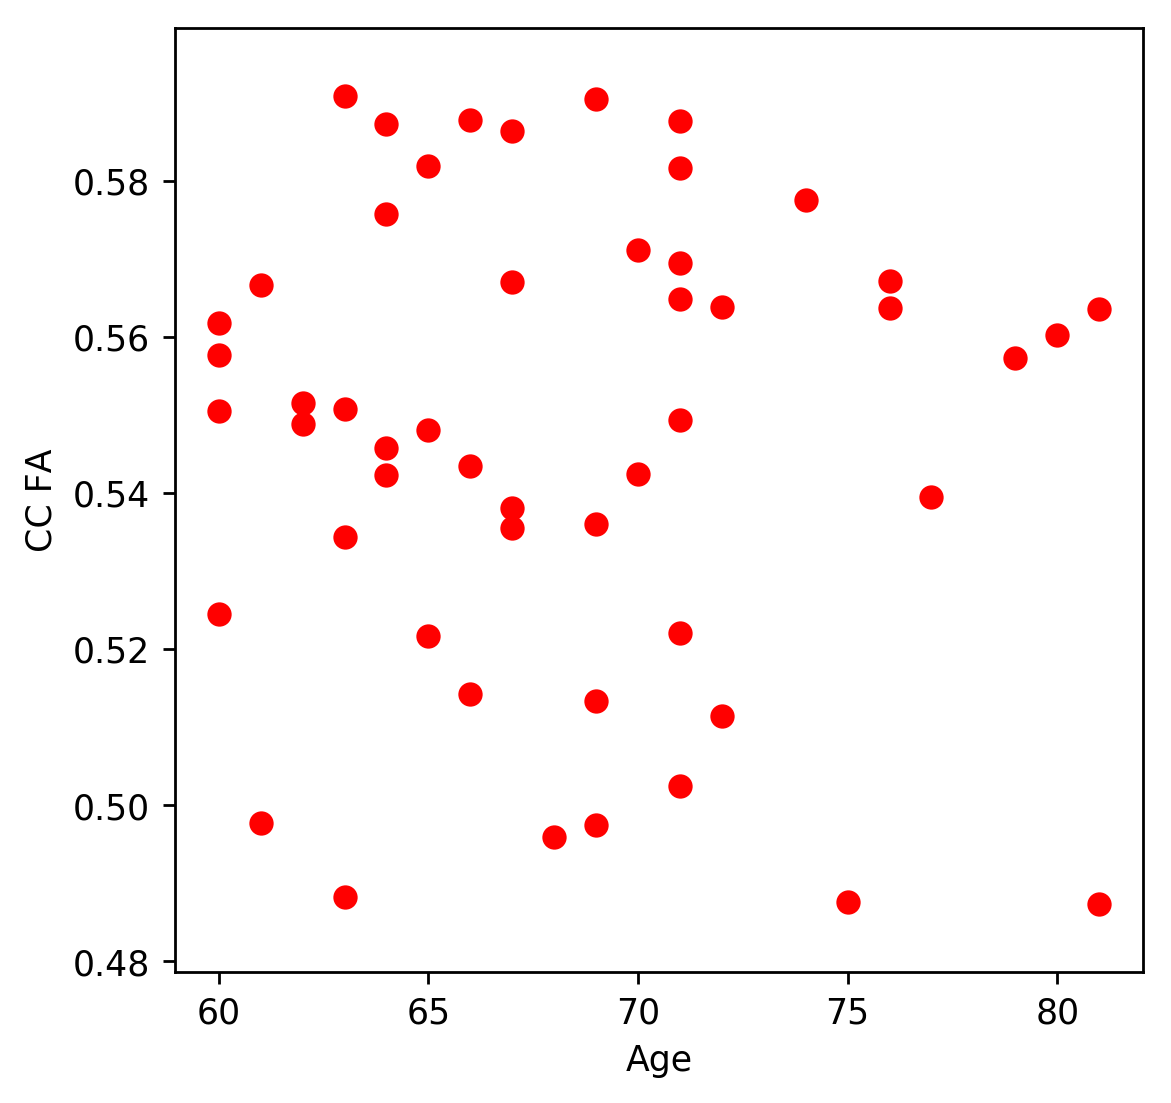

In [21]:
plt.subplots(figsize=(5,5), dpi=250)

plt.scatter(oa_df['age'], oa_df['CC_FA'], color = 'red')
plt.xlabel('Age')
plt.ylabel('CC FA')

(0.0002, 0.0004)

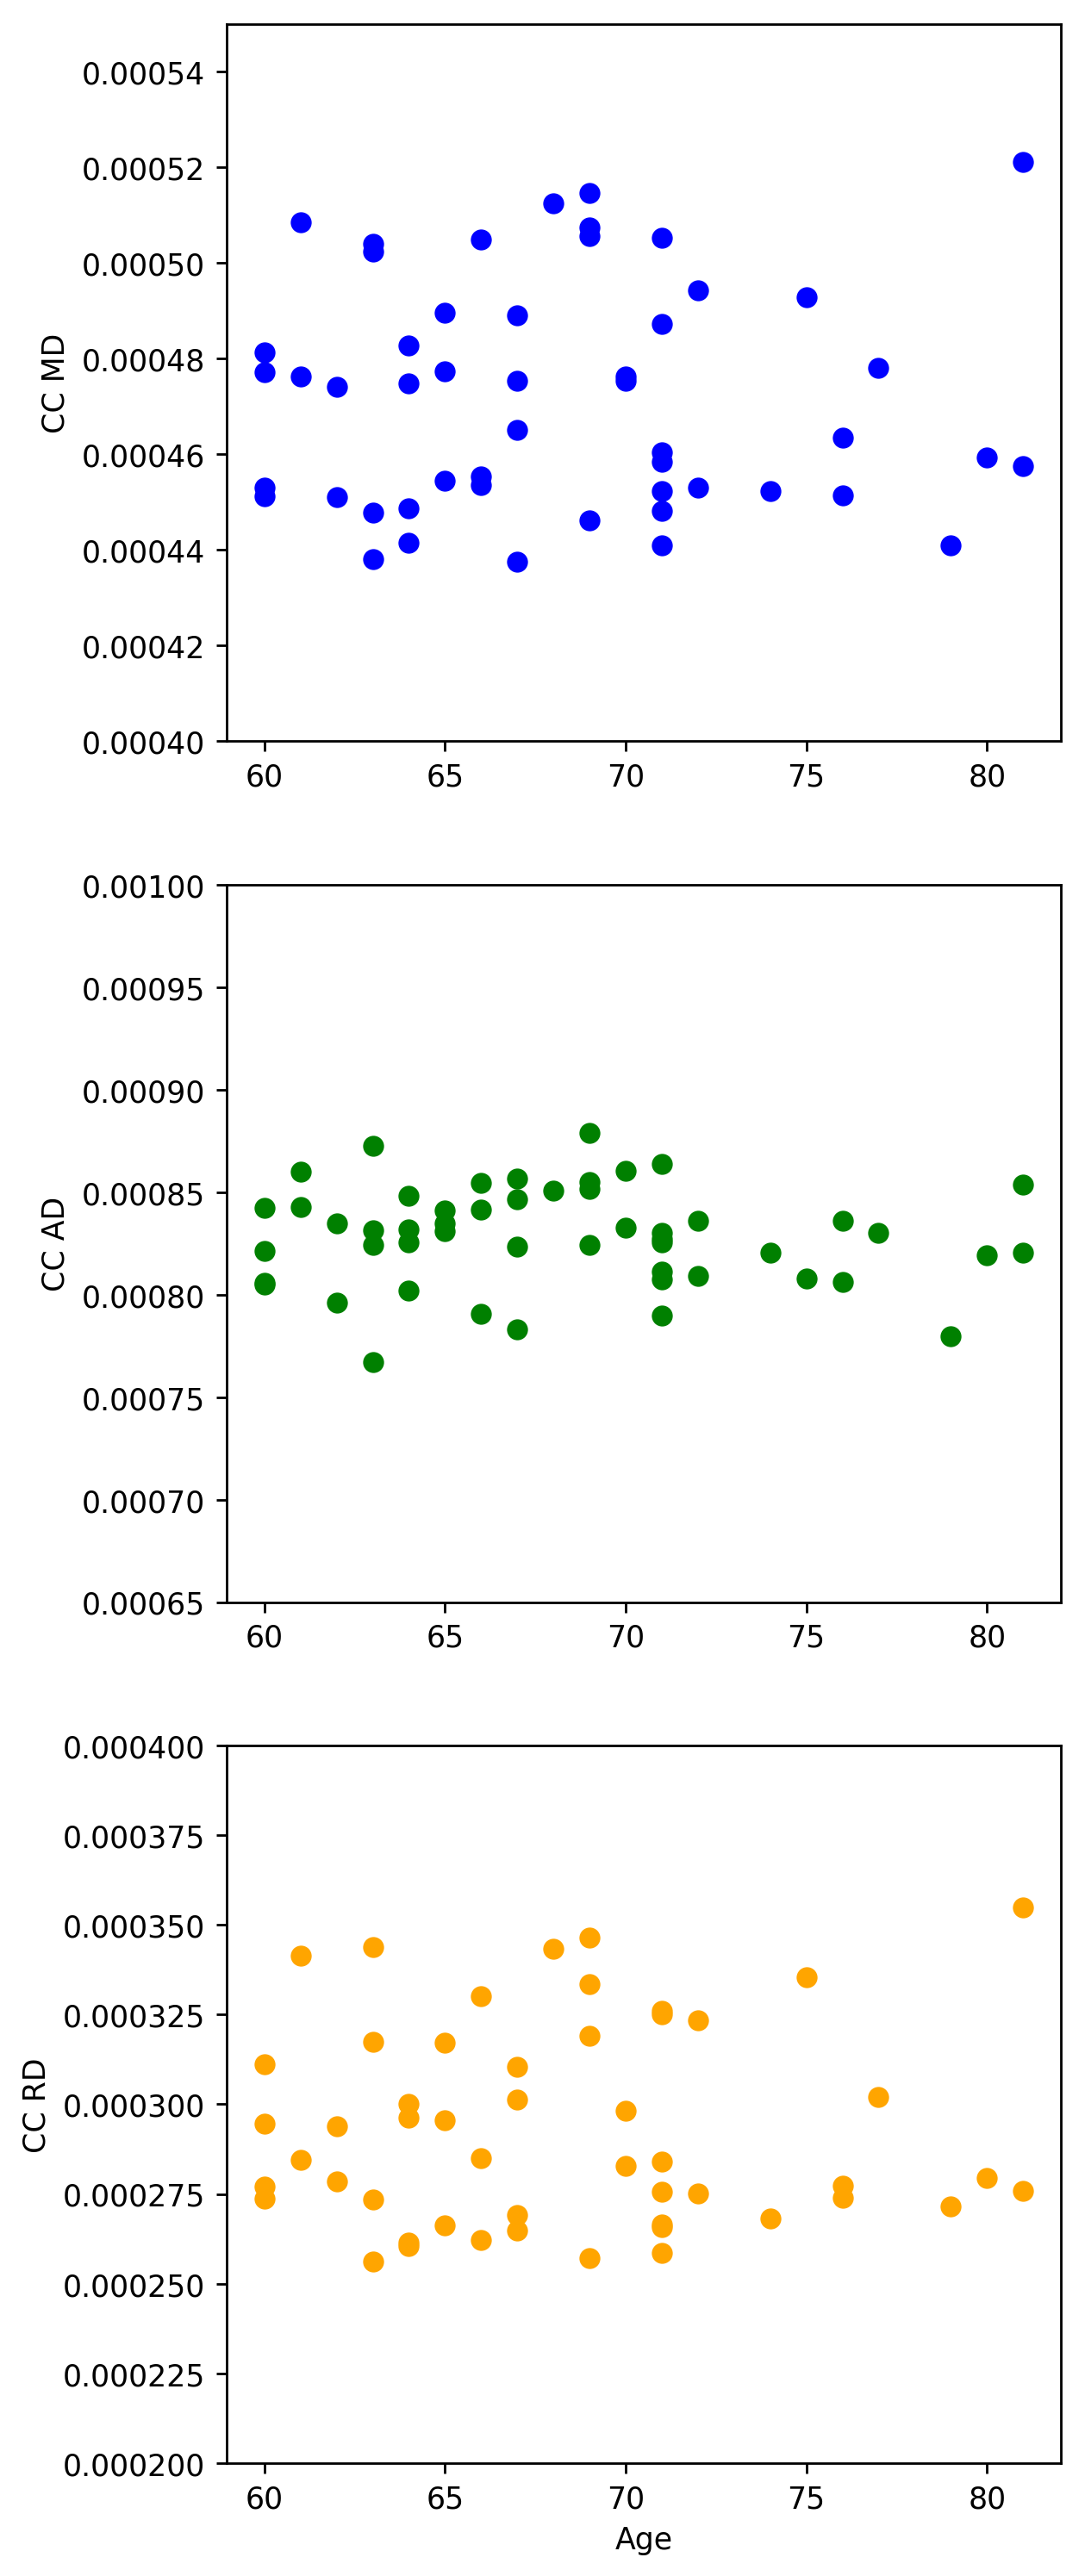

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(5,15), dpi=250)

ax1.scatter(oa_df['age'], oa_df['CC_MD'], color = 'blue')
ax1.set(ylabel='CC MD')
ax1.set_ylim([0.0004, 0.00055])

ax2.scatter(oa_df['age'], oa_df['CC_AD'], color = 'green')
ax2.set(ylabel='CC AD')
ax2.set_ylim([0.00065, 0.001])

ax3.scatter(oa_df['age'], oa_df['CC_RD'], color = 'orange')
ax3.set(xlabel='Age', ylabel='CC RD')
ax3.set_ylim([0.0002, 0.0004])


### Young Adults

In [91]:
ya_files = pd.DataFrame(os.listdir(home_dir + '/tbss_ya/origdata'), columns = ['files'])

ya_fa = pd.read_csv(home_dir + '/tbss_ya/stats/mean_fa_cc.txt', names = ['CC_FA'])
ya_md = pd.read_csv(home_dir + '/tbss_ya/stats/mean_md_cc.txt', names = ['CC_MD'])
ya_ad = pd.read_csv(home_dir + '/tbss_ya/stats/mean_ad_cc.txt', names = ['CC_AD'])
ya_rd = pd.read_csv(home_dir + '/tbss_ya/stats/mean_rd_cc.txt', names = ['CC_RD'])

ya_df1 = pd.concat([ya_files, ya_fa], axis = 1)
ya_df1 = pd.concat([ya_df1, ya_md], axis = 1)
ya_df1 = pd.concat([ya_df1, ya_ad], axis = 1)
ya_df1 = pd.concat([ya_df1, ya_rd], axis = 1)

ya_df1[0:5]

files     CC_FA     CC_MD     CC_AD     CC_RD
0  sub-30085_dti_FA.nii.gz  0.582804  0.000446  0.000808  0.000266
1  sub-30012_dti_FA.nii.gz  0.559800  0.000470  0.000828  0.000291
2  sub-30236_dti_FA.nii.gz  0.601367  0.000449  0.000831  0.000258
3  sub-30403_dti_FA.nii.gz  0.587033  0.000439  0.000797  0.000260
4  sub-30096_dti_FA.nii.gz  0.586247  0.000433  0.000786  0.000257

In [92]:
ya_df1['record_id1'] = ya_df1['files'].str.split('-', expand = True)[1]
ya_df1['record_id'] = ya_df1['record_id1'].str.split('_', expand = True)[0].astype(int)
ya_df1[0:5]

files     CC_FA     CC_MD     CC_AD     CC_RD  \
0  sub-30085_dti_FA.nii.gz  0.582804  0.000446  0.000808  0.000266   
1  sub-30012_dti_FA.nii.gz  0.559800  0.000470  0.000828  0.000291   
2  sub-30236_dti_FA.nii.gz  0.601367  0.000449  0.000831  0.000258   
3  sub-30403_dti_FA.nii.gz  0.587033  0.000439  0.000797  0.000260   
4  sub-30096_dti_FA.nii.gz  0.586247  0.000433  0.000786  0.000257   

            record_id1  record_id  
0  30085_dti_FA.nii.gz      30085  
1  30012_dti_FA.nii.gz      30012  
2  30236_dti_FA.nii.gz      30236  
3  30403_dti_FA.nii.gz      30403  
4  30096_dti_FA.nii.gz      30096

In [93]:
ya_df = pd.merge(ya_df1, beh, on = 'record_id', how = 'right')
ya_df = ya_df.dropna(subset = ['files'])
ya_df[0:5]

files     CC_FA     CC_MD     CC_AD     CC_RD  \
0  sub-30085_dti_FA.nii.gz  0.582804  0.000446  0.000808  0.000266   
1  sub-30012_dti_FA.nii.gz  0.559800  0.000470  0.000828  0.000291   
2  sub-30236_dti_FA.nii.gz  0.601367  0.000449  0.000831  0.000258   
3  sub-30403_dti_FA.nii.gz  0.587033  0.000439  0.000797  0.000260   
4  sub-30096_dti_FA.nii.gz  0.586247  0.000433  0.000786  0.000257   

            record_id1  record_id  age     sex  years_educ        ...          \
0  30085_dti_FA.nii.gz      30085   19  Female        14.0        ...           
1  30012_dti_FA.nii.gz      30012   30    Male        21.0        ...           
2  30236_dti_FA.nii.gz      30236   24  Female        16.0        ...           
3  30403_dti_FA.nii.gz      30403   18    Male        12.0        ...           
4  30096_dti_FA.nii.gz      30096   19  Female        13.0        ...           

   cvlt_recognition_fp_zscore  cvlt_zscore  vc_zscore  ds_zscore  \
0                         NaN          NaN       1.00       0.33   
1                         NaN          NaN       1.00       1.67   
2                         NaN          NaN       2.00       0.33   
3                         NaN          NaN       0.67      -0.33   
4                         NaN          NaN       2.00       0.33   

   stoop_i_zscore  cowat_zscore  trails_a_z_score  trails_b_z_score  \
0             NaN           NaN          1.154294          1.494878   
1             NaN           NaN         -1.216992         -0.268608   
2             NaN           NaN         -0.737991         -0.396375   
3             NaN           NaN          0.572052          0.943262   
4             NaN           NaN          0.426492          1.337273   

   time_trails_b  ds_backward_score  
0           30.0                8.0  
1           54.0               15.0  
2           54.0                8.0  
3           37.0                6.0  
4           32.0               11.0  

[5 rows x 61 columns]

In [94]:
ya_df.drop(columns = 'record_id').describe()

CC_FA      CC_MD      CC_AD      CC_RD        age  years_educ  \
count  44.000000  44.000000  44.000000  44.000000  46.000000   46.000000   
mean    0.571019   0.000450   0.000803   0.000274  21.521739   14.239130   
std     0.021386   0.000013   0.000023   0.000015   3.799059    1.982532   
min     0.507781   0.000427   0.000764   0.000251  18.000000   12.000000   
25%     0.561332   0.000442   0.000786   0.000261  19.000000   13.000000   
50%     0.575156   0.000448   0.000805   0.000271  20.000000   14.000000   
75%     0.586444   0.000459   0.000814   0.000283  23.750000   16.000000   
max     0.608647   0.000474   0.000864   0.000320  30.000000   21.000000   

              IS         IV         RA     actamp        ...          \
count  46.000000  46.000000  46.000000  39.000000        ...           
mean    0.390870   0.913261   0.831304   1.646618        ...           
std     0.109419   0.245728   0.154051   0.234903        ...           
min     0.030000   0.460000   0.170000   1.000000        ...           
25%     0.315000   0.740000   0.822500   1.518578        ...           
50%     0.405000   0.915000   0.890000   1.610770        ...           
75%     0.450000   1.057500   0.927500   1.899808        ...           
max     0.580000   1.580000   0.970000   2.047120        ...           

       cvlt_recognition_fp_zscore  cvlt_zscore  vc_zscore  ds_zscore  \
count                         0.0          0.0  46.000000  46.000000   
mean                          NaN          NaN   1.419783   0.397609   
std                           NaN          NaN   0.900300   1.013285   
min                           NaN          NaN  -1.330000  -1.670000   
25%                           NaN          NaN   1.000000  -0.247500   
50%                           NaN          NaN   1.330000   0.330000   
75%                           NaN          NaN   2.000000   1.247500   
max                           NaN          NaN   3.000000   3.000000   

       stoop_i_zscore  cowat_zscore  trails_a_z_score  trails_b_z_score  \
count             0.0           0.0         46.000000         46.000000   
mean              NaN           NaN         -0.247918         -0.304770   
std               NaN           NaN          1.086054          1.286478   
min               NaN           NaN         -4.776119         -5.597321   
25%               NaN           NaN         -0.576355         -0.860629   
50%               NaN           NaN         -0.112318         -0.253690   
75%               NaN           NaN          0.426492          0.683712   
max               NaN           NaN          1.154294          1.494878   

       time_trails_b  ds_backward_score  
count      46.000000          45.000000  
mean       53.195652           9.244444  
std        16.389183           2.337010  
min        30.000000           5.000000  
25%        42.000000           8.000000  
50%        53.000000           9.000000  
75%        60.000000          11.000000  
max       120.000000          15.000000  

[8 rows x 57 columns]

Text(0.5, 1.0, 'Age')

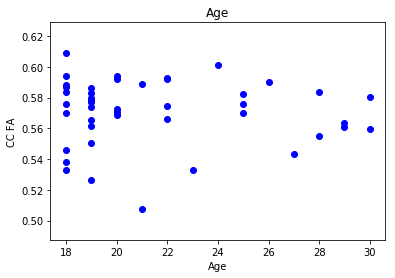

In [95]:
plt.scatter(ya_df['age'], ya_df['CC_FA'], color = 'blue')
plt.xlabel("Age")
plt.ylabel("CC FA")
plt.title("Age")

### Plots

In [96]:
oa_df = oa_df[oa_df['actalph']<.9] #excluding 40175

In [97]:
ya_df = ya_df.assign(Group='Young Adults')
oa_df = oa_df.assign(Group='Older Adults')


Text(0.5, 1.0, 'Older Adults')

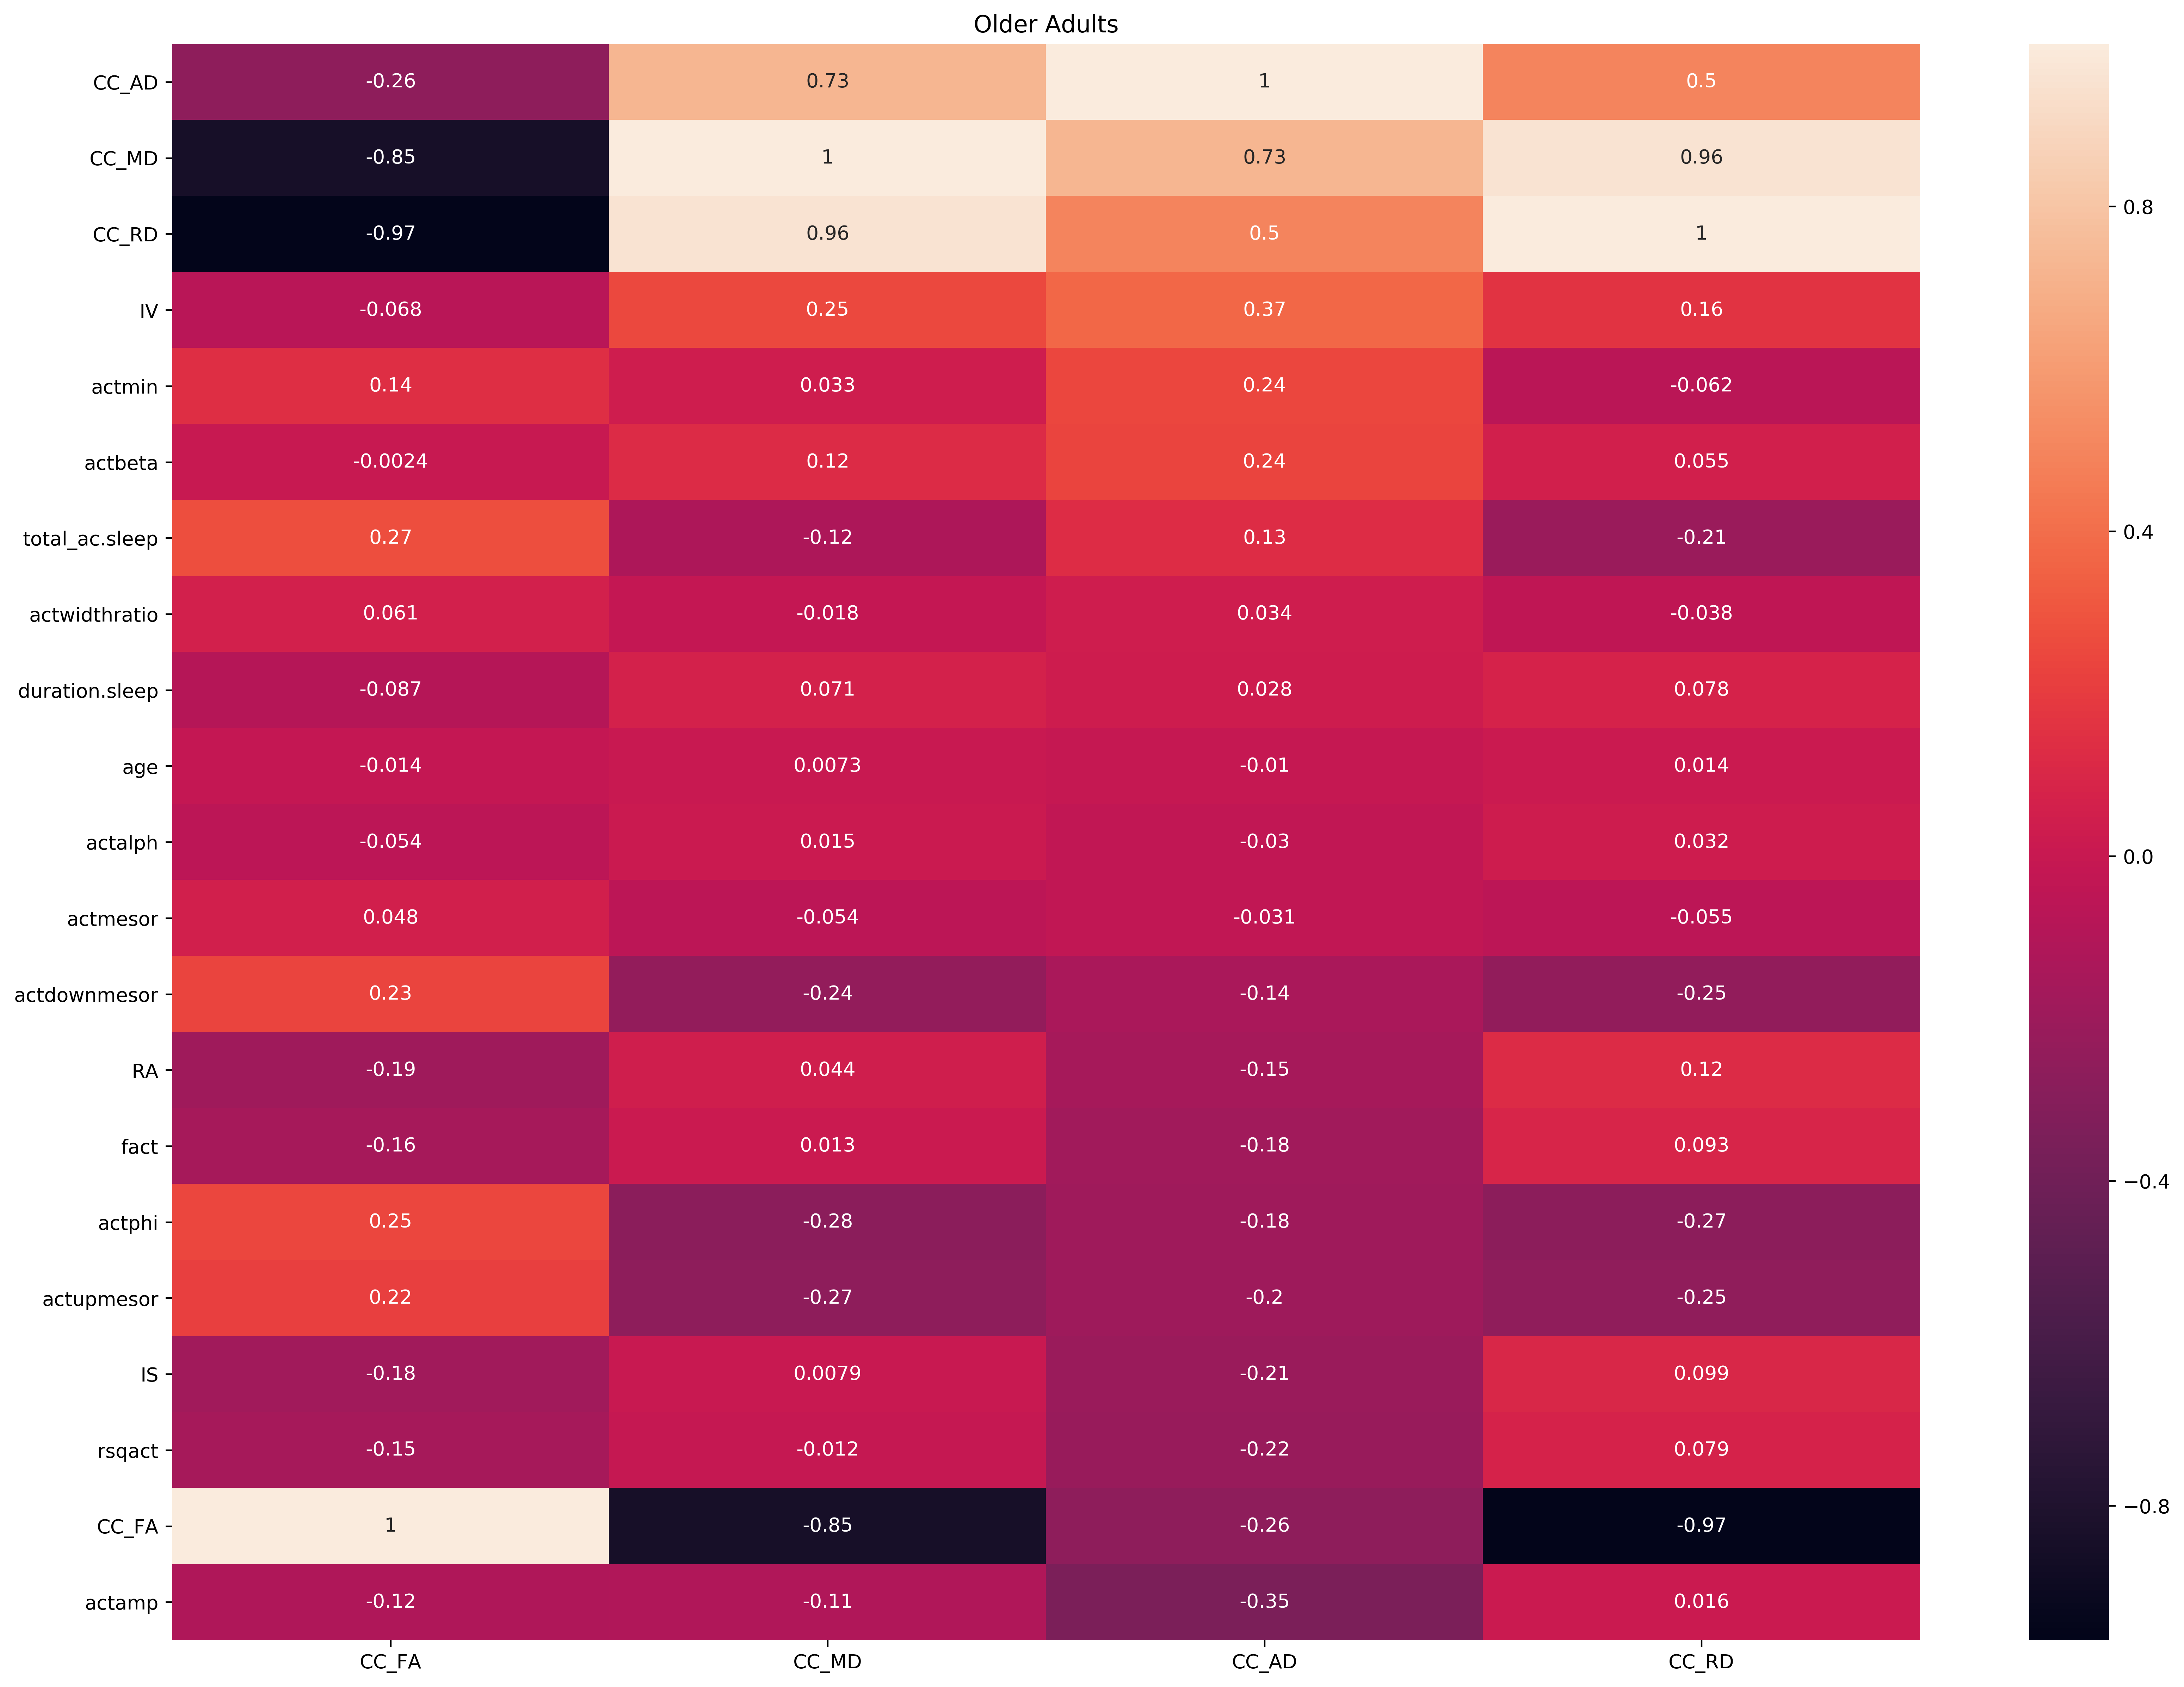

In [133]:
import seaborn as sns

oa_corr = oa_df.drop(columns = ['record_id', 'years_educ']).iloc[:,0:24].corr()

fig, ax1 = plt.subplots(figsize=(20,15), dpi=400)
sns.heatmap(oa_corr[['CC_FA', 'CC_MD', 'CC_AD', 'CC_RD']].sort_values(by=['CC_AD'],ascending=False), annot=True, ax=ax1)
ax1.set_title('Older Adults')


Text(0.5, 1.0, 'Young Adults')

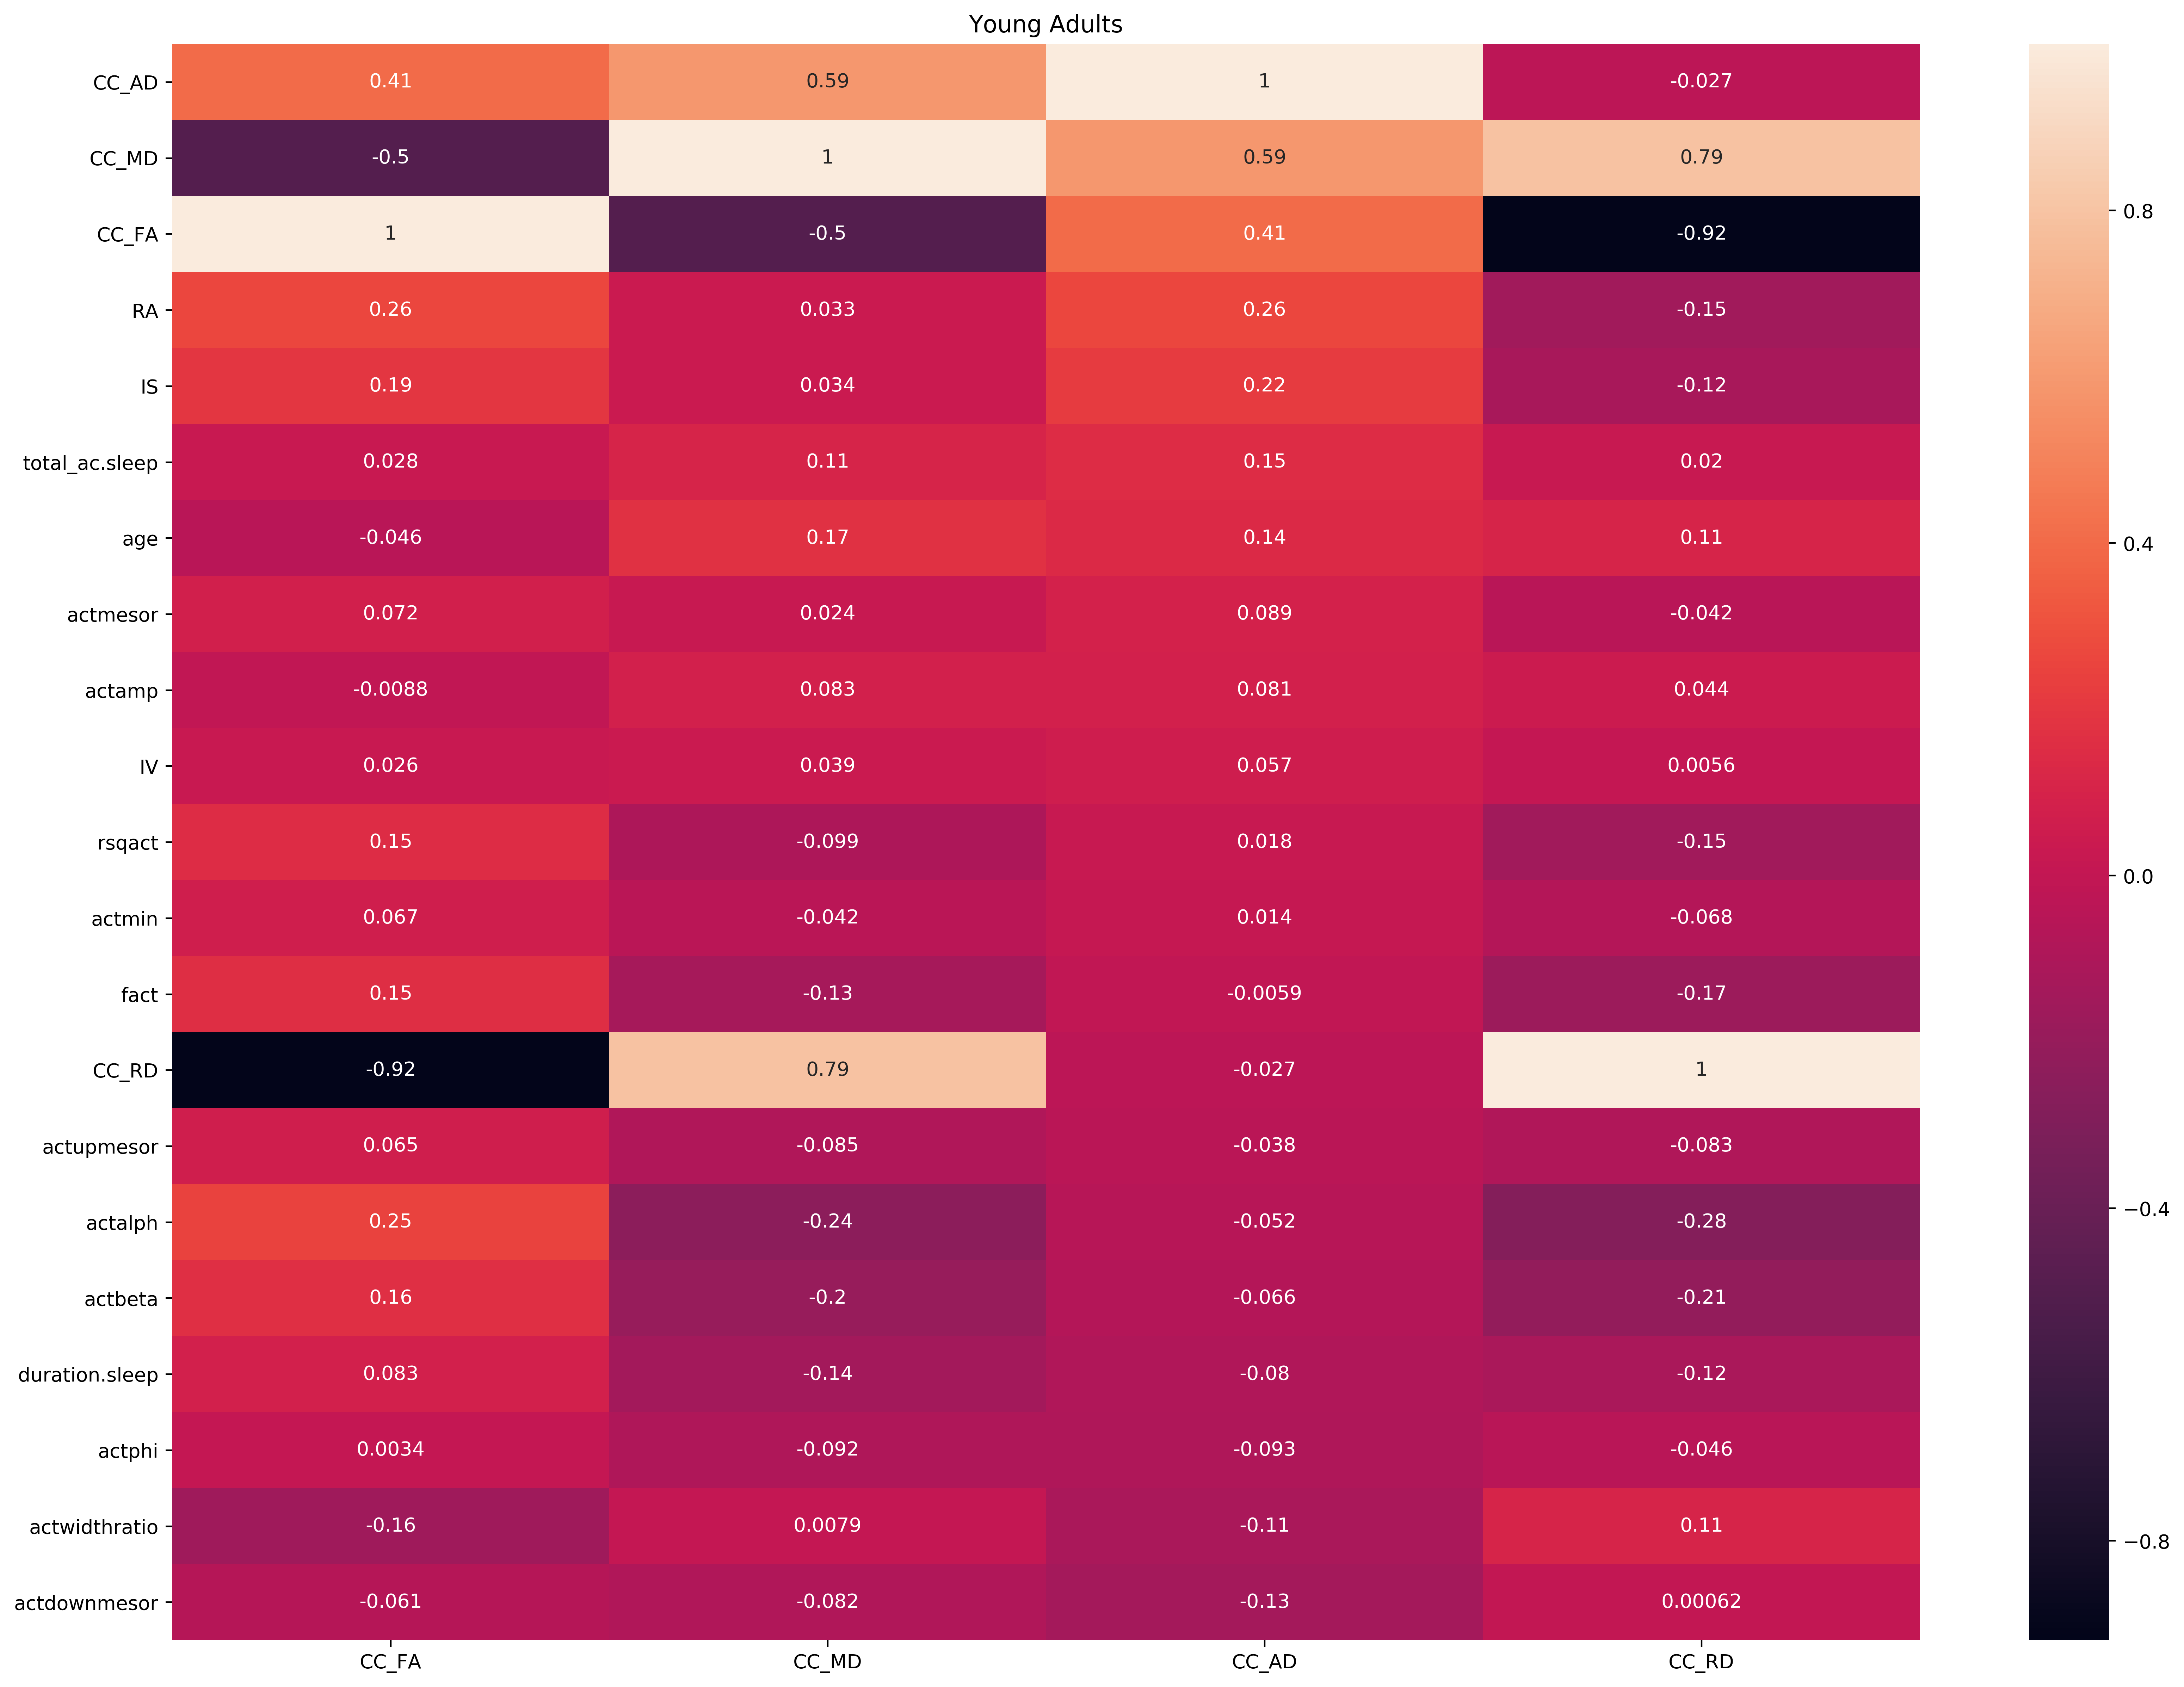

In [134]:
import seaborn as sns

ya_corr = ya_df.drop(columns = ['record_id', 'years_educ']).iloc[:,0:24].corr()

fig, ax1 = plt.subplots(figsize=(20,15), dpi=400)
sns.heatmap(ya_corr[['CC_FA', 'CC_MD', 'CC_AD', 'CC_RD']].sort_values(by=['CC_AD'],ascending=False), annot=True, ax=ax1)
ax1.set_title('Young Adults')


In [126]:
df = []
df = pd.concat([ya_df, oa_df], sort=True)
df.to_csv('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/Data/data_02_24_2020.csv')
#oa_df.to_csv('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/Data/data_02_21_2020.csv')


In [128]:
#median split
oa_df['FA'] = np.where(oa_df['CC_FA'] < np.nanmedian(oa_df['CC_FA']), "Low", "High")
ya_df['FA'] = np.where(ya_df['CC_FA'] < np.nanmedian(ya_df['CC_FA']), "Low", "High")

oa_df['MD'] = np.where(oa_df['CC_MD'] < np.nanmedian(oa_df['CC_MD']), "Low", "High")
ya_df['MD'] = np.where(ya_df['CC_MD'] < np.nanmedian(ya_df['CC_MD']), "Low", "High")

oa_df['AD'] = np.where(oa_df['CC_AD'] < np.nanmedian(oa_df['CC_AD']), "Low", "High")
ya_df['AD'] = np.where(ya_df['CC_AD'] < np.nanmedian(ya_df['CC_AD']), "Low", "High")

oa_df['RD'] = np.where(oa_df['CC_RD'] < np.nanmedian(oa_df['CC_RD']), "Low", "High")
ya_df['RD'] = np.where(ya_df['CC_RD'] < np.nanmedian(ya_df['CC_RD']), "Low", "High")

df1 = pd.concat([ya_df, oa_df], sort=True)

### Fractional Anisotropy

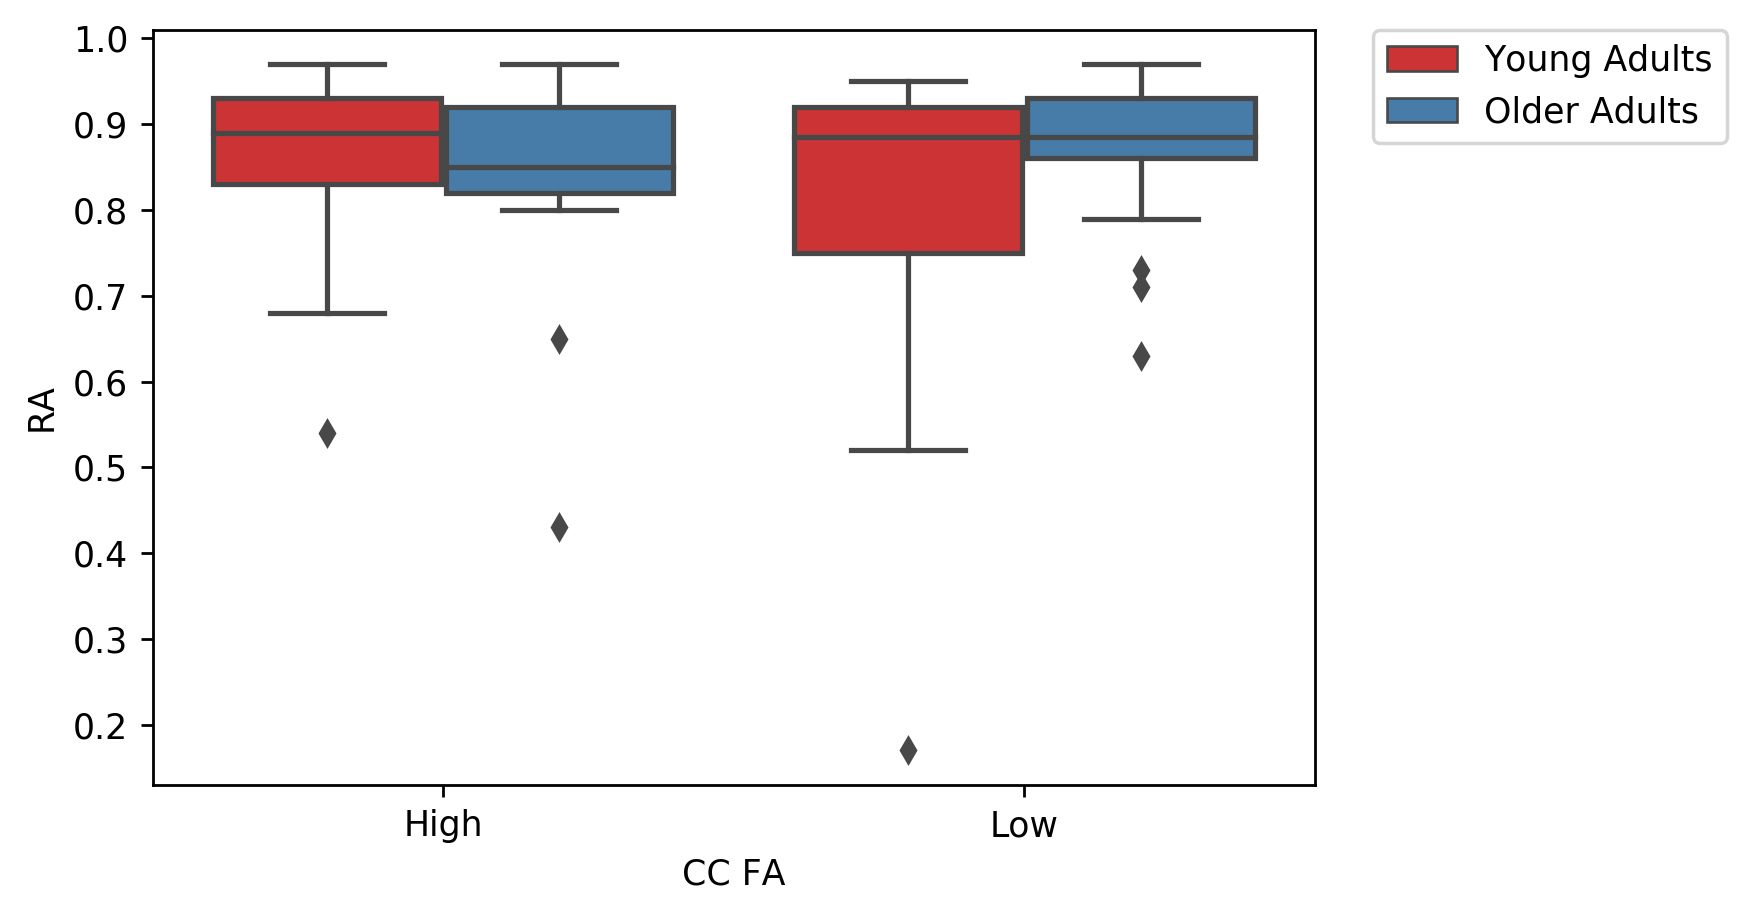

In [127]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="FA", y="RA", hue="Group", data=df1, palette="Set1").set(xlabel='CC FA')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


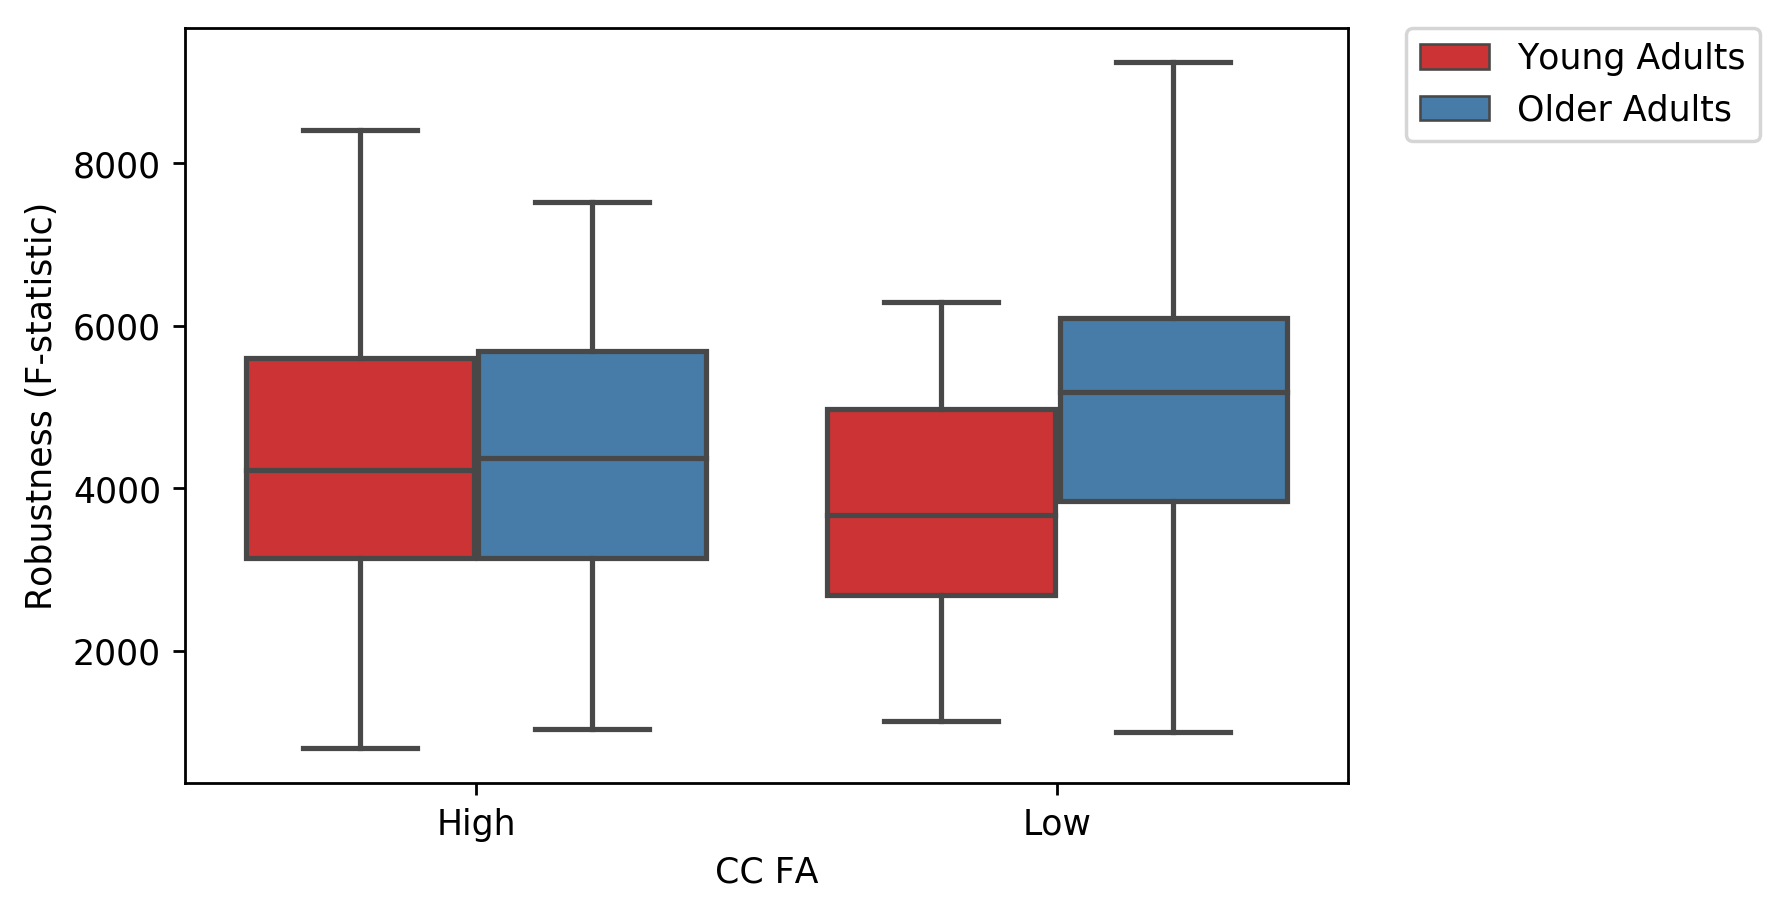

In [122]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="FA", y="fact", hue="Group", data=df1, palette="Set1").set(xlabel='CC FA', ylabel='Robustness (F-statistic)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


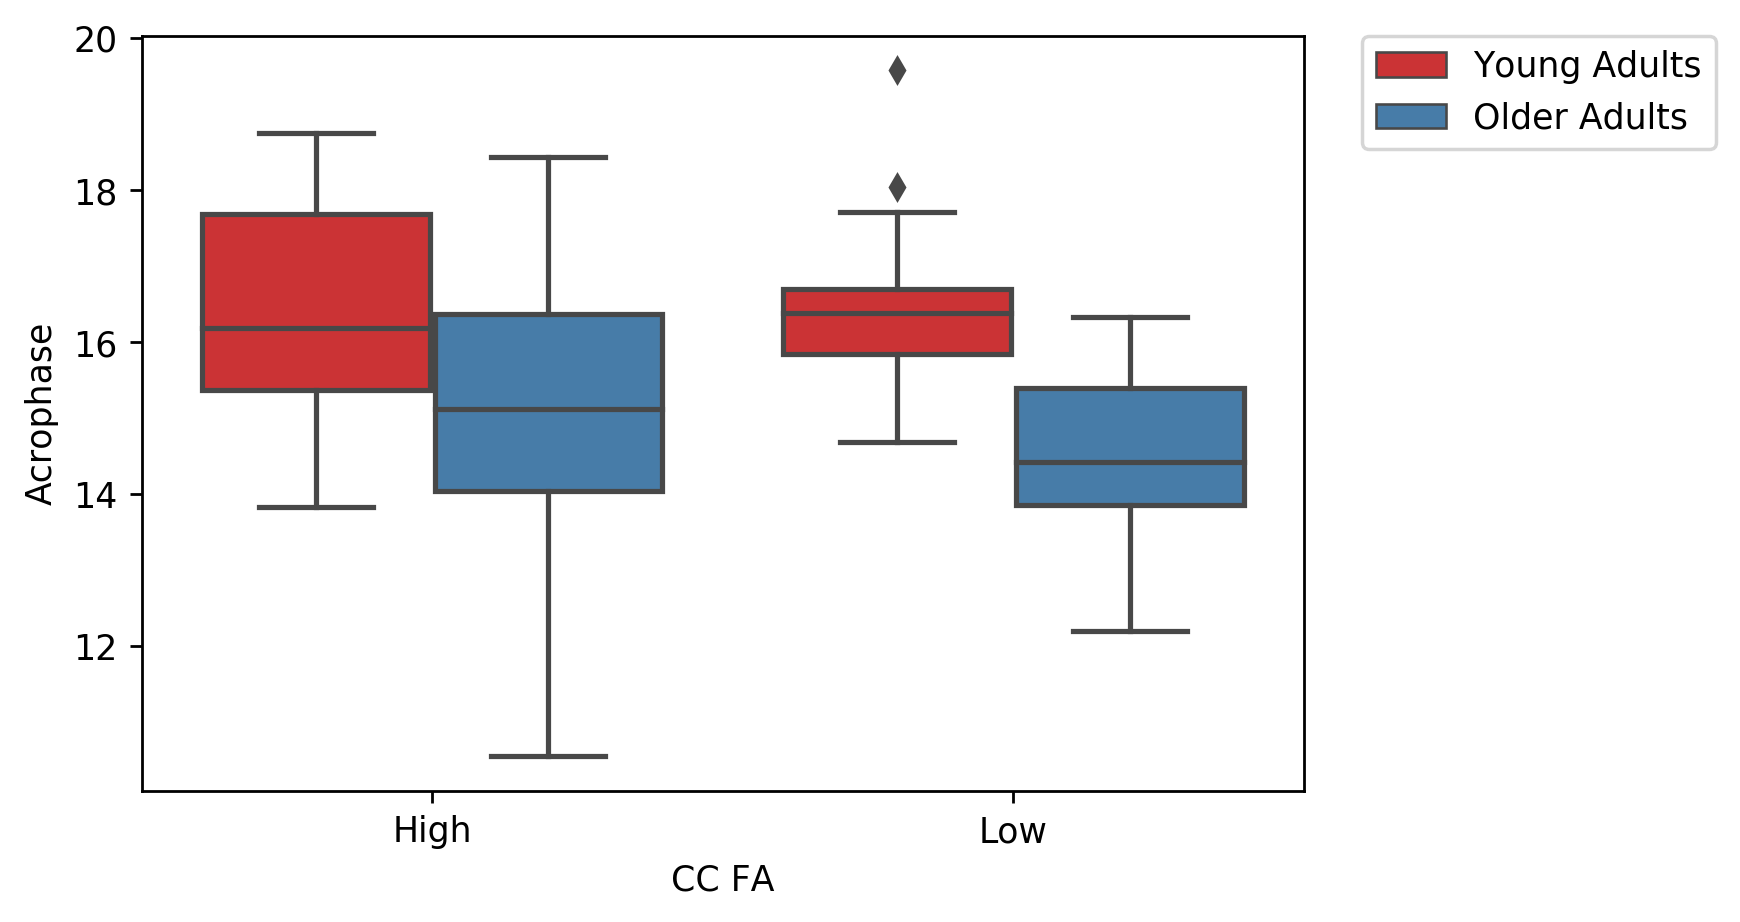

In [123]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="FA", y="actphi", hue="Group", data=df1, palette="Set1").set(xlabel='CC FA', ylabel='Acrophase')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


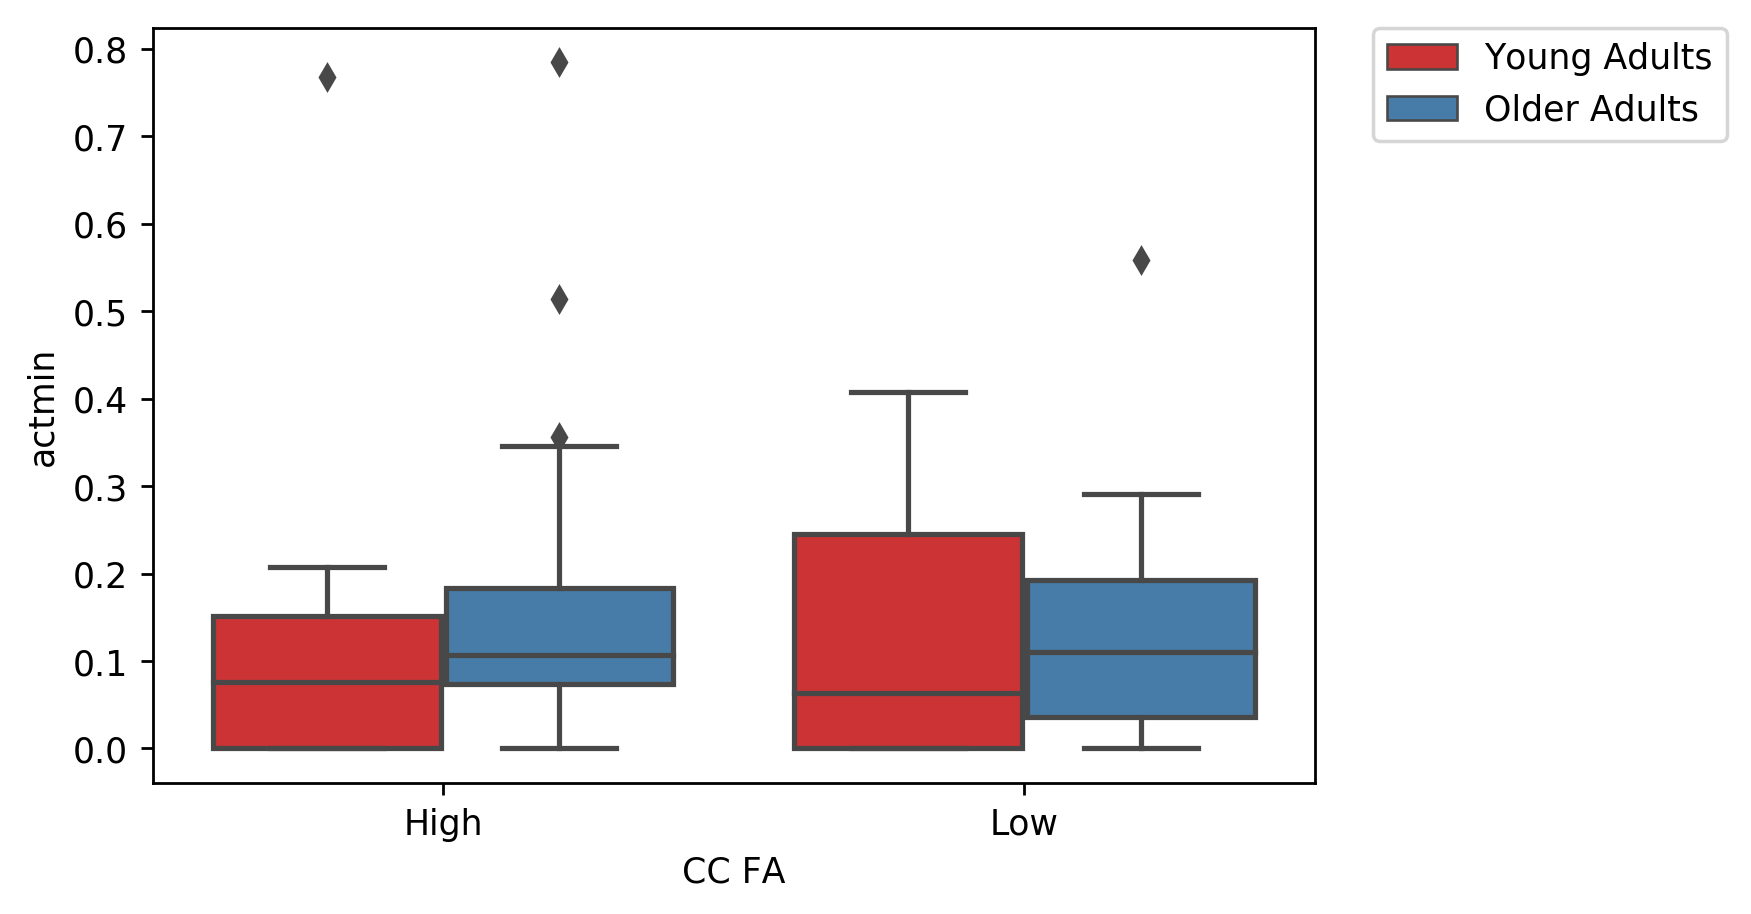

In [121]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="FA", y="actmin", hue="Group", data=df1, palette="Set1").set(xlabel='CC FA', ylabel='actmin')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


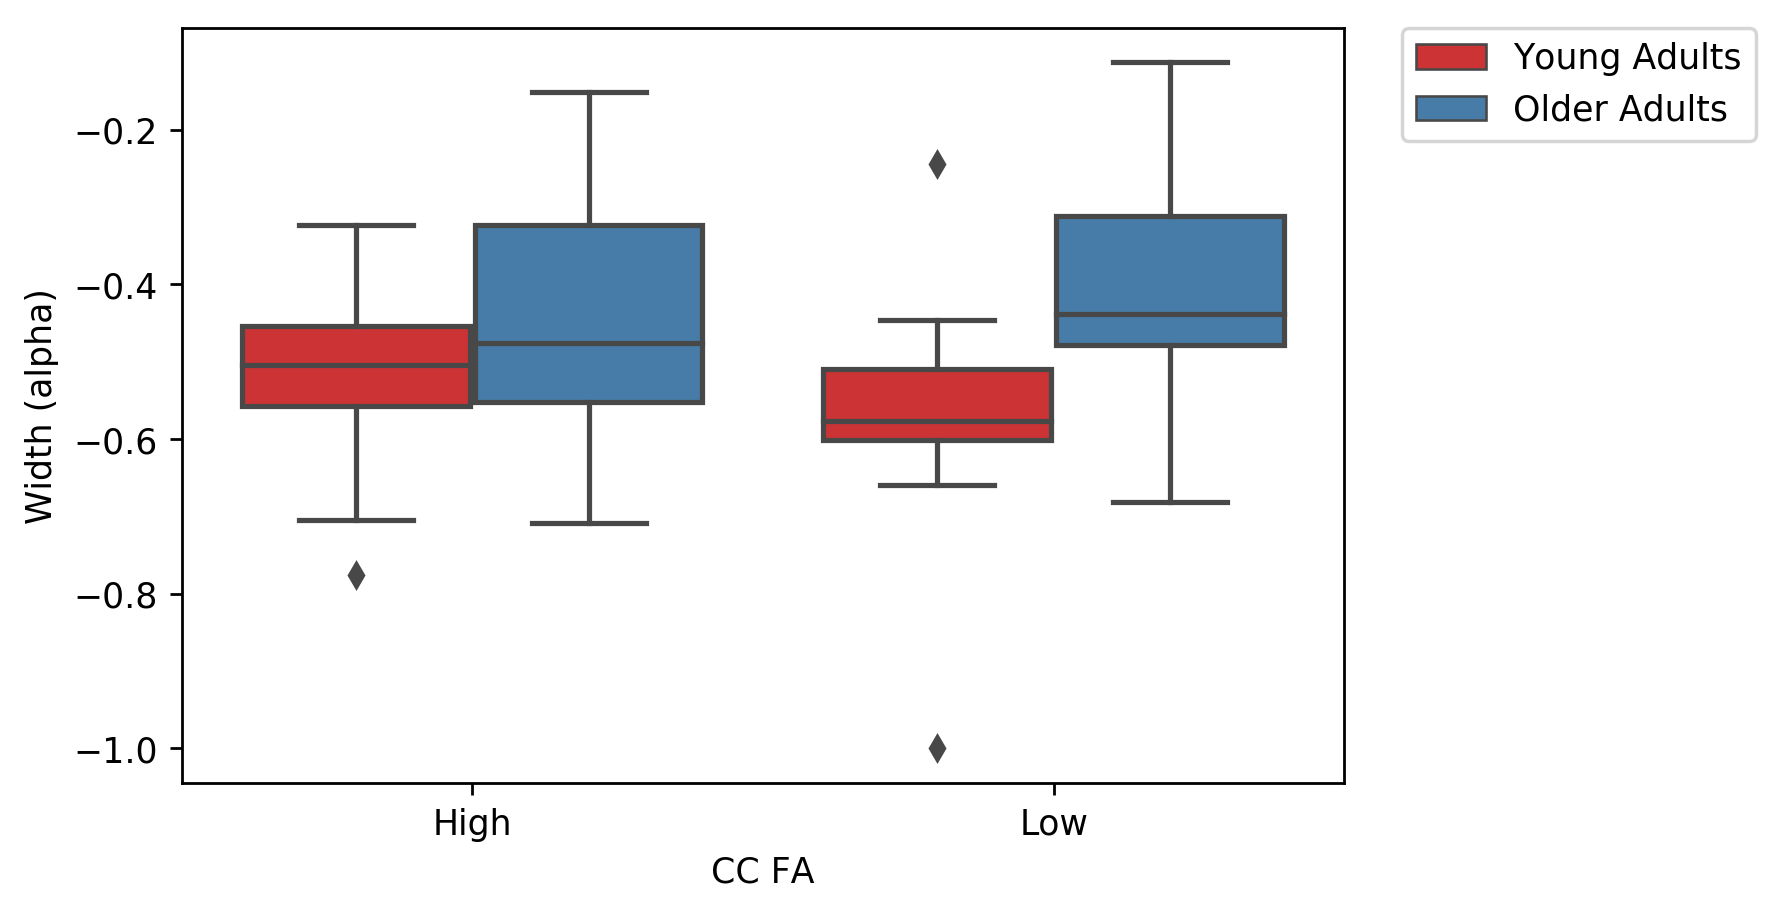

In [125]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="FA", y="actalph", hue="Group", data=df1, palette="Set1").set(xlabel='CC FA', ylabel='Width (alpha)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### Axial Diffusivity


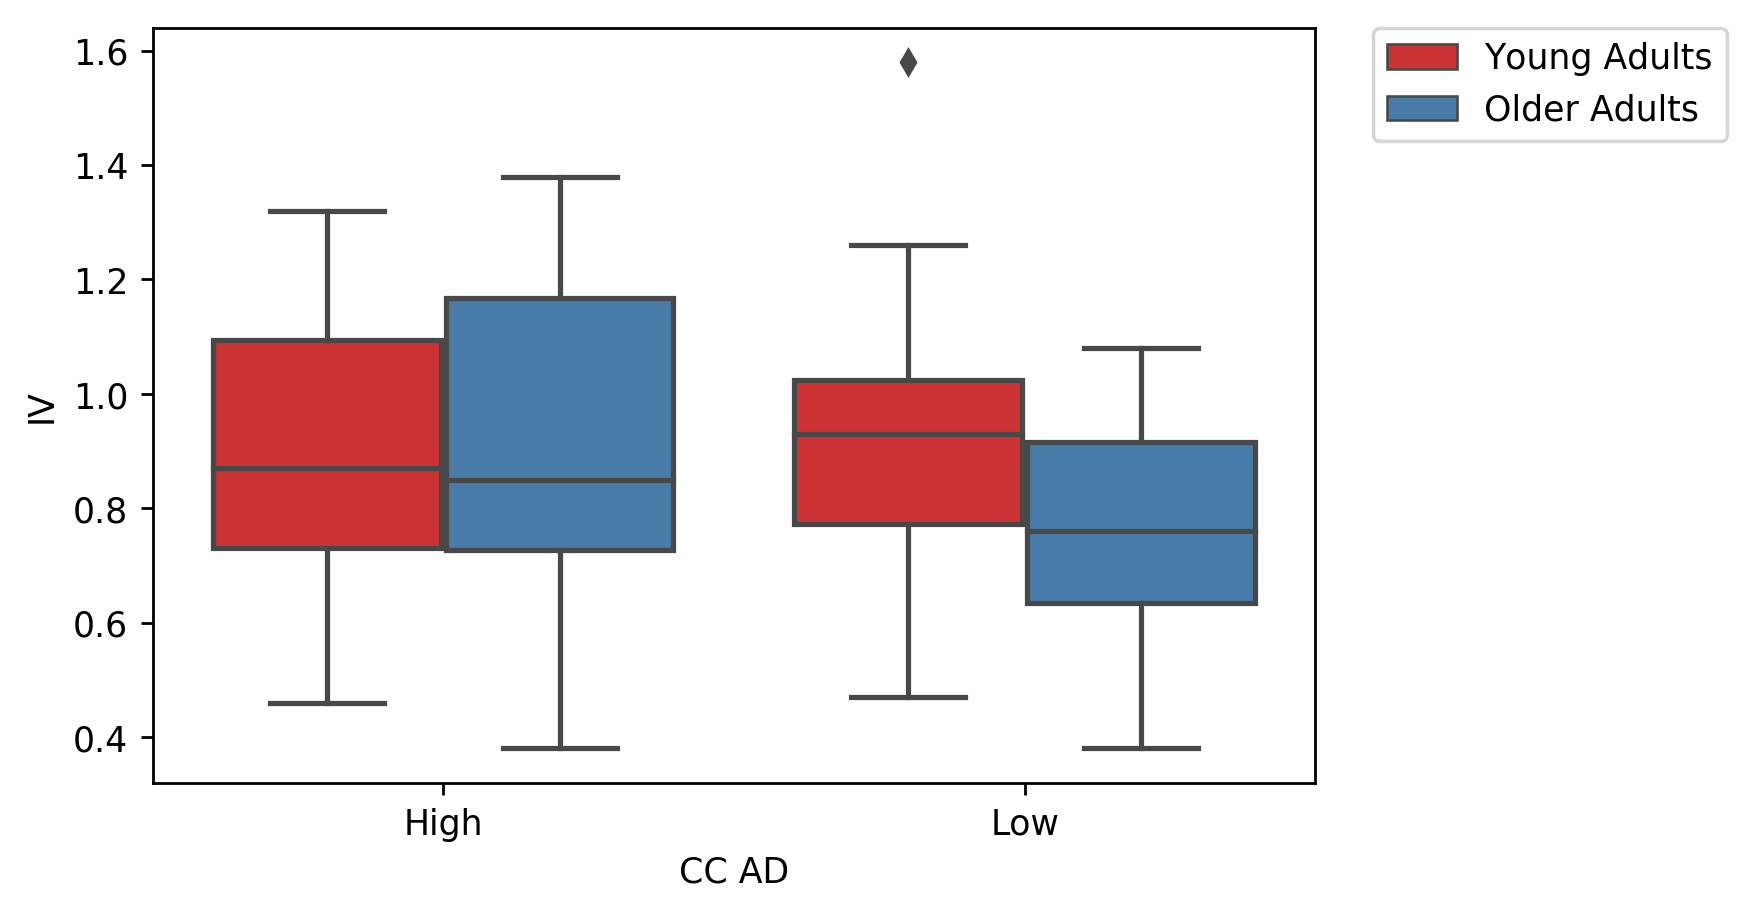

In [138]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="AD", y="IV", hue="Group", data=df1, palette="Set1").set(xlabel='CC AD', ylabel='IV')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


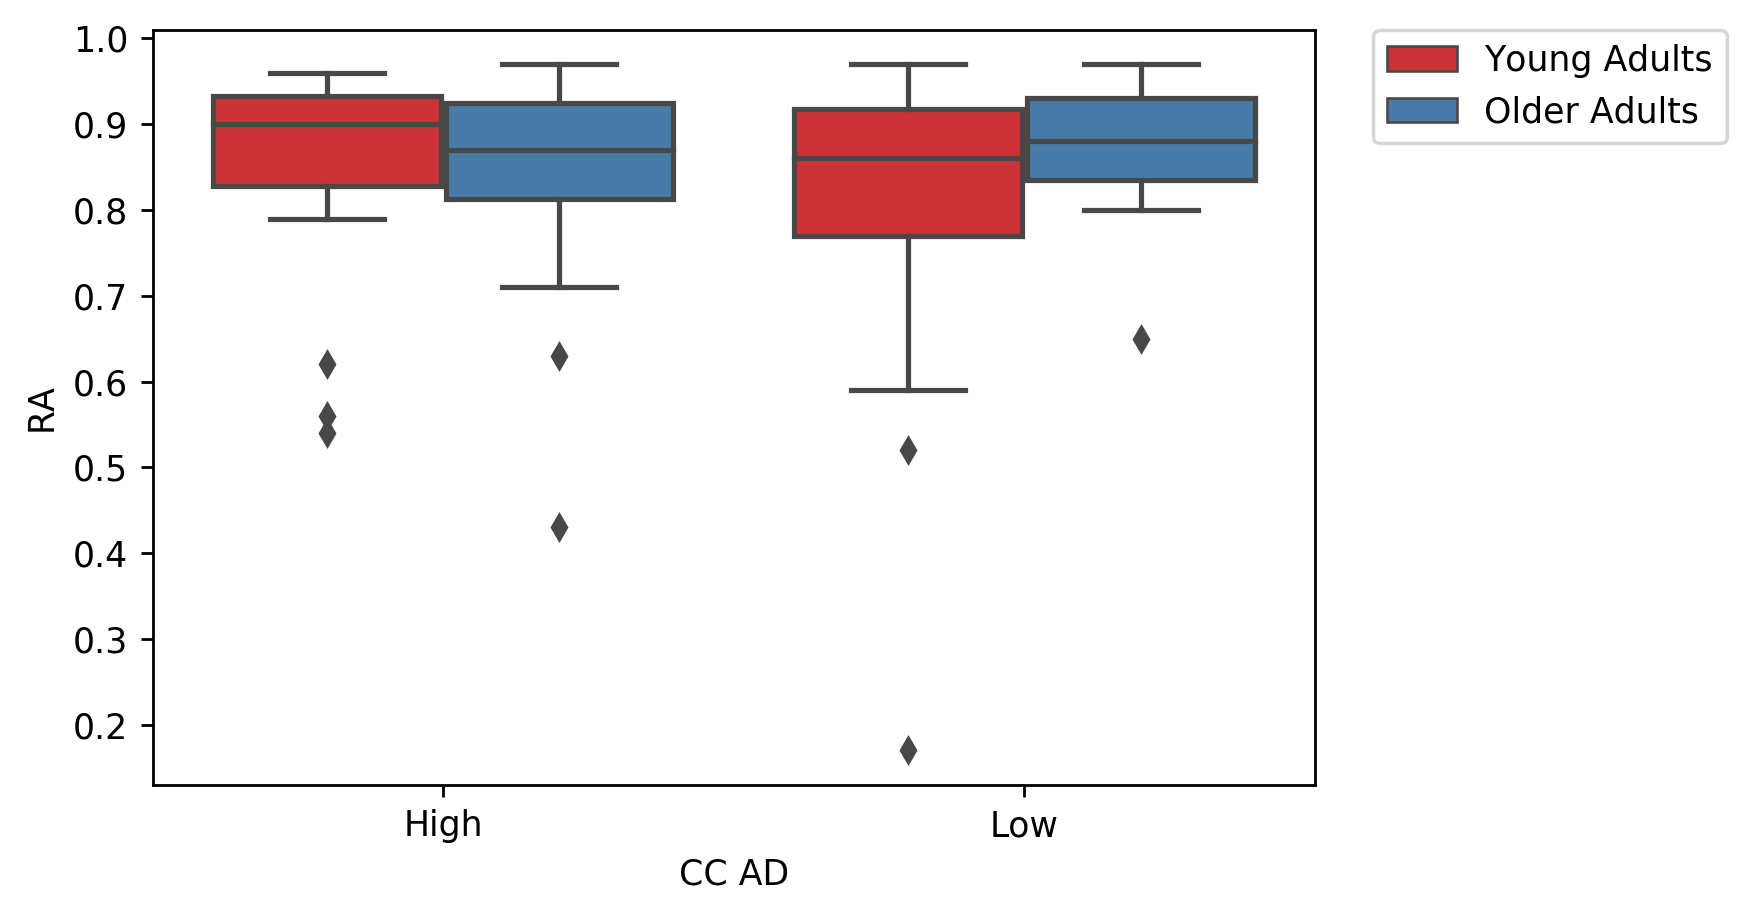

In [139]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="AD", y="RA", hue="Group", data=df1, palette="Set1").set(xlabel='CC AD', ylabel='RA')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


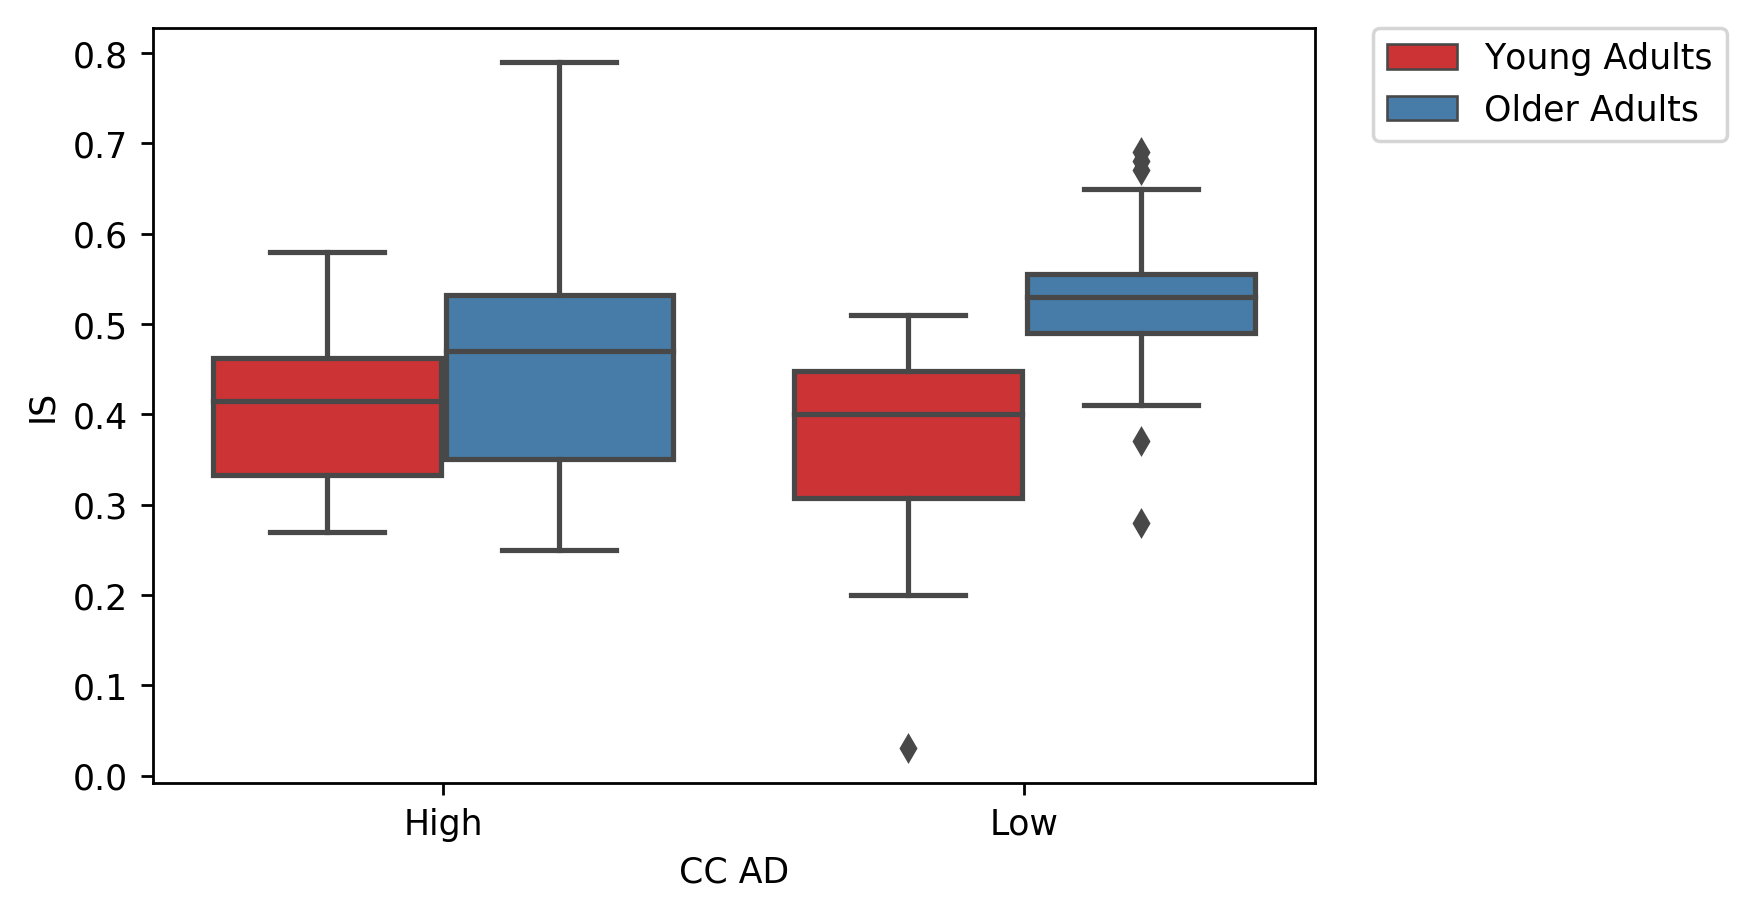

In [144]:
import seaborn as sns

plt.subplots(dpi=250)
sns.boxplot(x="AD", y="IS", hue="Group", data=df1, palette="Set1").set(xlabel='CC AD', ylabel='IS')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


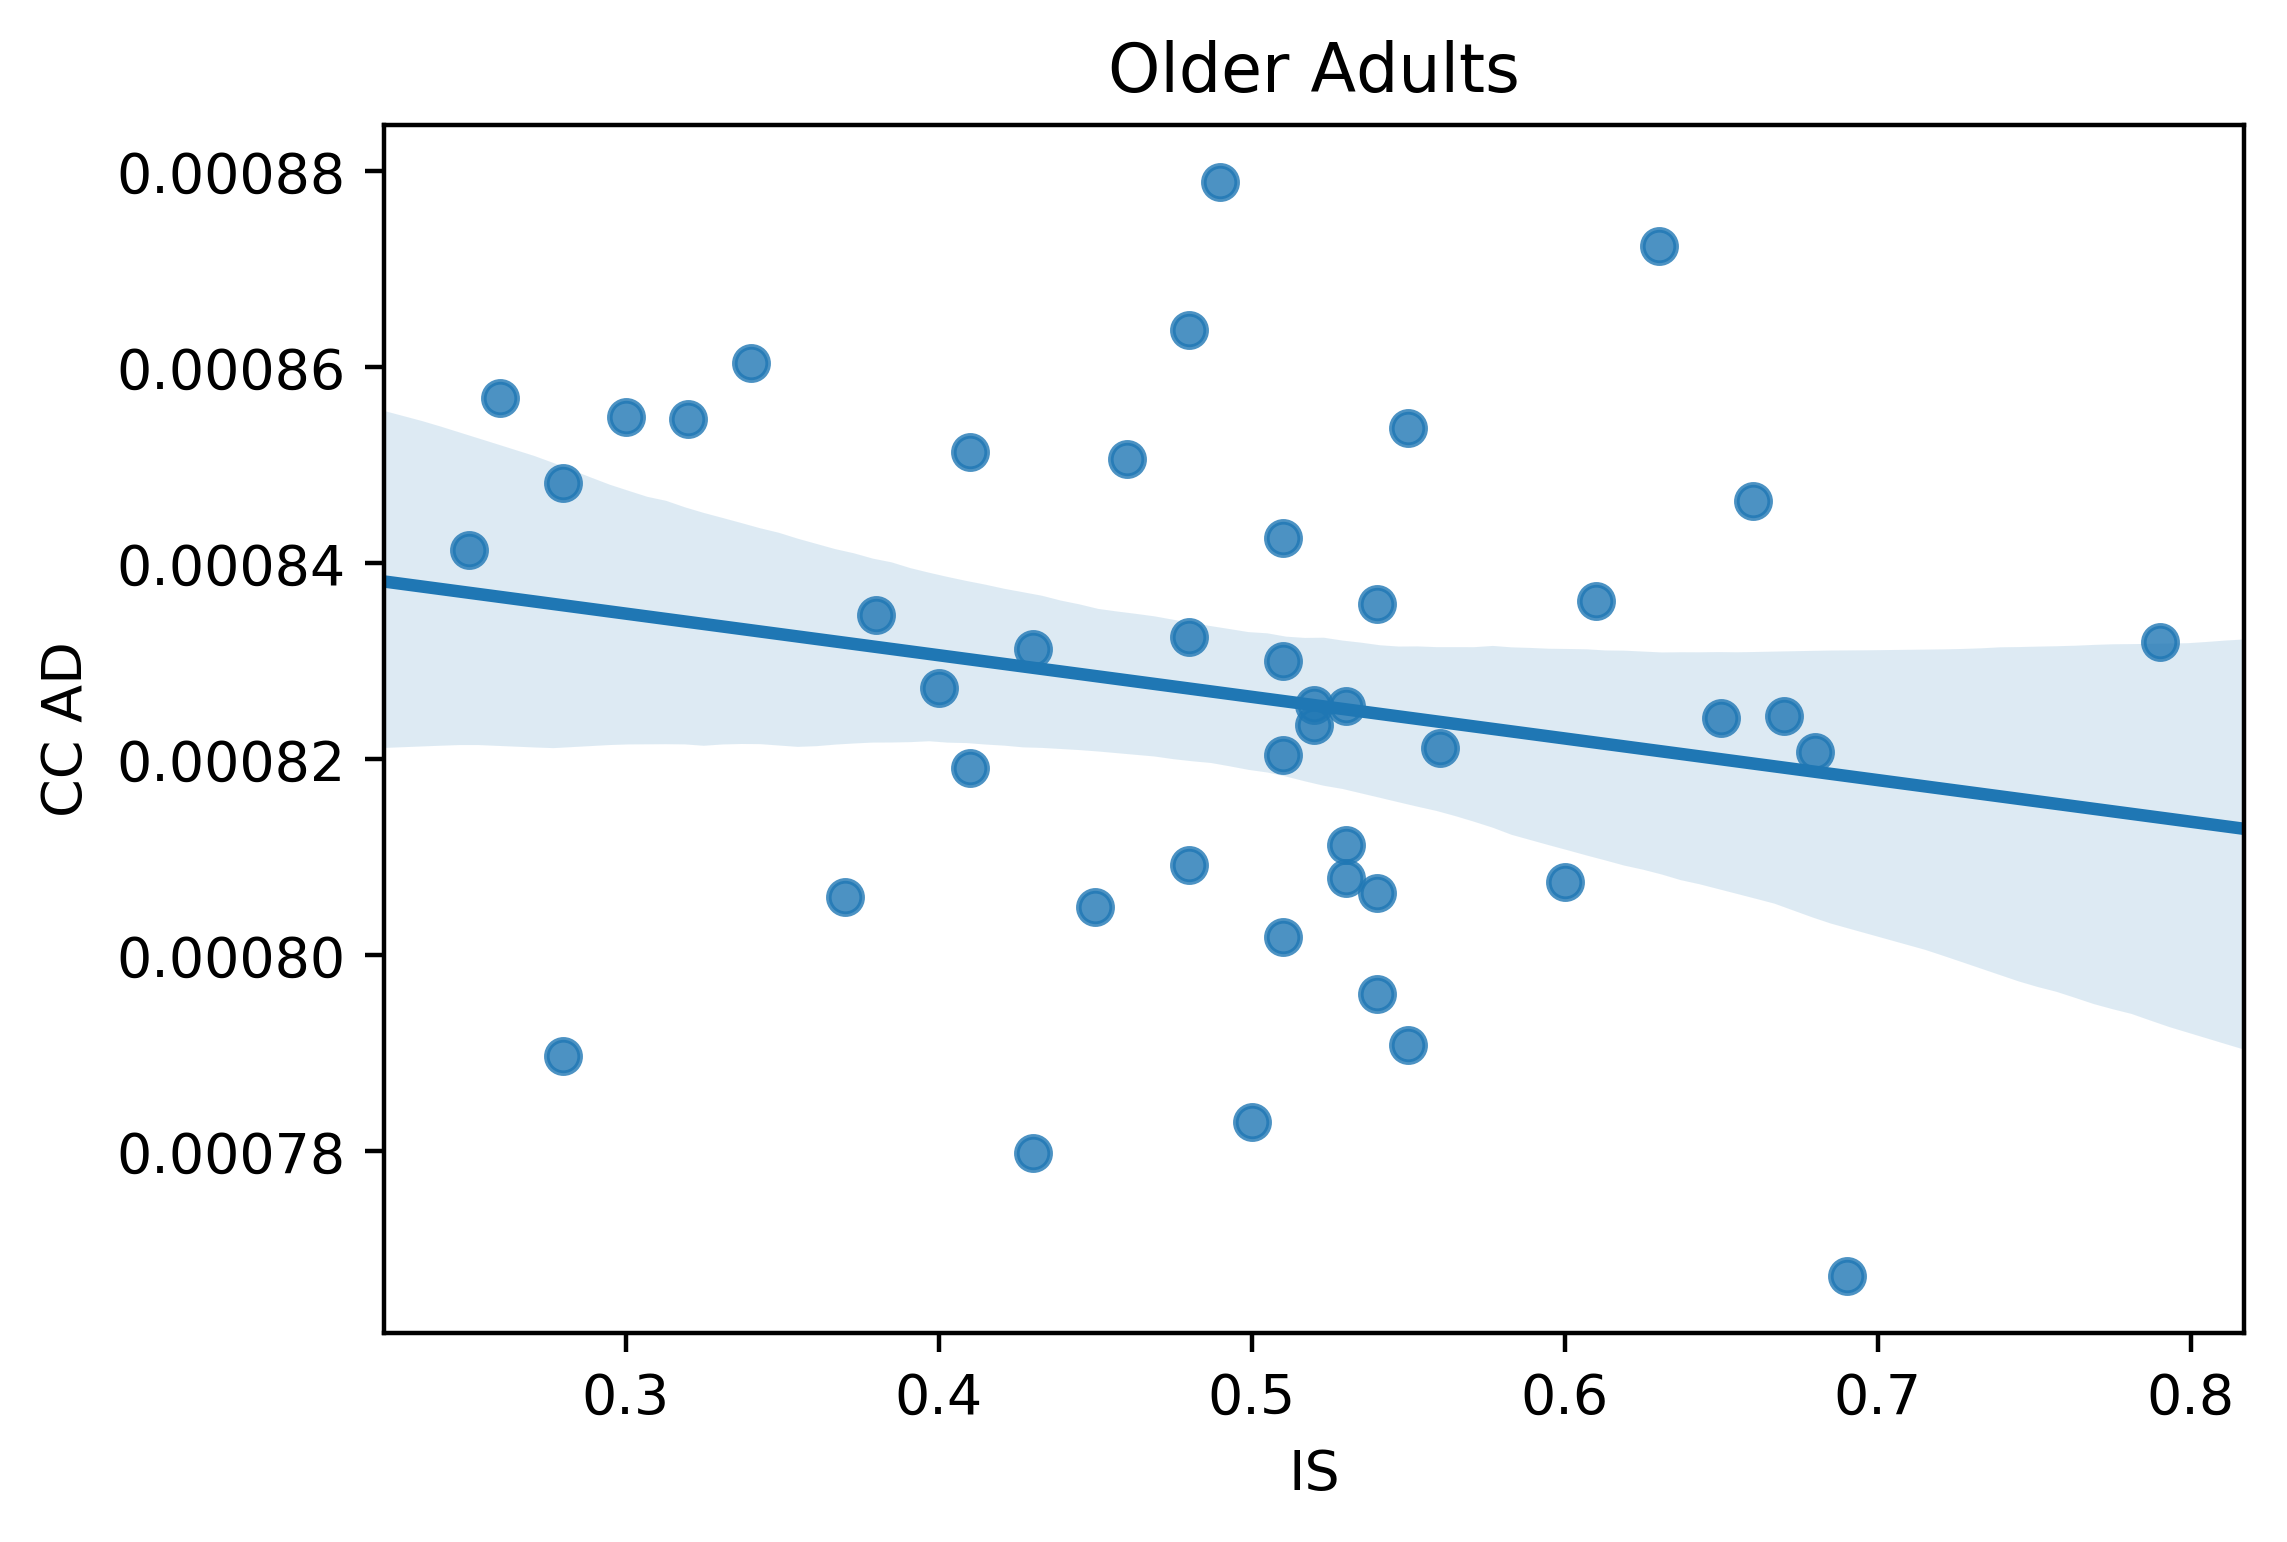

In [149]:
plt.subplots(dpi=400)
ax1 = sns.regplot(x="IS", y="CC_AD", data=oa_df).set(ylabel = 'CC AD', title= "Older Adults")


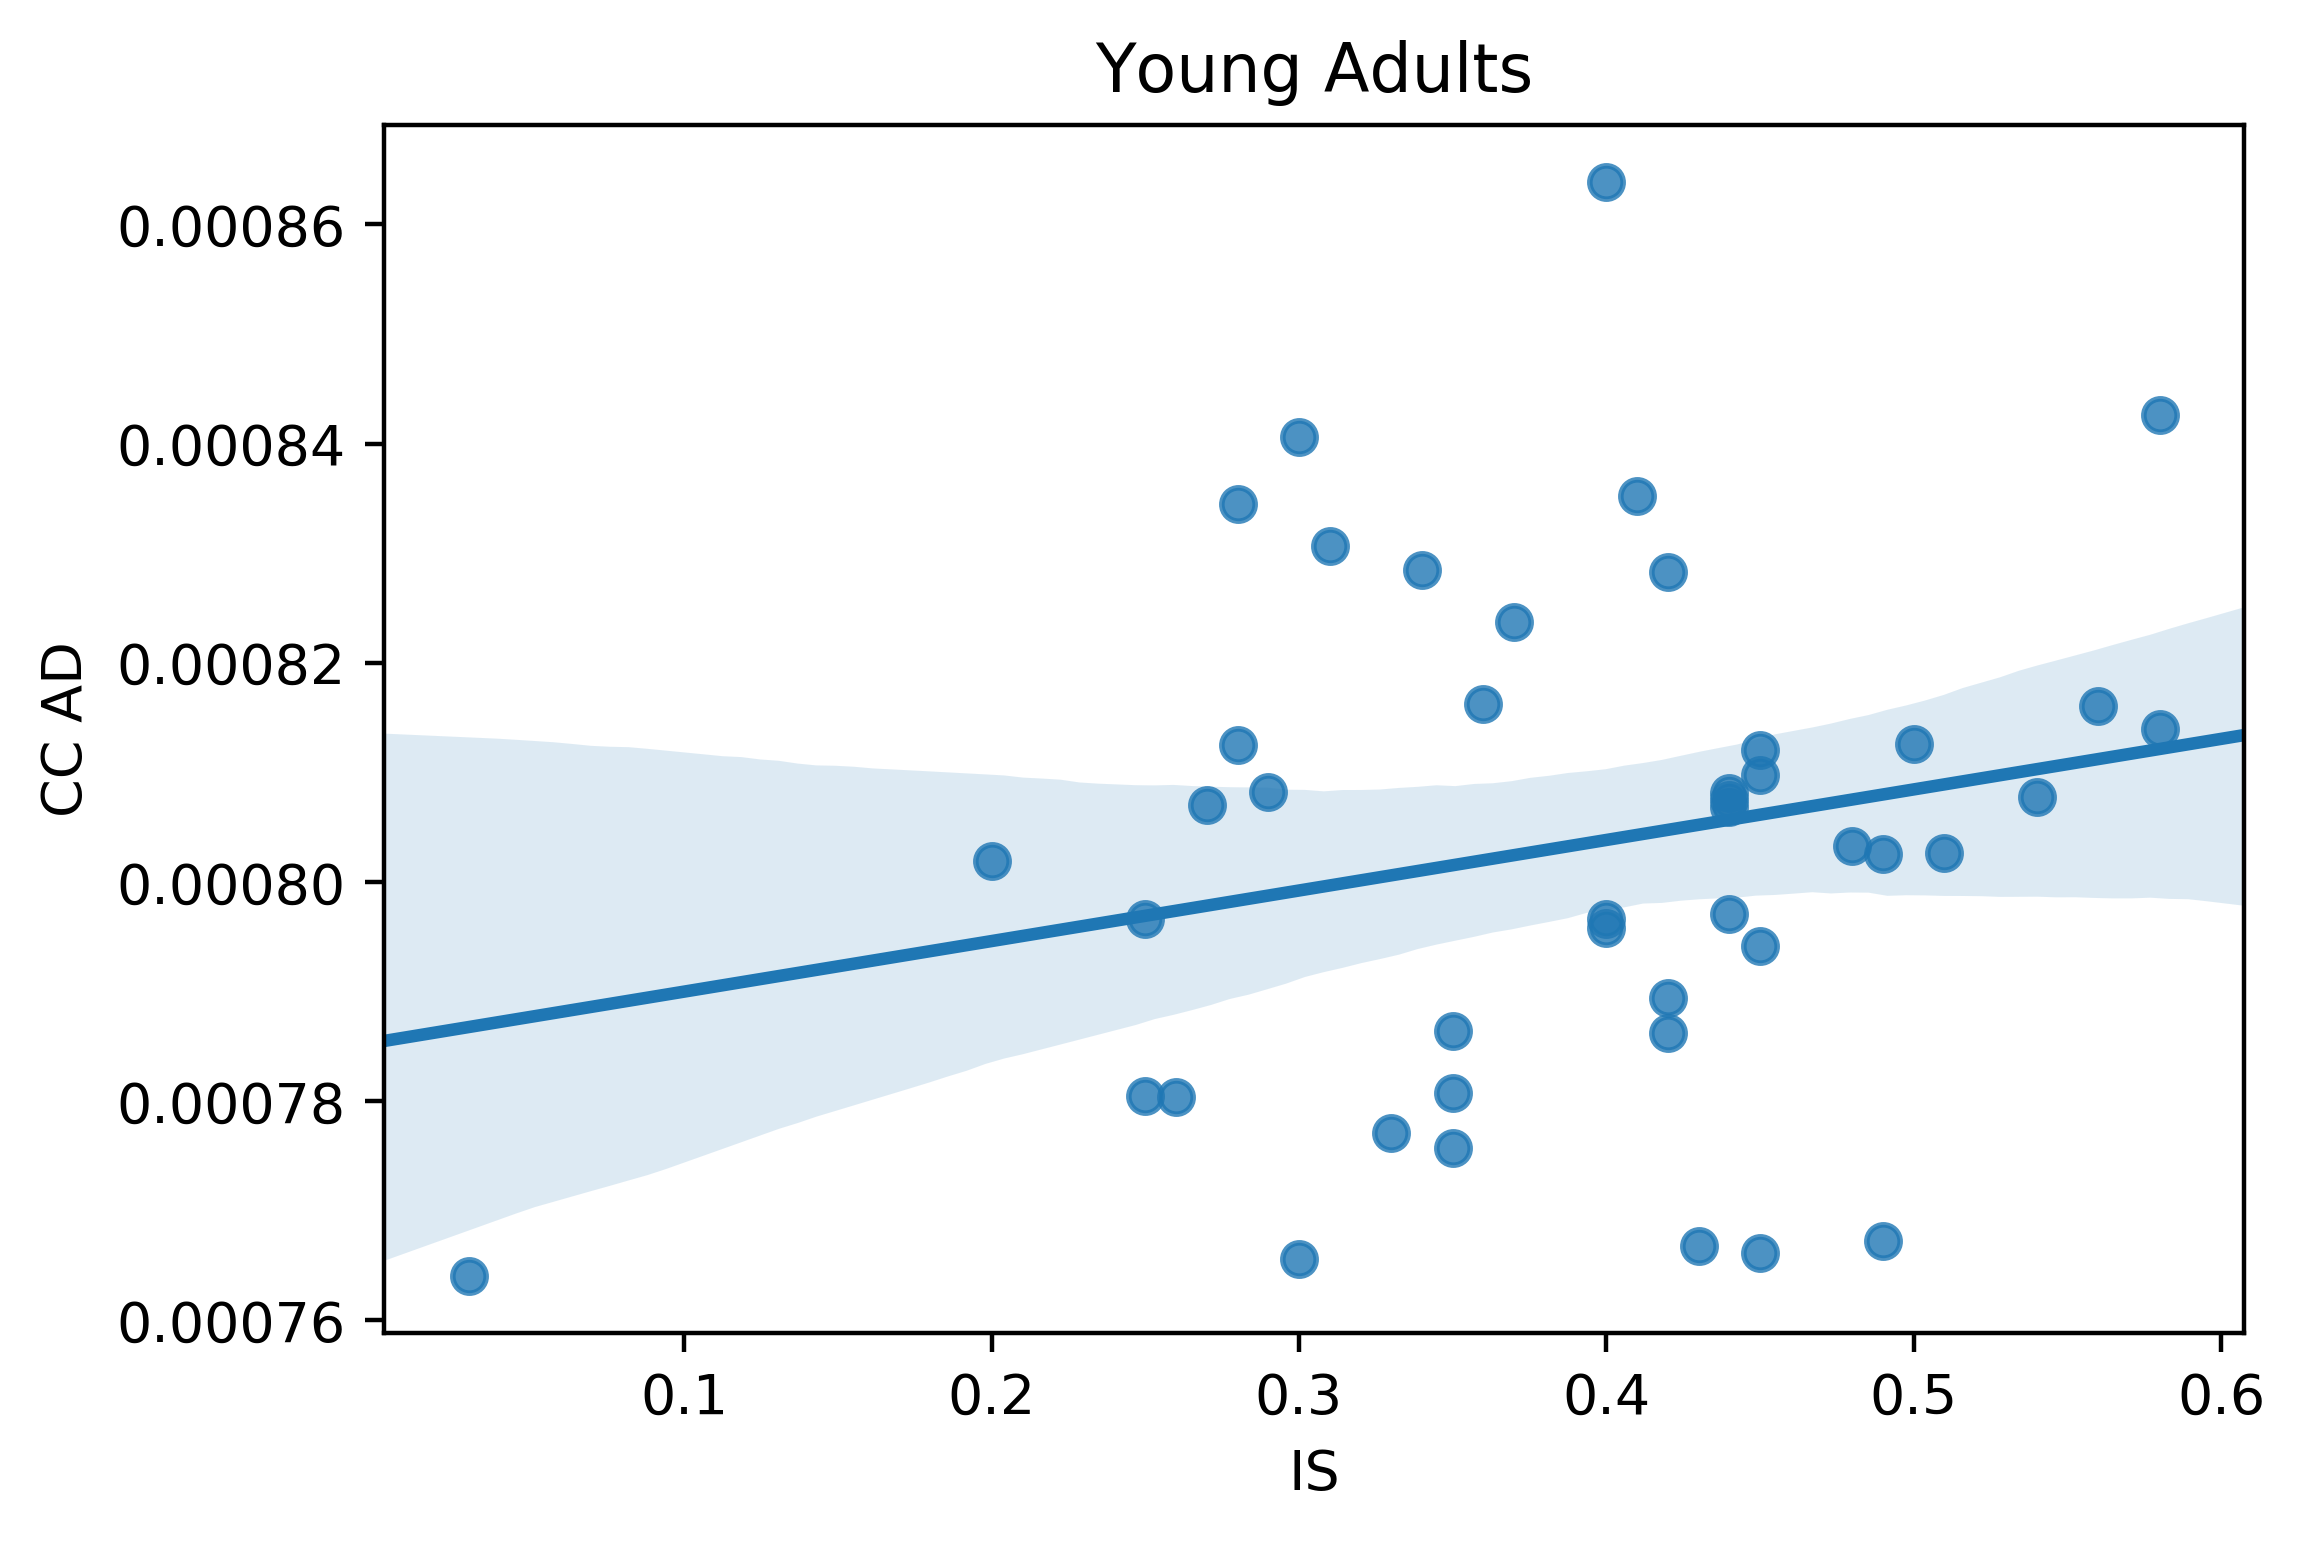

In [150]:
plt.subplots(dpi=400)
ax1 = sns.regplot(x="IS", y="CC_AD", data=ya_df).set(ylabel = 'CC AD', title= "Young Adults")


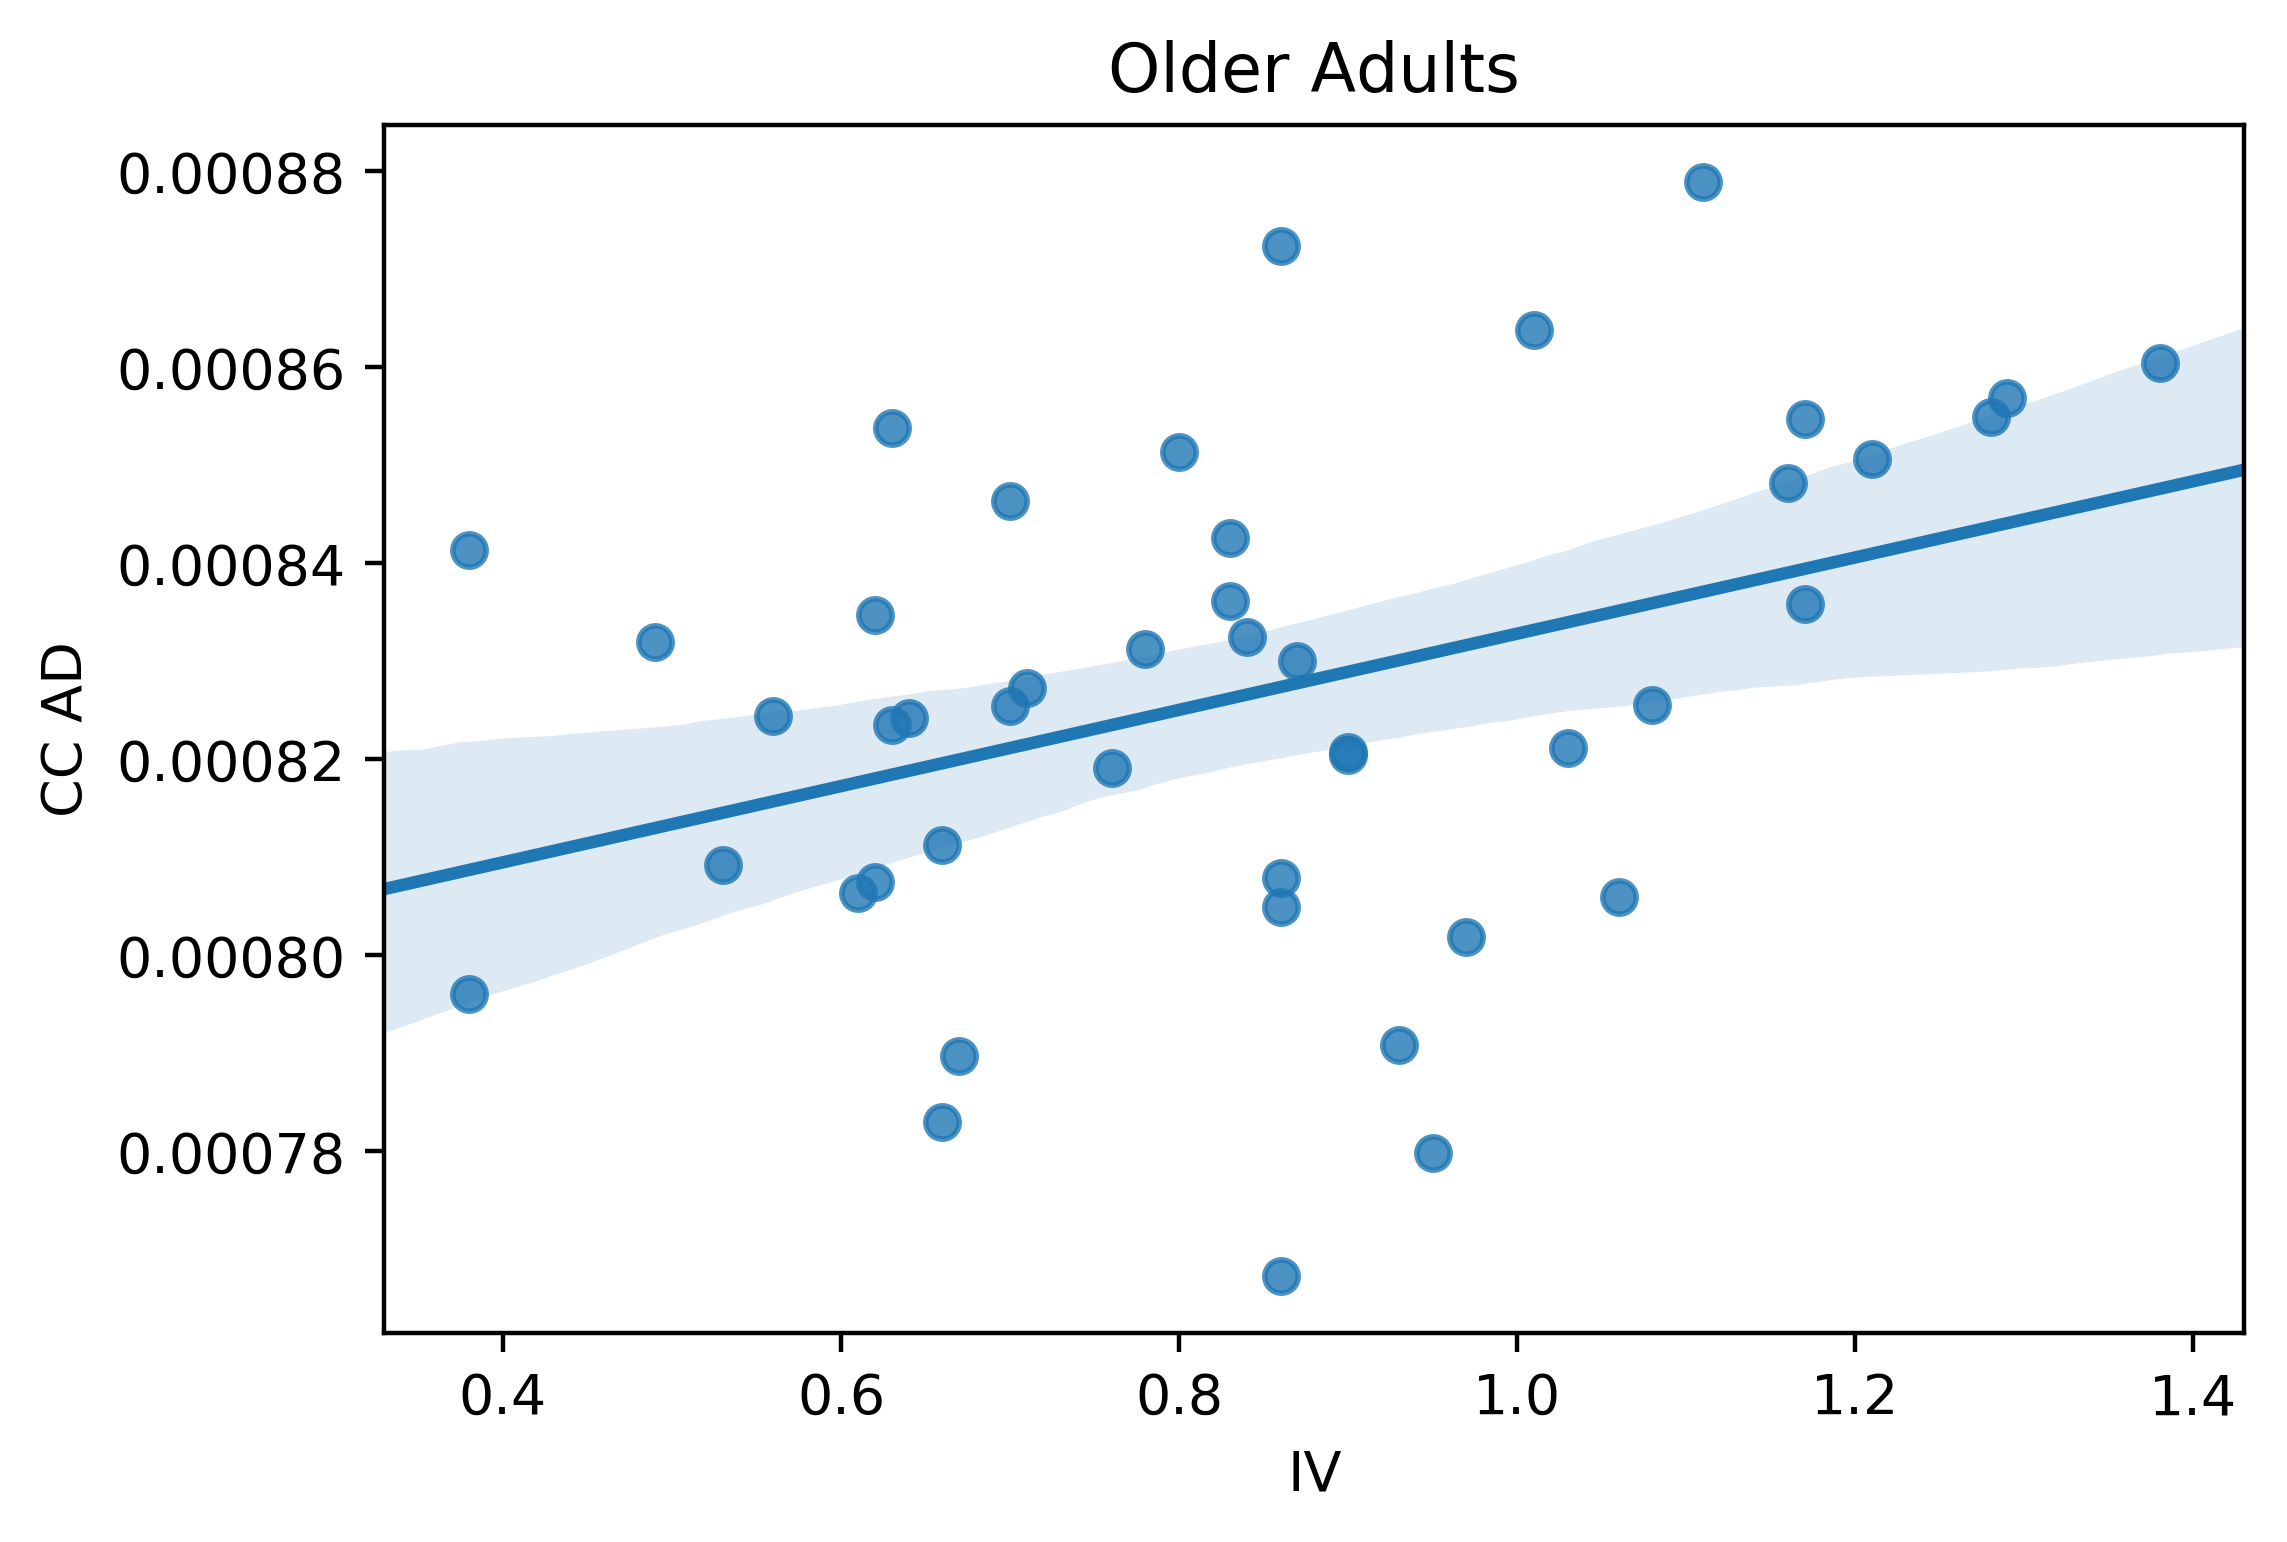

In [151]:
plt.subplots(dpi=400)
ax1 = sns.regplot(x="IV", y="CC_AD", data=oa_df).set(ylabel = 'CC AD', title = 'Older Adults')


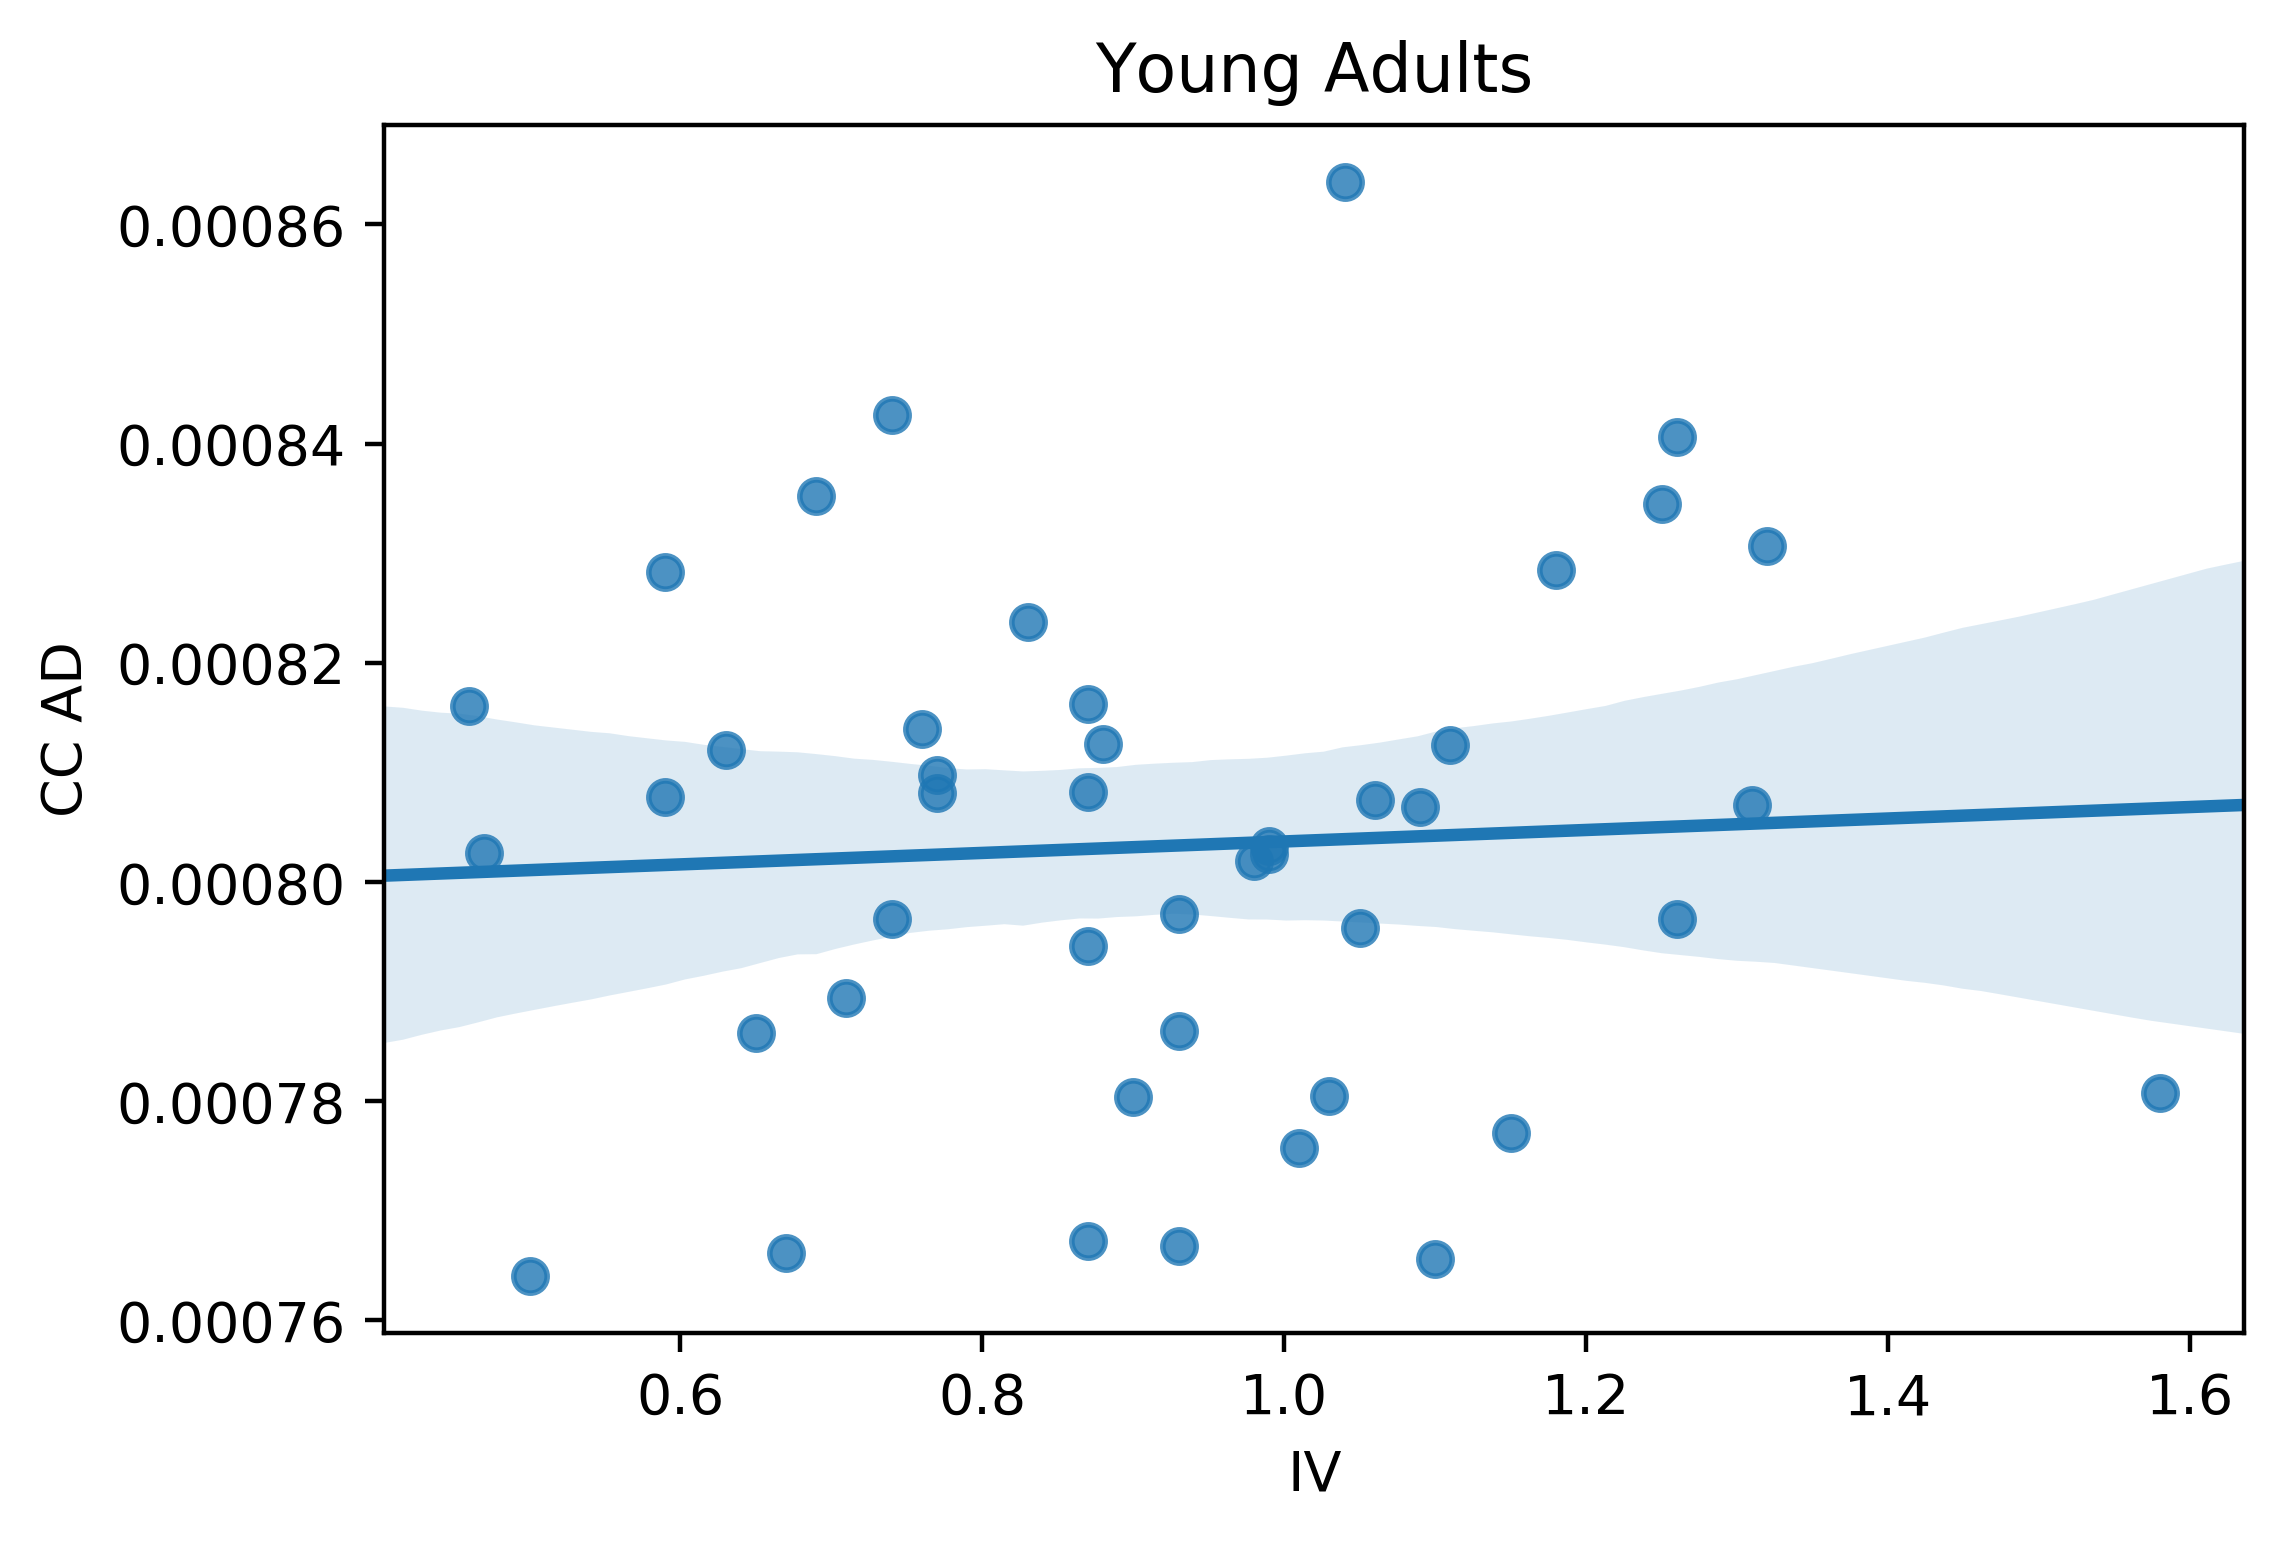

In [152]:
plt.subplots(dpi=400)
ax1 = sns.regplot(x="IV", y="CC_AD", data=ya_df).set(ylabel = 'CC AD', title = 'Young Adults')


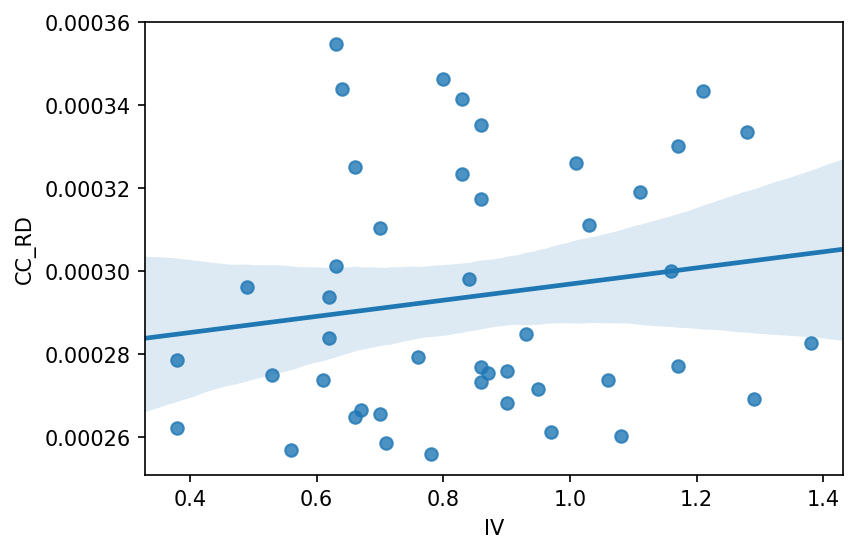

In [193]:
plt.subplots(dpi=150)
ax1 = sns.regplot(x="IV", y="CC_RD", data=oa_df)

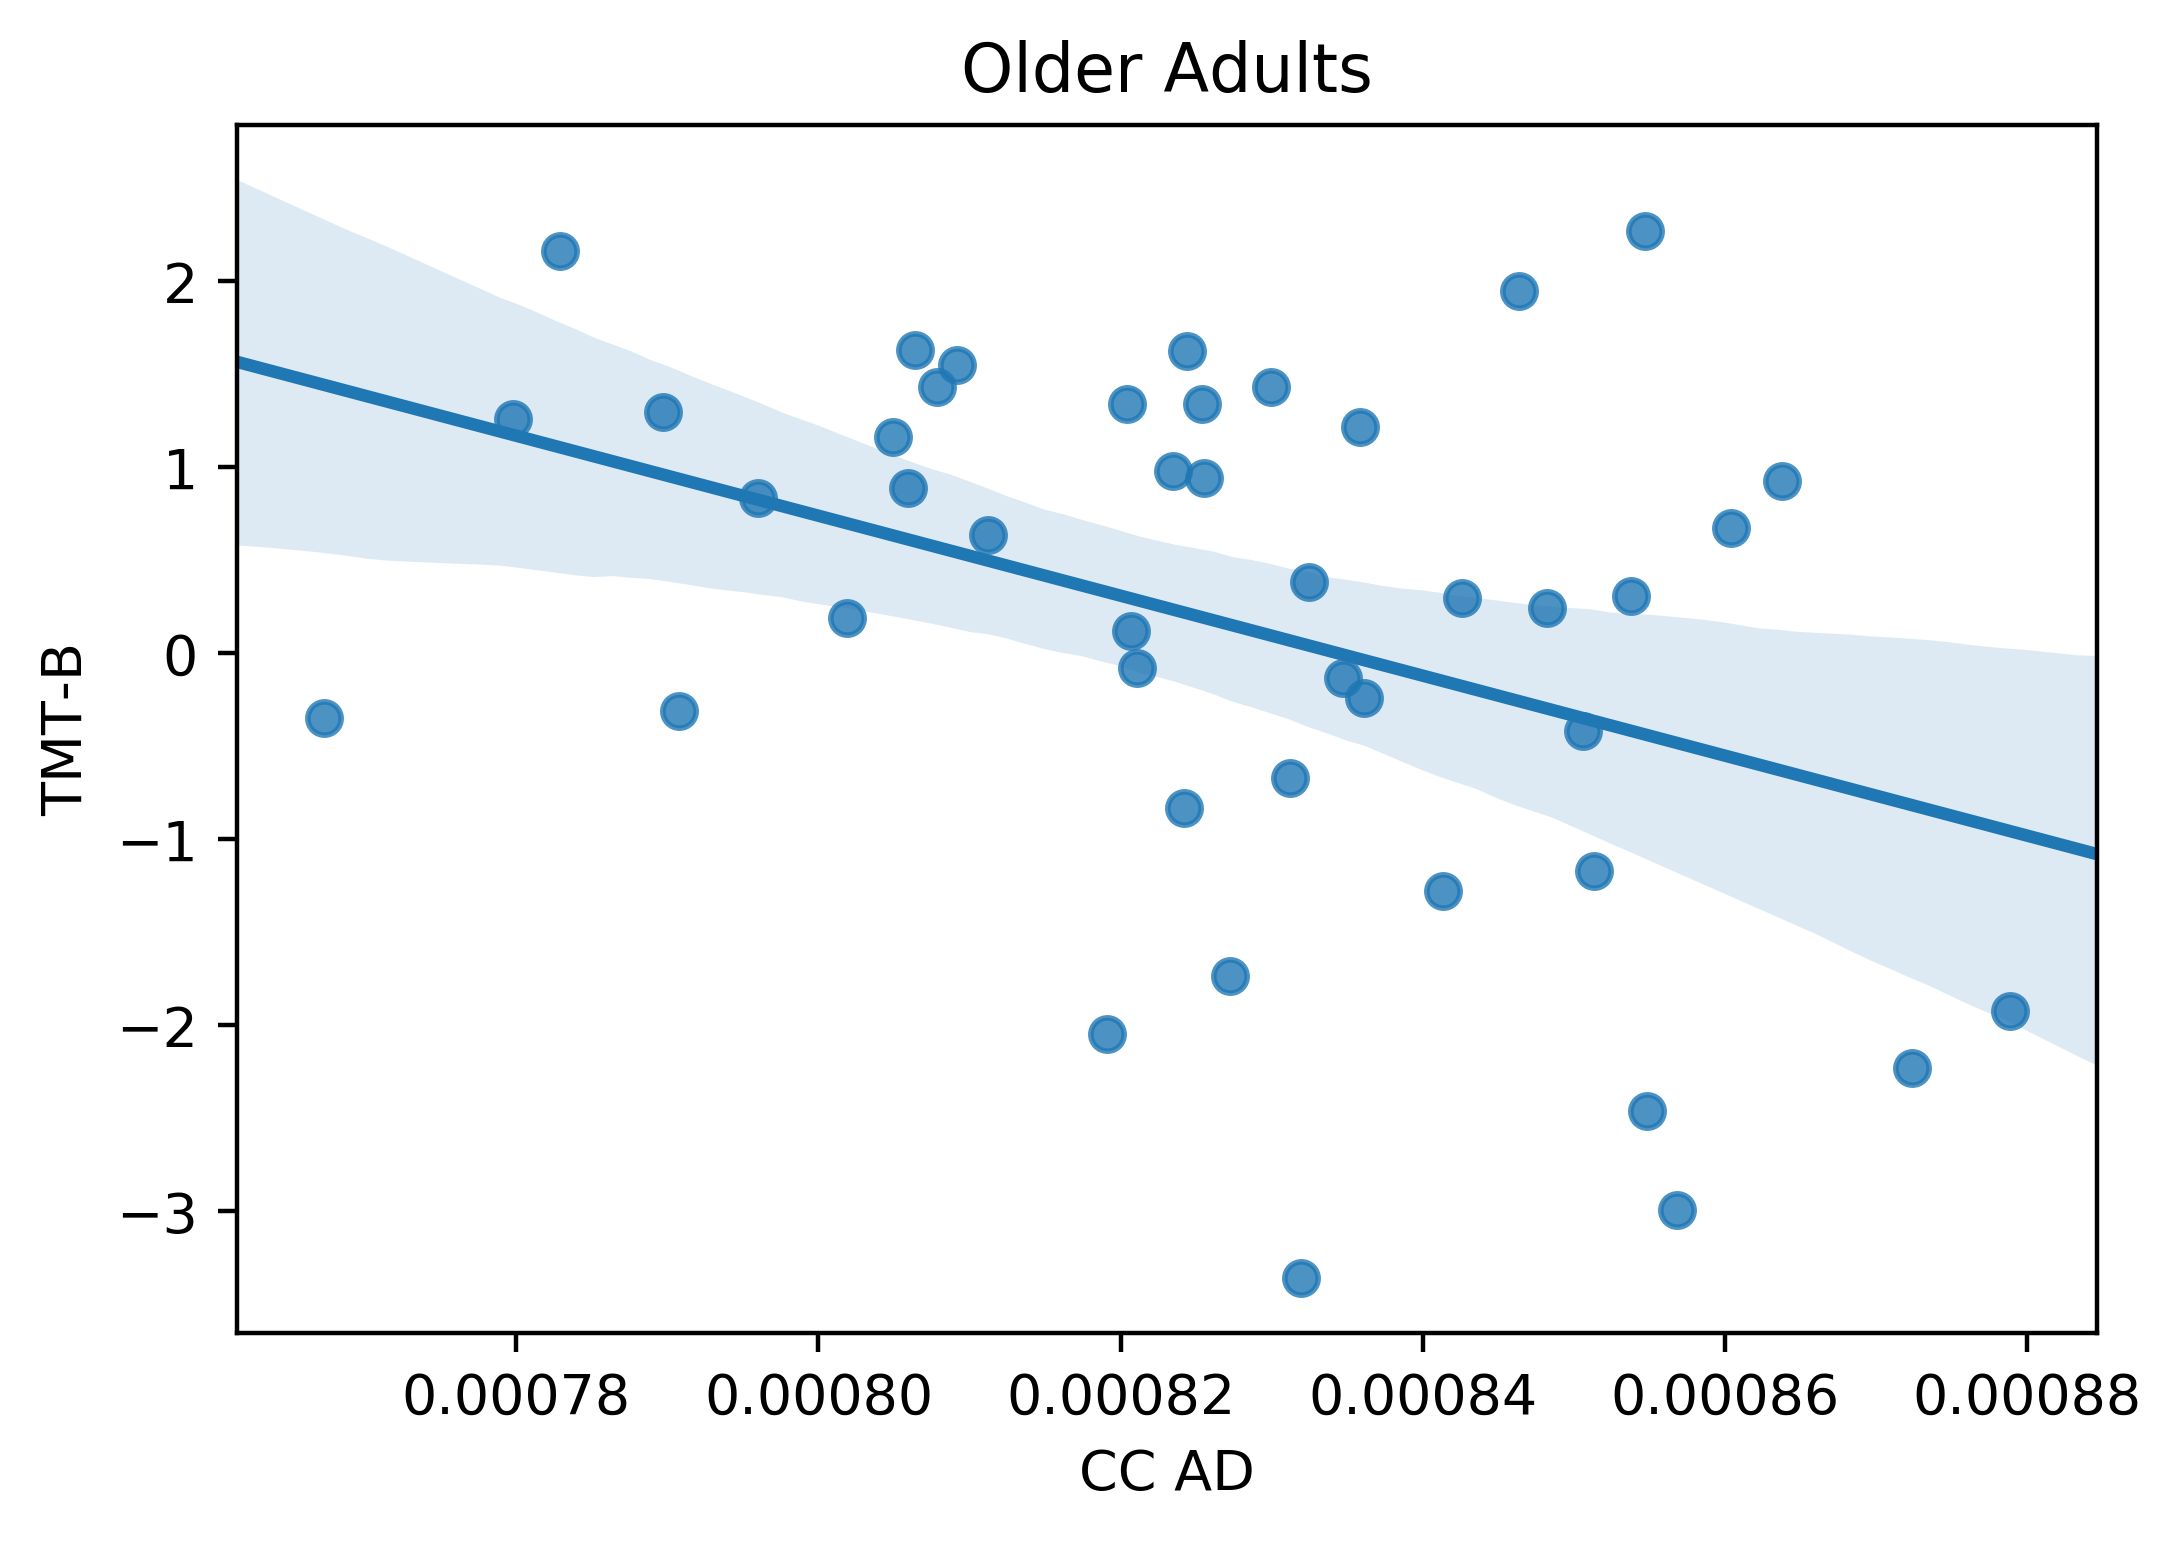

In [154]:
plt.subplots(dpi=150)
ax1 = sns.regplot(x="CC_AD", y="trails_b_z_score", data=oa_df)

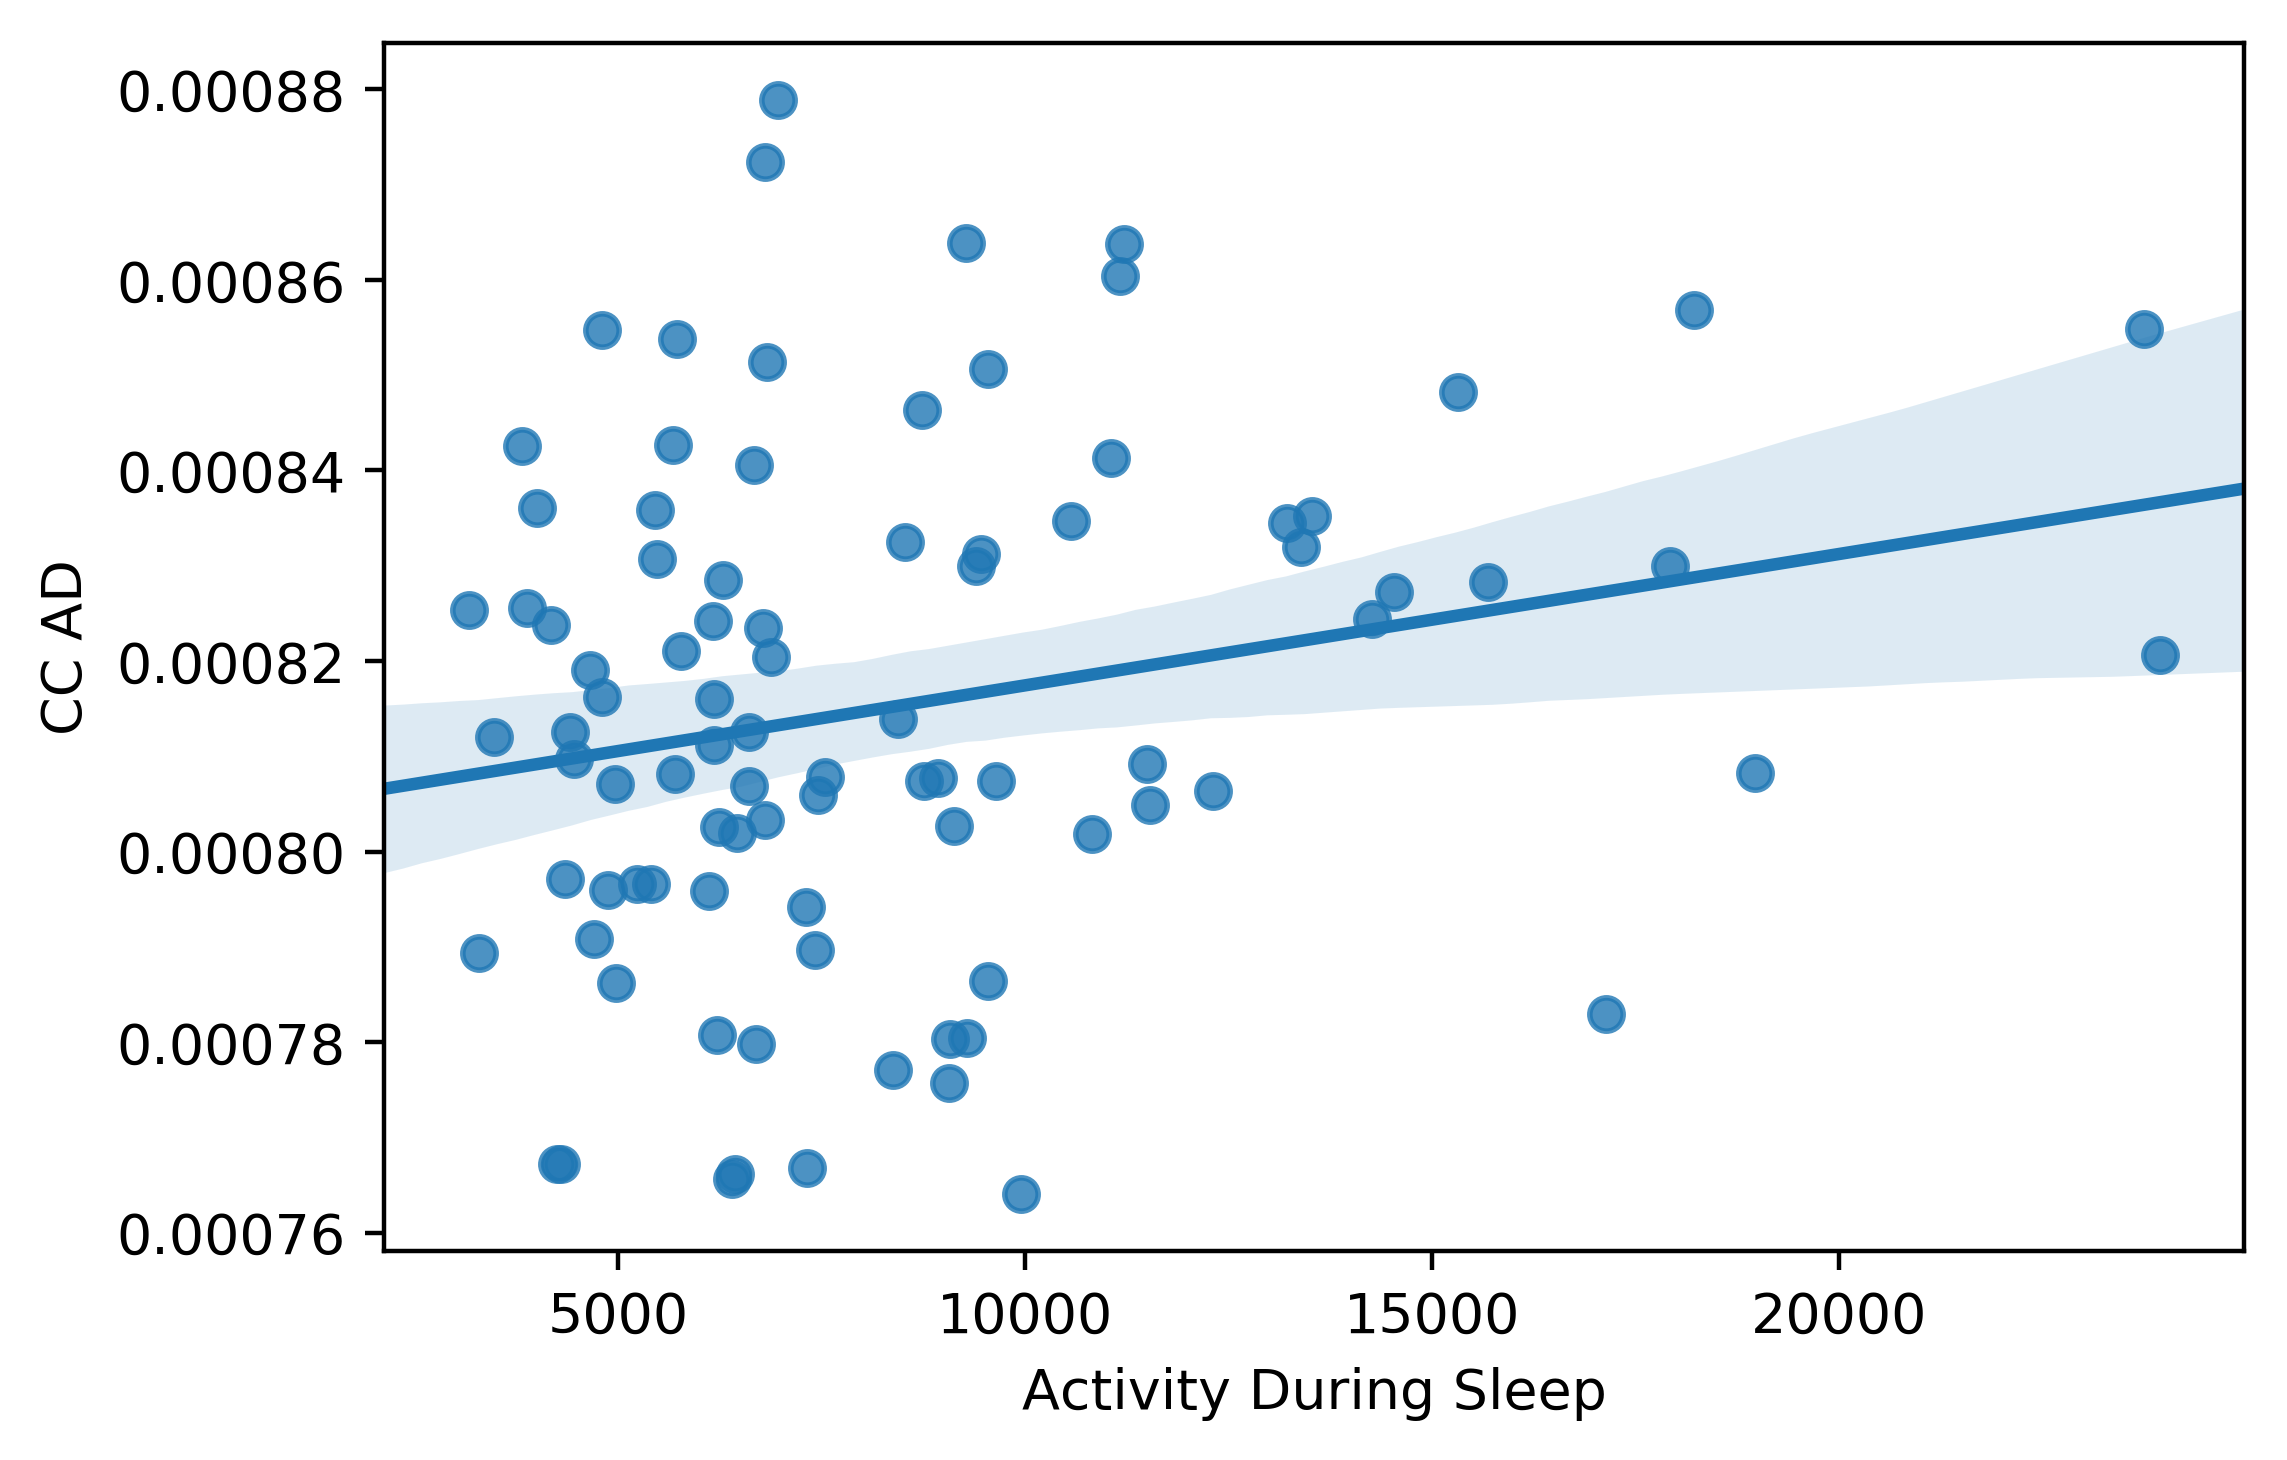

In [185]:
plt.subplots(dpi=400)
ax1 = sns.regplot(x="total_ac.sleep", y="CC_AD", data=df).set(xlabel= 'Activity During Sleep', ylabel = 'CC AD')


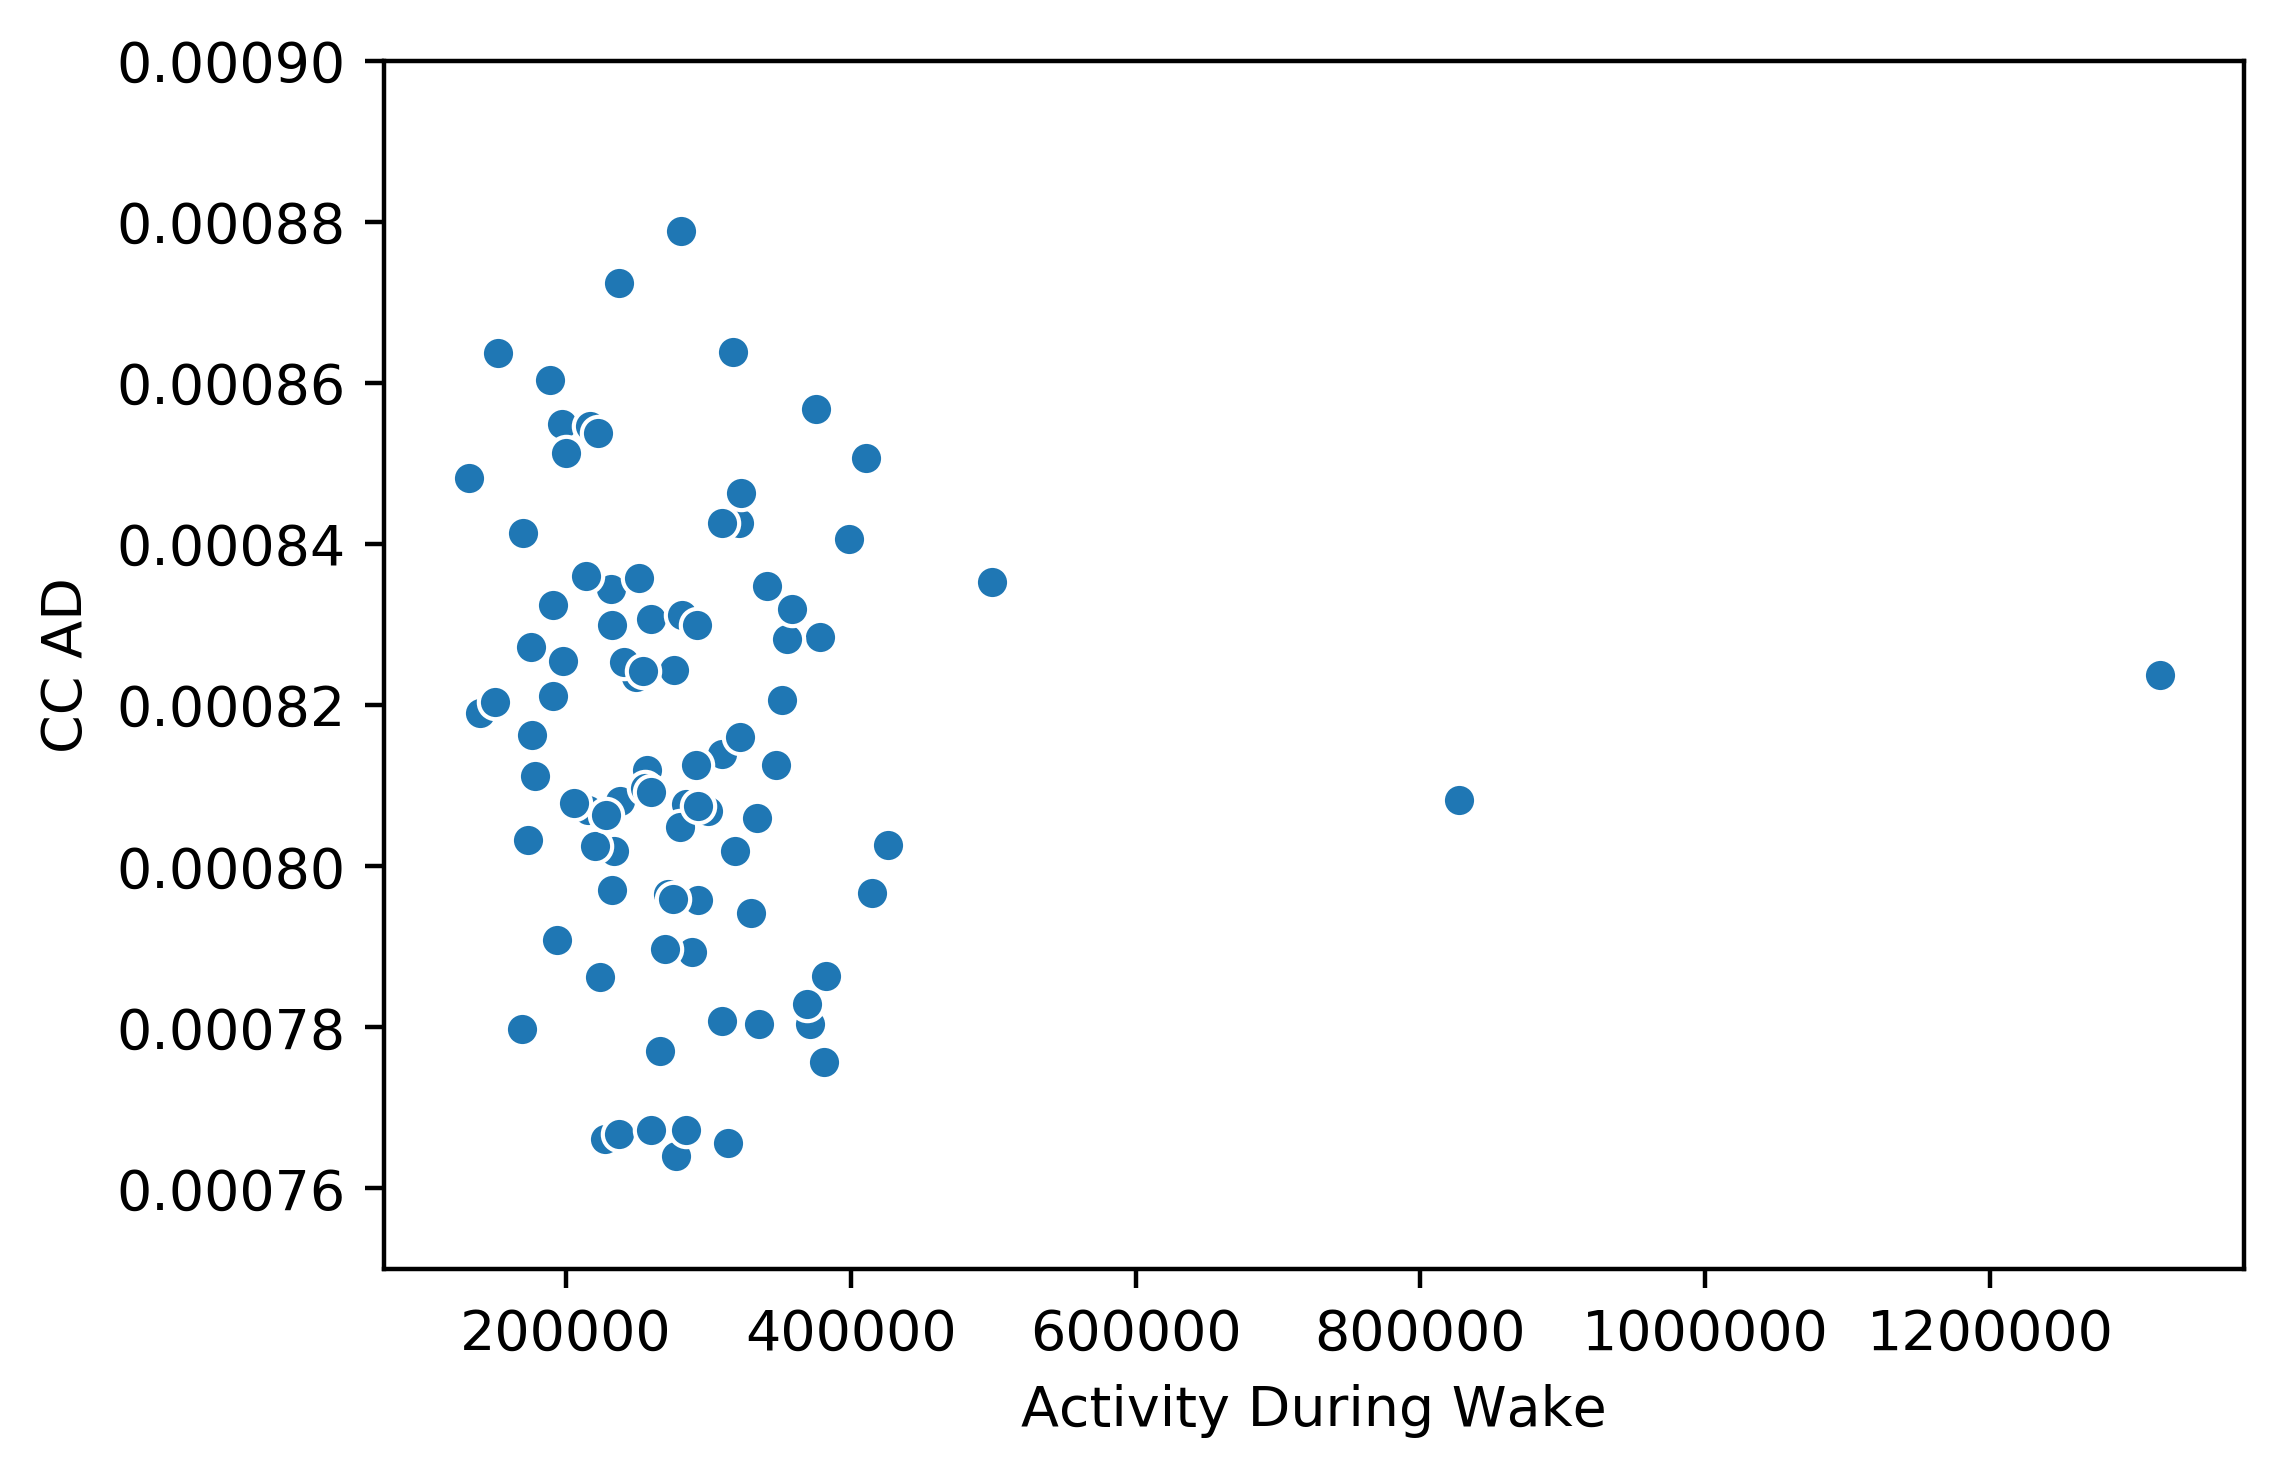

In [195]:
plt.subplots(dpi=400)
ax1 = sns.scatterplot(x="total_ac.active", y="CC_AD", data=df).set(xlabel= 'Activity During Wake', ylabel = 'CC AD', ylim=[0.00075,0.0009])


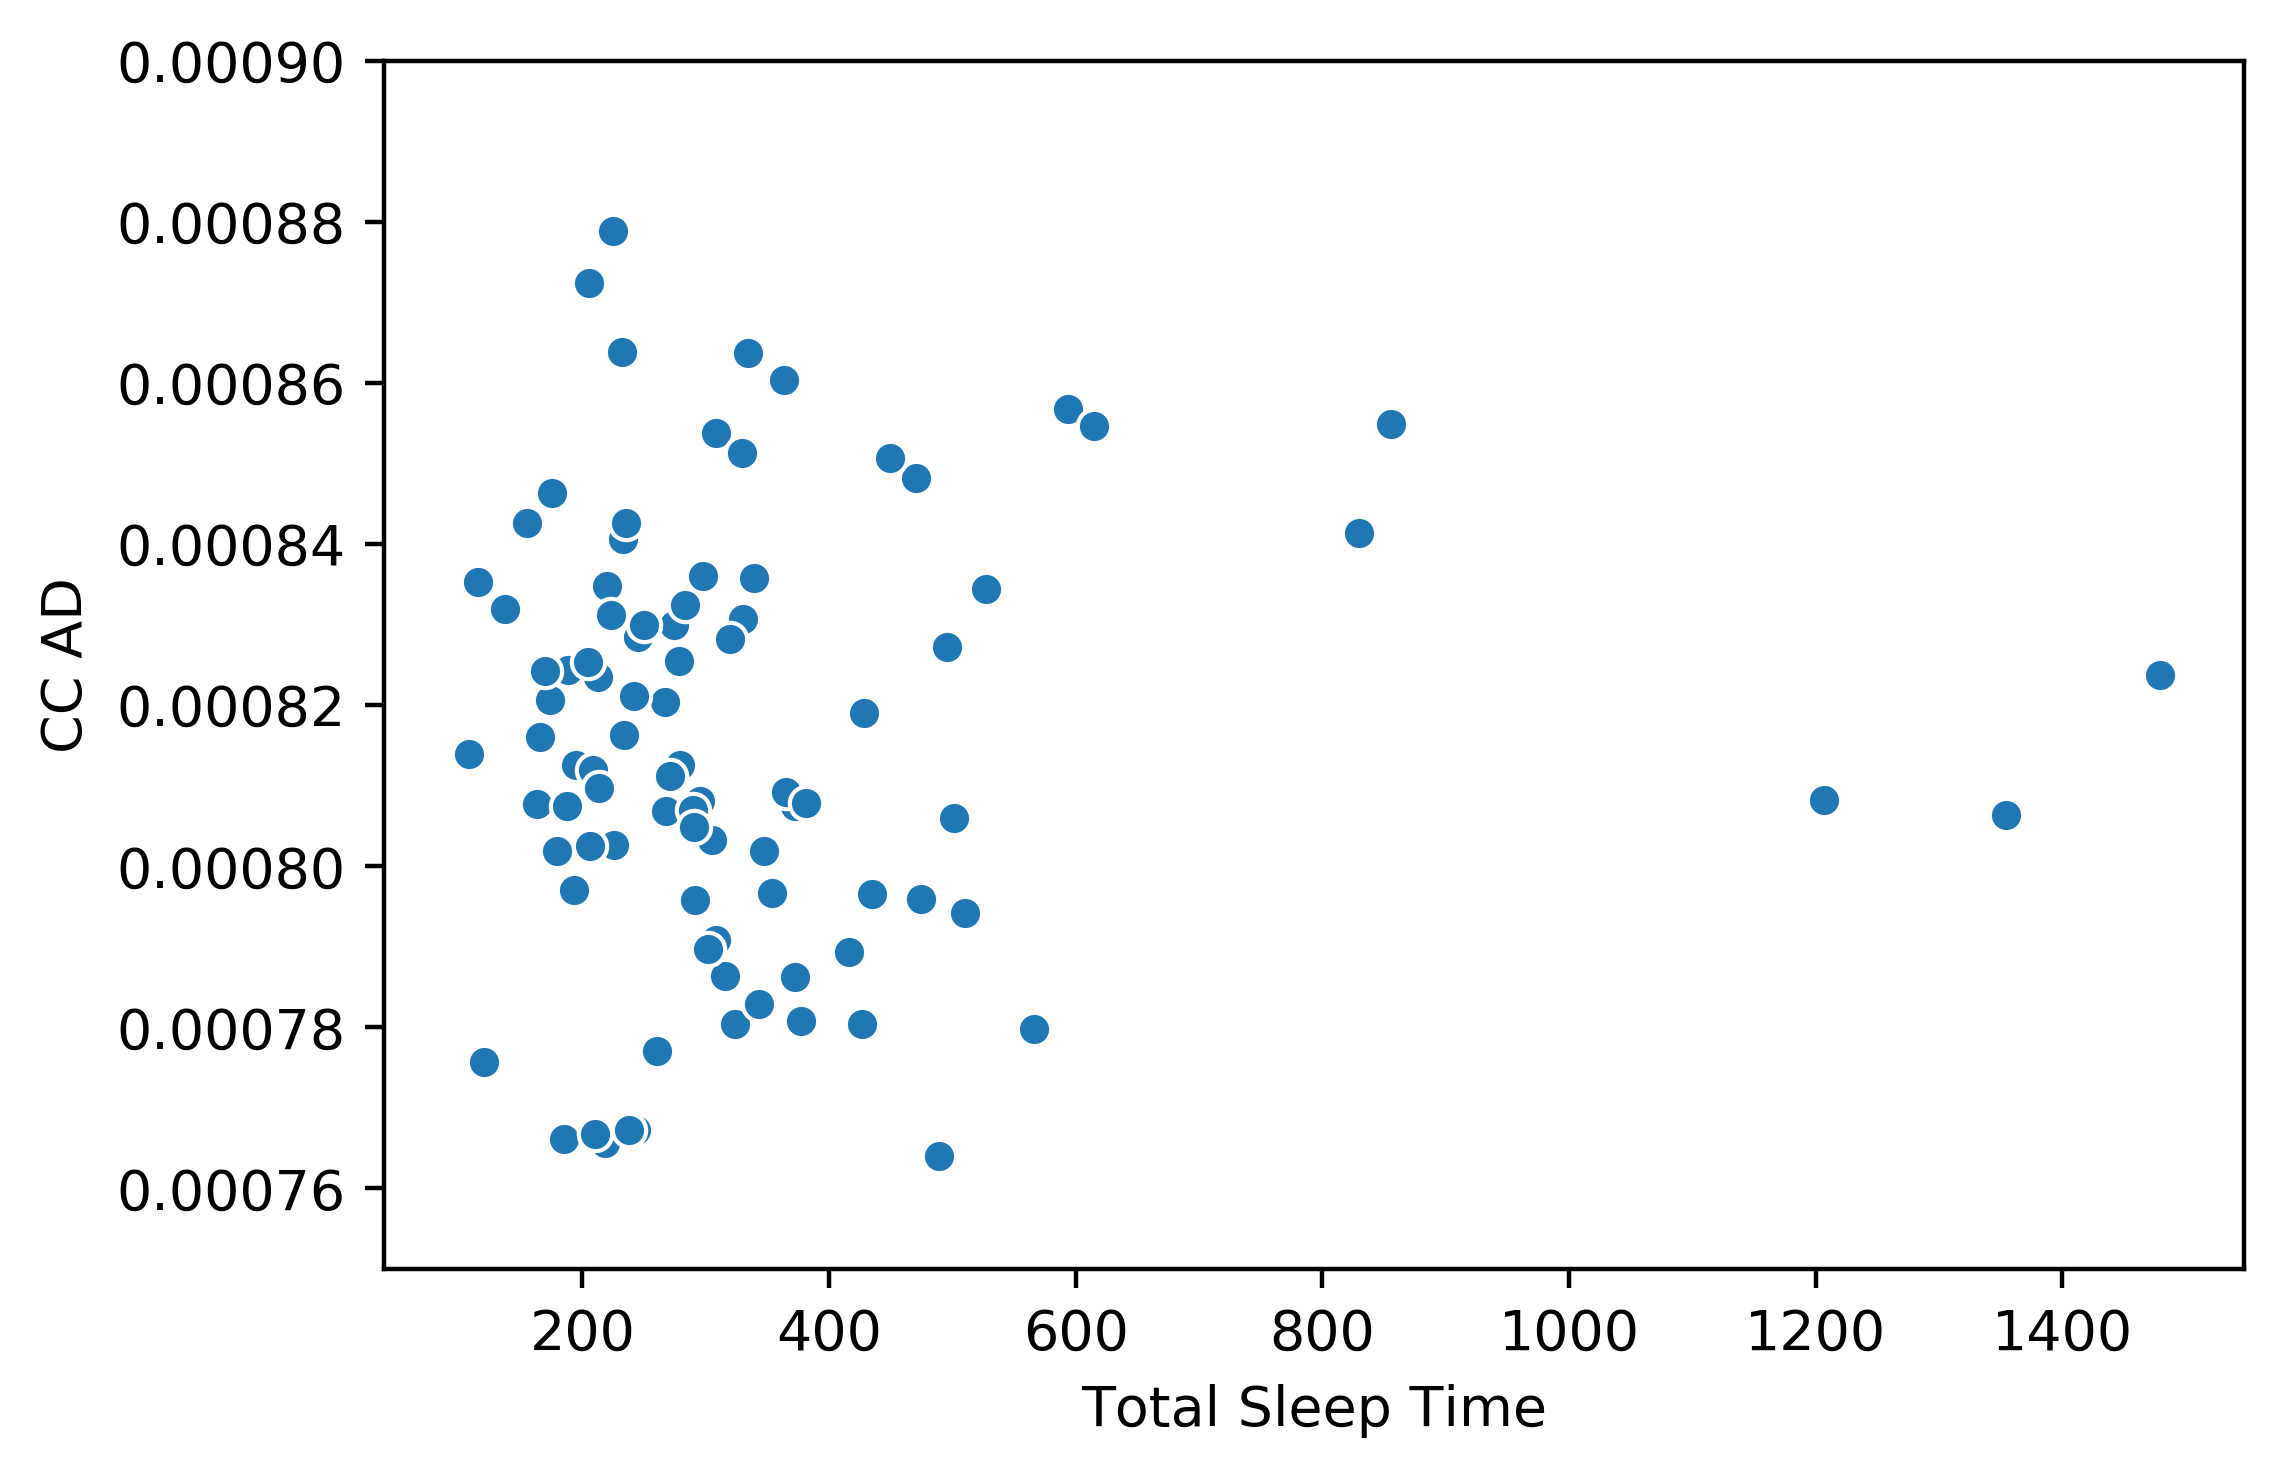

In [193]:
plt.subplots(dpi=400)
ax1 = sns.scatterplot(x="sleep_time", y="CC_AD", data=df).set(xlabel= 'Total Sleep Time', ylabel = 'CC AD', ylim=[0.00075,0.0009])


In [175]:
oa_df.describe()

CC_FA      CC_MD      CC_AD      CC_RD     record_id        age  \
count  46.000000  46.000000  46.000000  46.000000     46.000000  46.000000   
mean    0.546356   0.000472   0.000827   0.000294  40655.021739  68.760870   
std     0.030606   0.000025   0.000025   0.000029    148.386805   5.716194   
min     0.487322   0.000438   0.000767   0.000256  40170.000000  60.000000   
25%     0.526928   0.000452   0.000808   0.000272  40573.250000  64.000000   
50%     0.550019   0.000464   0.000826   0.000283  40664.500000  69.000000   
75%     0.567082   0.000492   0.000845   0.000319  40772.000000  71.000000   
max     0.590859   0.000521   0.000879   0.000355  40878.000000  81.000000   

       years_educ         IS         IV         RA        ...          \
count   46.000000  45.000000  45.000000  45.000000        ...           
mean    17.532609   0.491778   0.843111   0.858889        ...           
std      2.725196   0.123441   0.242841   0.102829        ...           
min     12.000000   0.250000   0.380000   0.430000        ...           
25%     16.000000   0.410000   0.660000   0.830000        ...           
50%     16.500000   0.510000   0.840000   0.870000        ...           
75%     18.875000   0.550000   1.010000   0.930000        ...           
max     25.000000   0.790000   1.380000   0.970000        ...           

       cvlt_recognition_fp_zscore  cvlt_zscore  vc_zscore  ds_zscore  \
count                   44.000000    44.000000  44.000000  44.000000   
mean                    -0.056818     0.199026   1.265682   0.408409   
std                      0.965786     0.743575   1.033710   1.072912   
min                     -1.000000    -1.300000  -1.670000  -2.000000   
25%                     -1.000000    -0.225000   0.917500  -0.330000   
50%                     -0.250000     0.278571   1.500000   0.330000   
75%                      0.500000     0.700000   2.000000   1.330000   
max                      3.000000     1.900000   2.670000   2.670000   

       stoop_i_zscore  cowat_zscore  trails_a_z_score  trails_b_z_score  \
count       44.000000     44.000000         44.000000         44.000000   
mean         0.538636      0.285431          0.454540          0.157065   
std          0.636932      1.002651          1.351329          1.416315   
min         -1.100000     -1.487603         -3.833333         -3.357719   
25%          0.200000     -0.578512         -0.036615         -0.479592   
50%          0.450000      0.165289          0.766507          0.345765   
75%          0.800000      1.012397          1.273824          1.269415   
max          2.200000      2.231405          2.218236          2.268528   

       time_trails_b  ds_backward_score  
count      44.000000          44.000000  
mean       74.886364           9.136364  
std        31.661888           2.783597  
min        43.000000           4.000000  
25%        54.750000           7.000000  
50%        68.500000           9.000000  
75%        79.250000          11.000000  
max       220.000000          15.000000  

[8 rows x 58 columns]

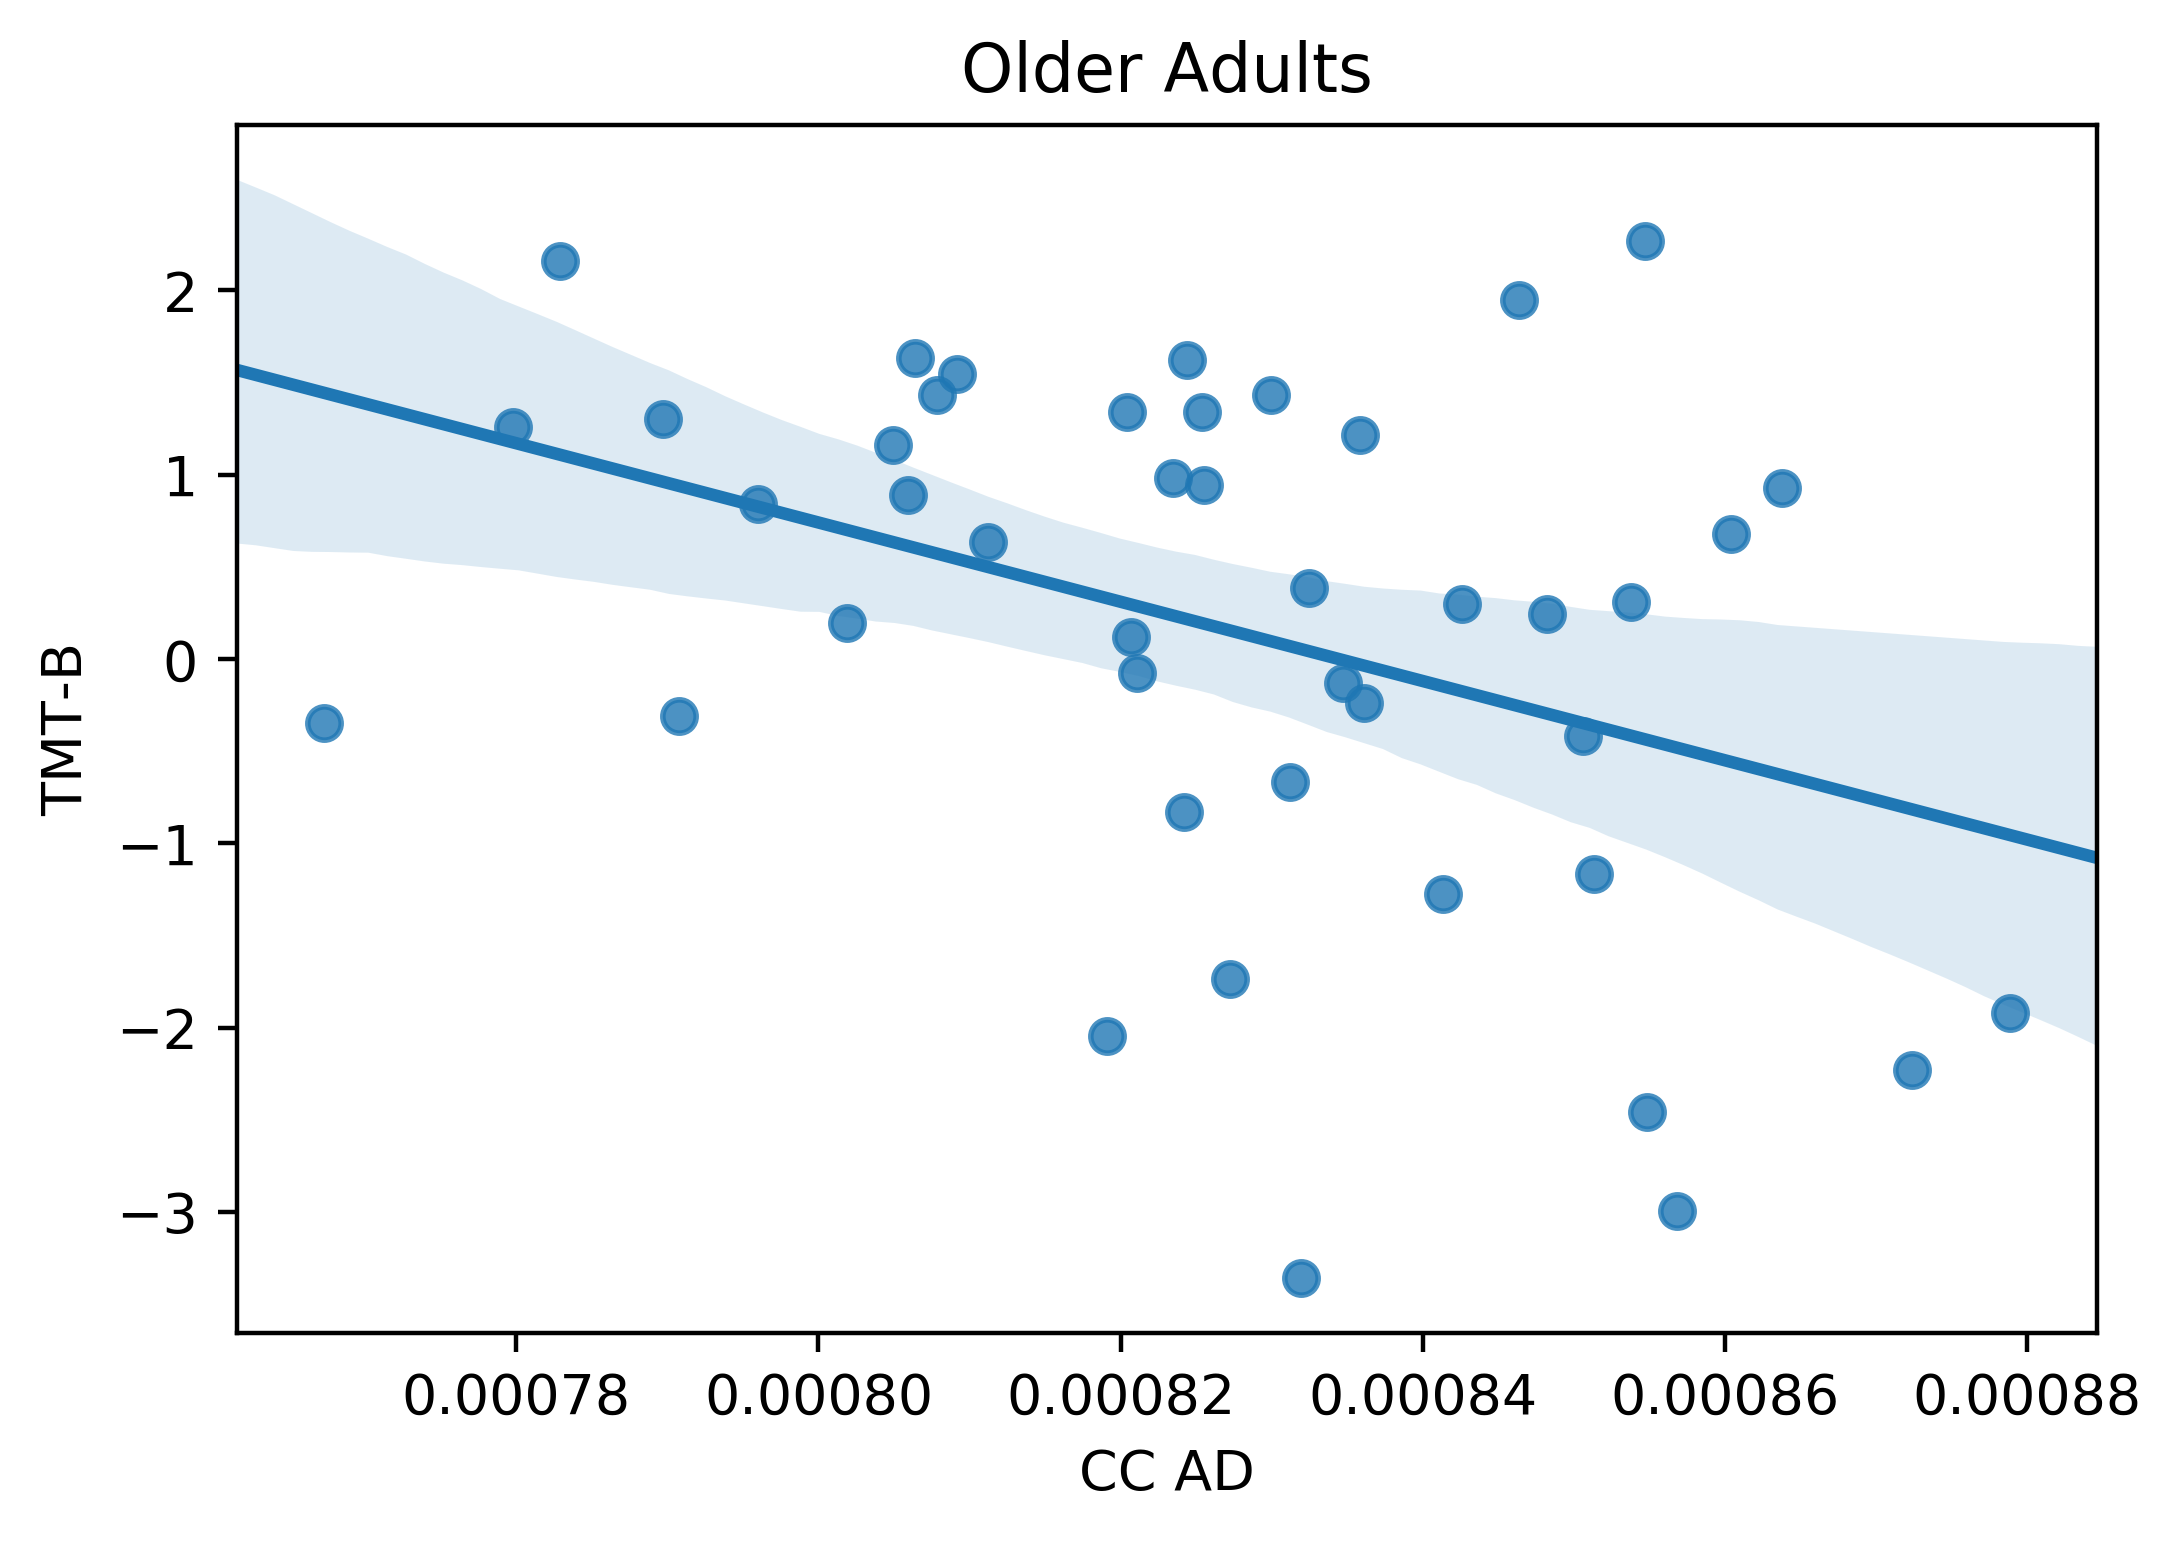

In [196]:
plt.subplots(dpi=400)
ax1 = sns.regplot(x="CC_AD", y="trails_b_z_score", data=oa_df).set(xlabel='CC AD', ylabel='TMT-B', title='Older Adults')


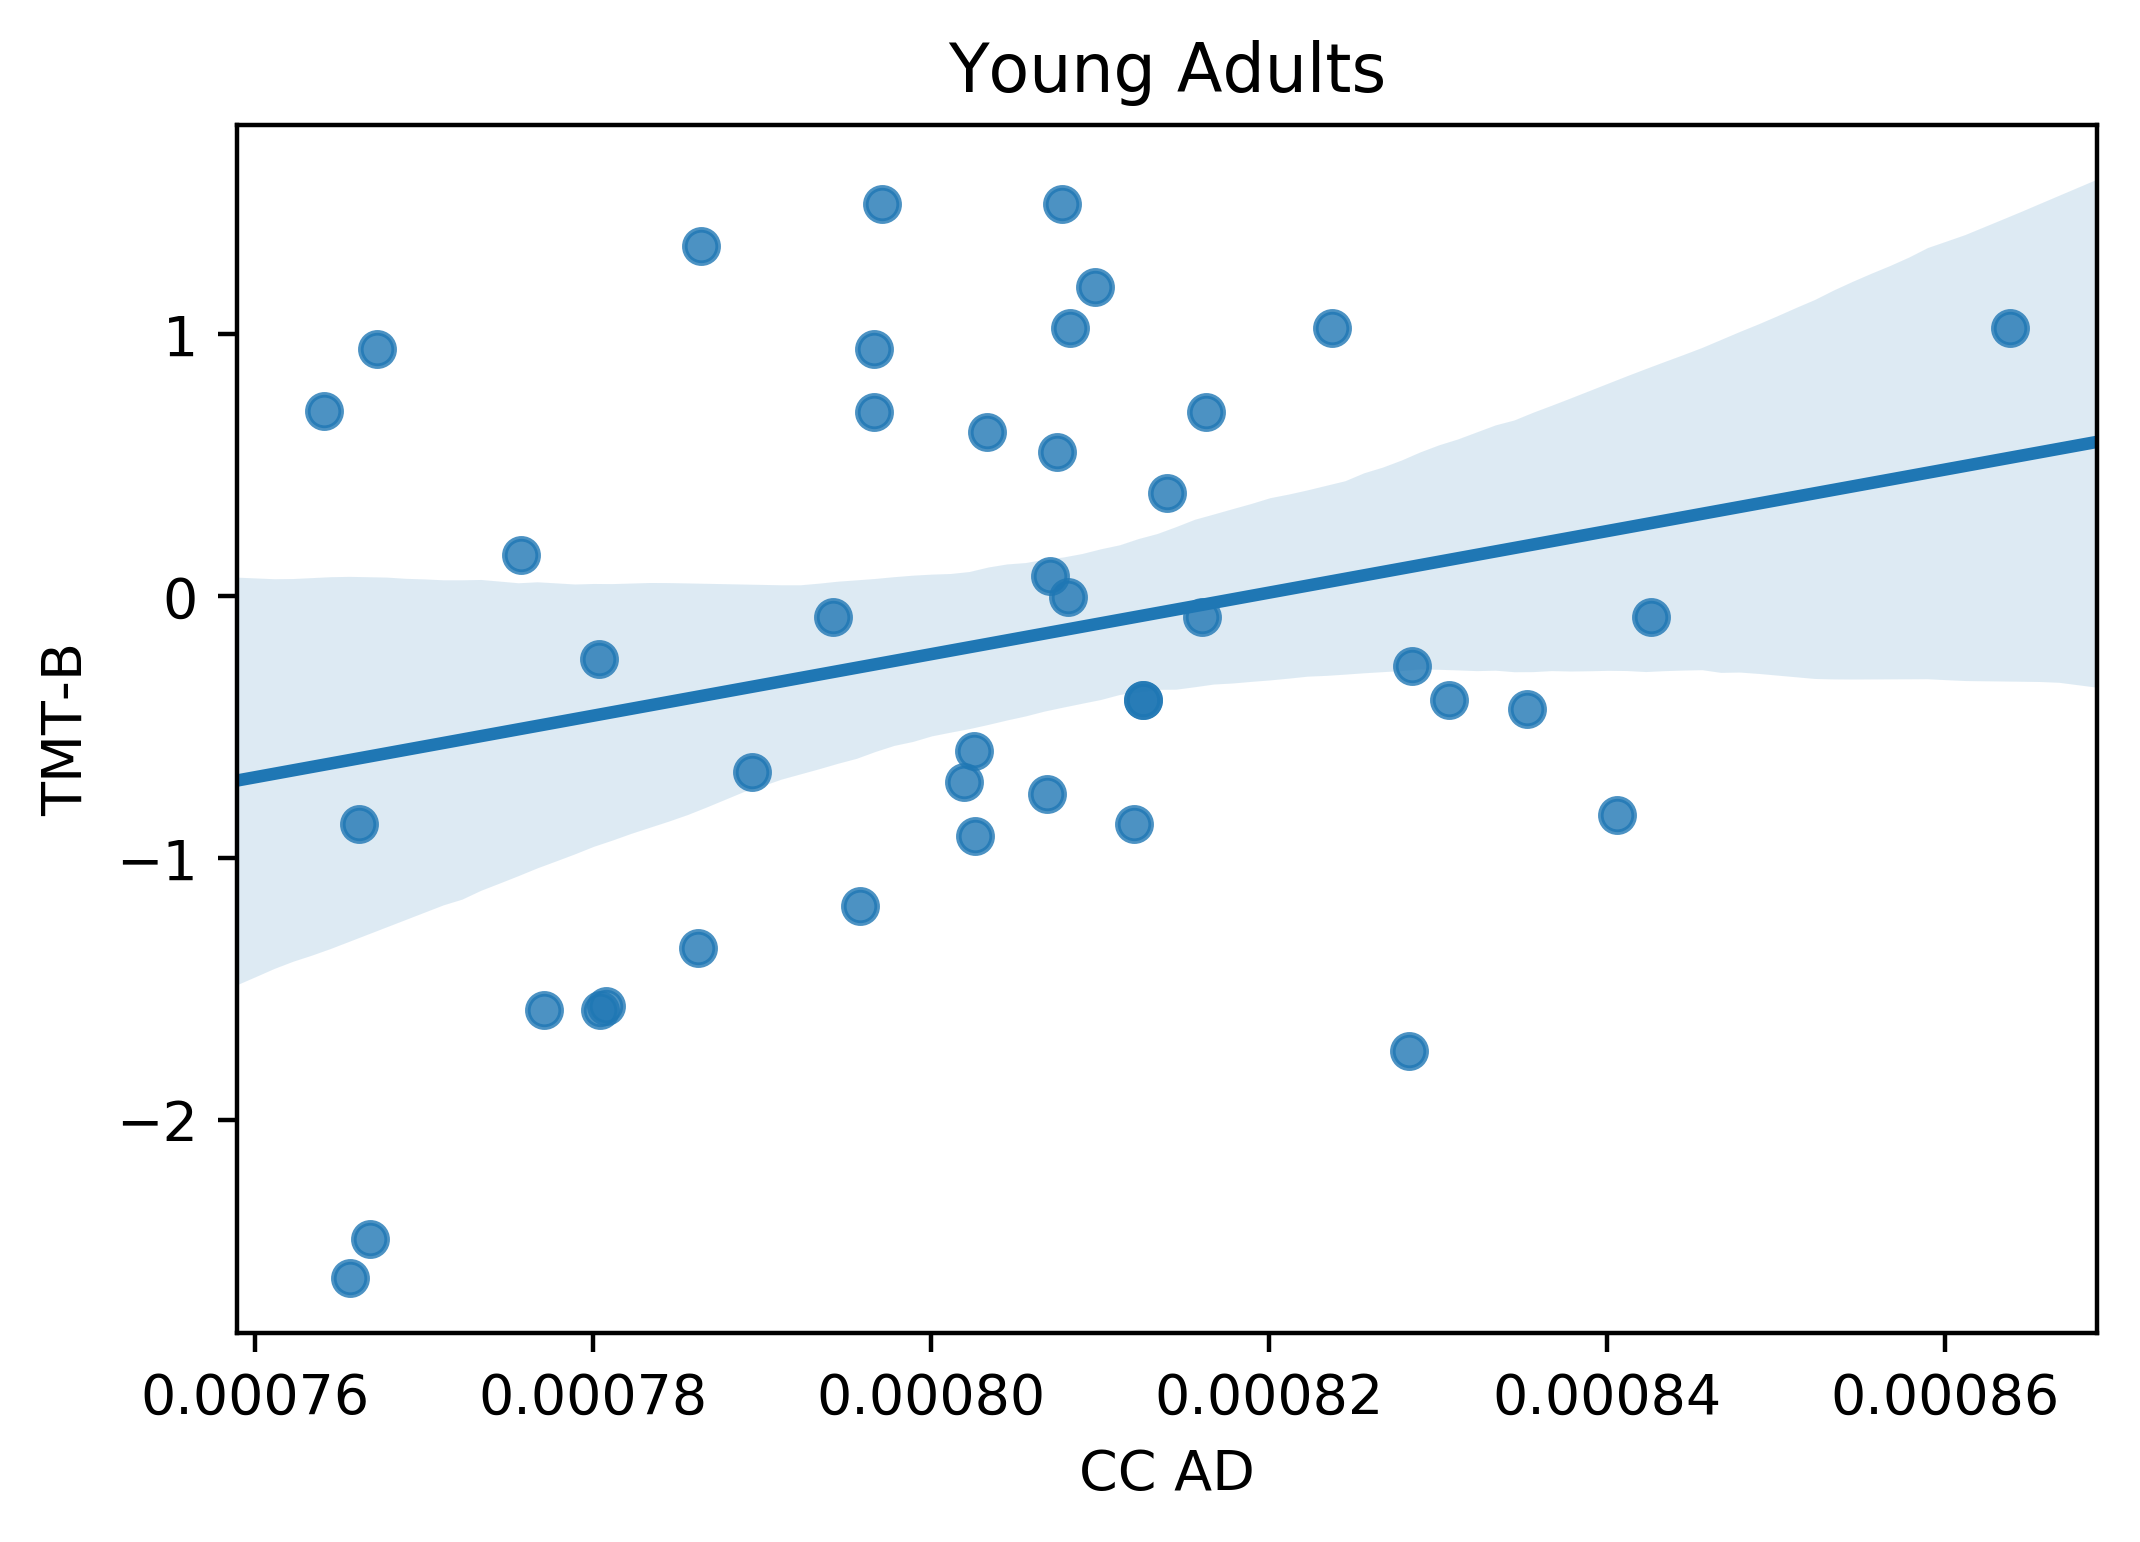

In [160]:
ya_df = ya_df[ya_df['trails_b_z_score'] > -3]
plt.subplots(dpi=400)
ax1 = sns.regplot(x="CC_AD", y="trails_b_z_score", data=ya_df).set(xlabel='CC AD', ylabel='TMT-B', title='Young Adults')


[Text(0, 0.5, 'CC AD'), Text(0.5, 0, 'Amplitude Quotient')]

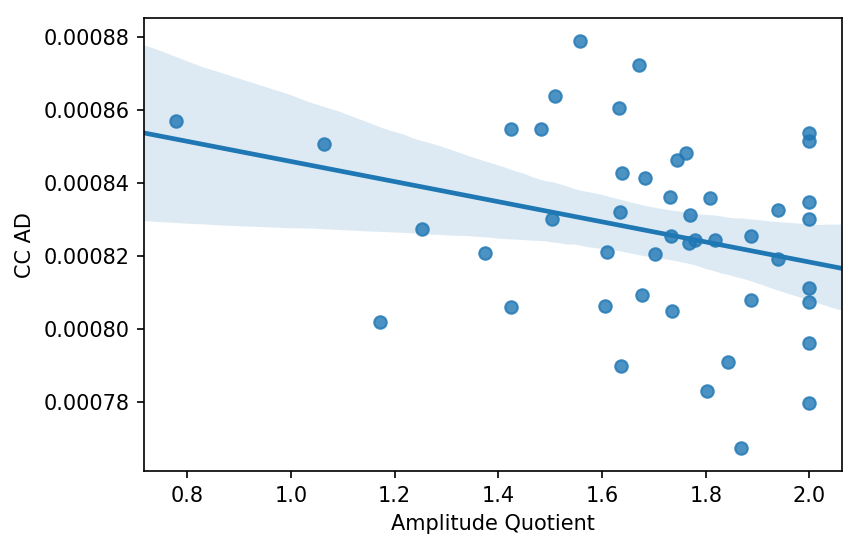

In [199]:
oa_df['actquot'] = oa_df['actamp']/oa_df['actmesor']

plt.subplots(dpi = 150)
ax = sns.regplot(x="actquot", y="CC_AD", data=oa_df)
ax.set(xlabel='Amplitude Quotient', ylabel='CC AD')

## TFCE

We're trying this with two design matrices, one with a column of ones to capture the group mean, and one without a column of ones. Missing values are imputed with the mean value, and then the values are demeaned.

Design matrix = \[ actalph-AVERAGE(actalph) \]
Design matrix = \[ actalph-AVERAGE(actalph) \]

Contrasts = \[0 1\], \[0,-1\]

Save contrasts to .txt file in tbss/stats directory

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

home_dir = '/Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives'
box_dir = '/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/Data/'

In [ ]:
oa_dsn = oa_df.drop(['files', 'record_id', 'CC_FA'], axis = 1)
oa_dsn.mean()

In [ ]:
oa_dsn.isnull().sum()

In [ ]:
oa_imp = oa_dsn.fillna(oa_dsn.mean())
oa_dem = oa_imp - oa_dsn.mean()
oa_dem[0:5]

In [ ]:
ya_dsn = ya_df.drop(['files', 'record_id', 'CC_FA'], axis = 1)
ya_dsn.mean()

In [ ]:
ya_dsn.isnull().sum()

In [ ]:
ya_imp = ya_dsn.fillna(ya_dsn.mean())
ya_dem = ya_imp - ya_dsn.mean()
ya_dem[0:5]

In [ ]:
np.savetxt(home_dir + '/tbss_oa/stats/design_IS_0218.txt', oa_dem['IS'].values, fmt = '%f')
np.savetxt(home_dir + '/tbss_oa/stats/design_IV_0218.txt', oa_dem['IV'].values, fmt = '%f')
np.savetxt(home_dir + '/tbss_oa/stats/design_RA_0218.txt', oa_dem['RA'].values, fmt = '%f')
np.savetxt(home_dir + '/tbss_oa/stats/design_alpha_0218.txt', oa_dem['actalph'].values, fmt = '%f')

In [ ]:
oa_dem['IS'].values

In [ ]:
np.stack([np.ones(oa_dem['IS'].size), oa_dem['IS']], axis = 1)[0:5]

In [ ]:
np.savetxt(home_dir + '/tbss_oa/stats/design_1IS_0218.txt', np.stack([np.ones(oa_dem['IS'].size), oa_dem['IS']], axis = 1), fmt = '%f')
np.savetxt(home_dir + '/tbss_oa/stats/design_1IV_0218.txt', np.stack([np.ones(oa_dem['IV'].size), oa_dem['IV']], axis = 1), fmt = '%f')
np.savetxt(home_dir + '/tbss_oa/stats/design_1RA_0218.txt', np.stack([np.ones(oa_dem['RA'].size), oa_dem['RA']], axis = 1), fmt = '%f')
np.savetxt(home_dir + '/tbss_oa/stats/design_1alpha_0218.txt', np.stack([np.ones(oa_dem['actalph'].size), oa_dem['actalph']], axis = 1), fmt = '%f')


In [ ]:
np.savetxt(home_dir + '/tbss_ya/stats/design_IS_0218.txt', ya_dem['IS'].values, fmt = '%f')
np.savetxt(home_dir + '/tbss_ya/stats/design_IV_0218.txt', ya_dem['IV'].values, fmt = '%f')
np.savetxt(home_dir + '/tbss_ya/stats/design_RA_0218.txt', ya_dem['RA'].values, fmt = '%f')
np.savetxt(home_dir + '/tbss_ya/stats/design_alpha_0218.txt', ya_dem['actalph'].values, fmt = '%f')

In [ ]:
np.savetxt(home_dir + '/tbss_ya/stats/design_1IS_0218.txt', np.stack([np.ones(ya_dem['IS'].size), ya_dem['IS']], axis = 1), fmt = '%f')
np.savetxt(home_dir + '/tbss_ya/stats/design_1IV_0218.txt', np.stack([np.ones(ya_dem['IV'].size), ya_dem['IV']], axis = 1), fmt = '%f')
np.savetxt(home_dir + '/tbss_ya/stats/design_1RA_0218.txt', np.stack([np.ones(ya_dem['RA'].size), ya_dem['RA']], axis = 1), fmt = '%f')
np.savetxt(home_dir + '/tbss_ya/stats/design_1alpha_0218.txt', np.stack([np.ones(ya_dem['actalph'].size), ya_dem['actalph']], axis = 1), fmt = '%f')


Now we use Text2Vest to format the design matrices and contrasts for TBSS.

In [ ]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_oa/stats

Text2Vest design_IS_0218.txt design_IS_0218.mat
Text2Vest design_IV_0218.txt design_IV_0218.mat
Text2Vest design_RA_0218.txt design_RA_0218.mat
Text2Vest design_alpha_0218.txt design_alpha_0218.mat

In [ ]:
%%bash

cd /Volumes/schnyer/Aging_DecMem/Scan_Data/BIDS/derivatives/tbss_ya/stats

Text2Vest design_IS_0218.txt design_IS_0218.mat
Text2Vest design_IV_0218.txt design_IV_0218.mat
Text2Vest design_RA_0218.txt design_RA_0218.mat
Text2Vest design_alpha_0218.txt design_alpha_0218.mat

The contrast files I just made in TextEdit, then reformatted using Text2Vest.

In [ ]:
%%bash

Text2Vest design_CR.txt design_CR.con # [[1], [-1]]
Text2Vest design_age_CR.txt design_age_CR.con # [[0 1], [0 -1]]

The resulting contrast files will look like this:


**design.con**
```
/NumWaves 2
/NumContrasts 2
/PPheights 1 1
/Matrix
1
-1
```


**design_age_CR.con**
```
/NumWaves 2
/NumContrasts 2
/PPheights 1 1
/Matrix
0 1
0 -1
```

### BMI Correlations

In [ ]:
bmi = pd.read_csv('/Users/PSYC-mcm5324/Box/CogNeuroLab/Aging Decision Making R01/data/Redcap/bmi.csv').dropna().reset_index()
bmi[0:5]

In [ ]:
def calculate_bmi(data, i):
    #print(bmi['sub_id'].iloc[i])
    
    feet = float(bmi['height_mri'].iloc[i].split("\'")[0])*12
    inches = float(bmi['height_mri'].iloc[i].split("\'")[1].split('"')[0])
    height = feet + inches
    weight = float(bmi['weight_mri'].iloc[i])
    
    body_mass_index = round( (weight * 703) / (height ** 2) , 2)
    
    return body_mass_index

In [ ]:
body_mass_index = []

for i in bmi.index:
    
    body_mass_index.append(calculate_bmi(bmi, i))

body_mass_index = pd.DataFrame(body_mass_index, columns = ['bmi'])
bmi_df = pd.concat([bmi, body_mass_index], axis = 1).reset_index().drop(columns = ['level_0', 'index'])
bmi_df[0:5]

In [ ]:
oa_df_n = oa_df.merge(bmi_df[bmi_df['sub_id'] > 40000], left_on = 'record_id', right_on = 'sub_id', how = 'right')
ya_df_n = ya_df.merge(bmi_df[bmi_df['sub_id'] < 40000], left_on = 'record_id', right_on = 'sub_id', how = 'right')

Some of these values aren't right (eg. > 200)

In [ ]:
plt.subplots(dpi=350)
plt.scatter(ya_df_n['bmi'], ya_df_n['CC_FA'], color = 'blue', label = 'Young Adults')
plt.scatter(oa_df_n['bmi'], oa_df_n['CC_FA'], color = 'red', label = 'Older Adults')
plt.xlim([15, 35])
plt.xlabel("BMI")
plt.ylabel("CC FA")
plt.legend(loc='lower center', shadow=True, ncol=2)
plt.title("BMI vs CC FA")

In [ ]:
plt.subplots(dpi=350)
plt.scatter(ya_df_n['bmi'], ya_df_n['actalph'], color = 'blue', label = 'Young Adults')
plt.scatter(oa_df_n['bmi'], oa_df_n['actalph'], color = 'red', label = 'Older Adults')
plt.xlim([15, 35])
plt.xlabel("BMI")
plt.ylabel("Width (alpha)")
plt.legend(loc='lower center', shadow=True, ncol=2)
plt.title("BMI vs Duration of Peak Activity")